# 3. Practice Neural Network for the lead detection

- Created by YoungHyun Koo (kooala317@gmail.com, younghyun.koo@my.utsa.edu)
- Center for Advanced Measurements in Extreme Environments, University of Texas at San Antonio
- Last updated: 07/19/2020

This is the last tutorial for ATL03 data processing and machine learning training and test. In this tutorial, you will test a machine-learning techniques (ANN, DNN, LSTM) for surface classifcation (open water, thin ice, snow-covered ice) of 2-m sampled ATL03 data. Before start, you MUST have the csv files for each classification. I collected 5 training data sets based on the visual interpretation from ATL03 data and Sentinel-2 true color images. ATL03 data and Sentinel-2 images cover the same area with the time differences less than 1 hour.

- 2019/11/13
- 2019/11/20
- 2019/11/22
- 2019/11/23
- 2019/11/26

### Object
- Divide training dataset and test dataset
- Training neural network model for the lead detection

### Read train data
Read ATL07 files labeled as snow-covered ice (ice.shp) or leads (lead.shp).

First, make sure that all the modules below are installed.

In [1]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
import geopandas
import h5py
from shapely.geometry import Point
import shapefile
import glob
import os

from sklearn.metrics import confusion_matrix

# New module named tensorflow will be used.
# Tensorflow is a module for machine learning, neural network, ...
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [74]:
# Function to read shapefiles as pandas dataframe ===================
def read_shapefile(shp_path):   

    #read file, parse out the records and shapes
    sf = shapefile.Reader(shp_path)
    fields = [x[0] for x in sf.fields][1:]
    records = sf.records()
    # shps = [s.points for s in sf.shapes()]
    shps = [s.points for s in sf.shapes()]
    X = []
    Y = []
    
    for p in shps:
        X.append(p[0][0])
        Y.append(p[0][1])

    #write into a dataframe
    df = pd.DataFrame(columns=fields, data=records)

    return df.reset_index(drop = True)

In [160]:
# Read lead and ice labeled shpfiles independently -----------------------------
path = "F:\\ATL03\\ATL07_train\\" # local directory (after download the csv file from Google Drive)

lead_files = glob.glob(path + "ATL07*_lead.shp")
ice_files = glob.glob(path + "ATL07*_ice.shp")
lead_files = []
ice_files = []

for file in glob.glob(path + "ATL07*_lead.shp"):
    if file.replace("_lead.shp", "_ice.shp") in glob.glob(path + "ATL07*_ice.shp"):
        lead_files.append(file)
        ice_files.append(file.replace("_lead.shp", "_ice.shp"))
        
print(len(ice_files), len(lead_files))

# Read lead files ---------------------------------
first = True
for i in range(0, len(lead_files)):
    file = lead_files[i]
    temp = read_shapefile(file)
    temp['label'] = 0
    temp['name'] = os.path.basename(file)[:32]
    
    if first:
        leads = temp
        first = False
    else:
        leads = leads.append(temp).reset_index(drop = True)

# Read sea ice files ----------------------------------
first = True
for i in range(0, len(ice_files)):
    file = ice_files[i]
    temp = read_shapefile(file)
    temp['label'] = 1
    temp['name'] = os.path.basename(file)[:32]
    
    if first:
        snowice = temp
        first = False
    else:
        snowice = snowice.append(temp).reset_index(drop = True)

data = snowice.append(leads).reset_index(drop=True)
data['stype'][data['stype'] > 1] = 0

# confusion matrix to assess the accuracy of the ATL07 surface classification result
# row: true labeling, col: predicted labeling
cm = confusion_matrix(data['label'], data['stype'])
print(cm)

[[ 10187  23120]
 [    12 186435]]


In [161]:
print(len(lead_files), len(ice_files))

12 12


In [163]:
lead_files

['F:\\ATL03\\ATL07_train\\ATL07-02_20190201190211_05400201_lead.shp',
 'F:\\ATL03\\ATL07_train\\ATL07-02-20191008192541_01820501_lead.shp',
 'F:\\ATL03\\ATL07_train\\ATL07-02_20191009190002_01970501_lead.shp',
 'F:\\ATL03\\ATL07_train\\ATL07-02_20191017184322_03190501_lead.shp',
 'F:\\ATL03\\ATL07_train\\ATL07-02_20191028184403_04870501_lead.shp',
 'F:\\ATL03\\ATL07_train\\ATL07-02_20191031190122_05330501_lead.shp',
 'F:\\ATL03\\ATL07_train\\ATL07-02_20191103174424_05780501_lead.shp',
 'F:\\ATL03\\ATL07_train\\ATL07-02_20191104185303_05940501_lead.shp',
 'F:\\ATL03\\ATL07_train\\ATL07-02_20191106180144_06240501_lead.shp',
 'F:\\ATL03\\ATL07_train\\ATL07-02_20191113181045_07310501_lead.shp',
 'F:\\ATL03\\ATL07_train\\ATL07-02_20191117180226_07920501_lead.shp',
 'F:\\ATL03\\ATL07_train\\ATL07-02_20210322170632_13551001_lead.shp']

In [164]:
ice_files

['F:\\ATL03\\ATL07_train\\ATL07-02_20190201190211_05400201_ice.shp',
 'F:\\ATL03\\ATL07_train\\ATL07-02-20191008192541_01820501_ice.shp',
 'F:\\ATL03\\ATL07_train\\ATL07-02_20191009190002_01970501_ice.shp',
 'F:\\ATL03\\ATL07_train\\ATL07-02_20191017184322_03190501_ice.shp',
 'F:\\ATL03\\ATL07_train\\ATL07-02_20191028184403_04870501_ice.shp',
 'F:\\ATL03\\ATL07_train\\ATL07-02_20191031190122_05330501_ice.shp',
 'F:\\ATL03\\ATL07_train\\ATL07-02_20191103174424_05780501_ice.shp',
 'F:\\ATL03\\ATL07_train\\ATL07-02_20191104185303_05940501_ice.shp',
 'F:\\ATL03\\ATL07_train\\ATL07-02_20191106180144_06240501_ice.shp',
 'F:\\ATL03\\ATL07_train\\ATL07-02_20191113181045_07310501_ice.shp',
 'F:\\ATL03\\ATL07_train\\ATL07-02_20191117180226_07920501_ice.shp',
 'F:\\ATL03\\ATL07_train\\ATL07-02_20210322170632_13551001_ice.shp']

In [165]:
from sklearn.metrics import classification_report
print(classification_report(data['stype'], data['label'], digits = 5))

              precision    recall  f1-score   support

           0    0.30585   0.99882   0.46830     10199
           1    0.99994   0.88967   0.94159    209555

    accuracy                        0.89474    219754
   macro avg    0.65289   0.94425   0.70494    219754
weighted avg    0.96772   0.89474   0.91962    219754



### Draw variables (for only one track beam data)

In [213]:
path = "F:\\ATL03\\ATL07_train\\" # local directory (after download the csv file from Google Drive)

date = "20191113"
file = glob.glob(path + "ATL07-02_{0}*_lead.shp".format(date))[0]
leads = read_shapefile(file)
leads['label'] = 0 # Lead: labeled as 1
print(file)

file = glob.glob(path + "ATL07-02_{0}*_ice.shp".format(date))[0]
snowice = read_shapefile(file)
snowice['label'] = 1 # snow/ice: labeled as 0
print(file)

filename = os.path.basename(file).replace("_ice.shp", "")
data = snowice.append(leads).reset_index(drop=True)
beam = data['beam'].unique()[2]
data = data[data['beam'] == beam].reset_index(drop = True)

data['stype'][data['stype'] > 1] = 0
data['x'] = data['x'] - data['x'][0]

data.keys()

F:\ATL03\ATL07_train\ATL07-02_20191113181045_07310501_lead.shp
F:\ATL03\ATL07_train\ATL07-02_20191113181045_07310501_ice.shp


Index(['beam', 'lat', 'lon', 'x', 'deltatime', 'height', 'h_mean', 'h_median',
       'h_diff', 'width', 'rms', 'n_pulse', 'bck_cal', 'bck_r200', 'bck_r25',
       'bck_norm', 'hist_w', 'ph_rate', 'sic', 'stype', 'seg_len', 'year',
       'month', 'day', 'hour', 'minute', 'second', 'label'],
      dtype='object')

[[1902 1285]
 [   0 8002]]


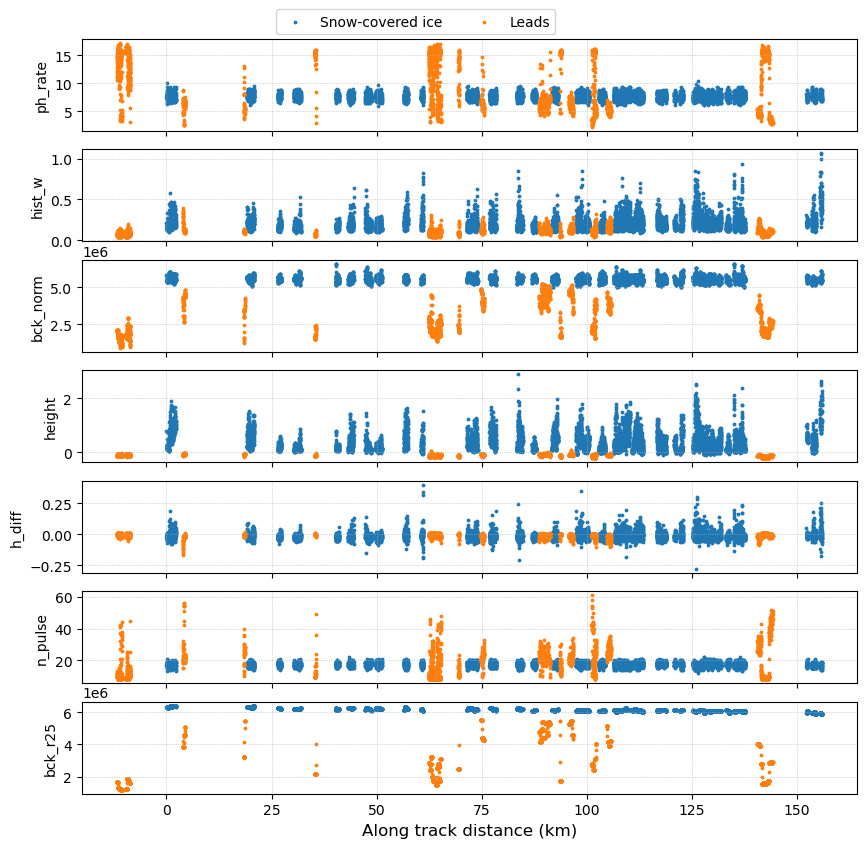

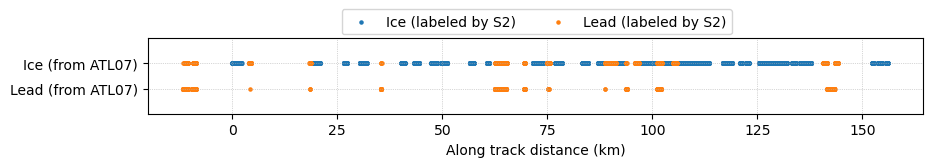

In [214]:
fields = ['ph_rate', 'hist_w', 'bck_norm', 'height', 'h_diff', 'n_pulse', 'bck_r25']

fig, ax = plt.subplots(len(fields), 1, figsize=(10, 10), dpi = 100, sharex=True)

idx_ice = (data.label == 1) # ice masking
idx_lead = (data.label== 0) # open water masking

for i in range(0, len(fields)):
    
    field = fields[i]   
    ax[i].scatter(data.x[idx_ice]/1000, data[field][idx_ice], s = 3, label = 'Snow-covered ice') # plot the elevation of ice points
    ax[i].scatter(data.x[idx_lead]/1000, data[field][idx_lead], s = 3, label = 'Leads') # plot the elevation of water points
    ax[i].grid(linestyle = ':', linewidth = 0.5)
    ax[i].set_ylabel(field)
    
ax[0].legend(ncol = 2, loc = (0.25,1.05))
plt.xlabel('Along track distance (km)',fontsize=12)

plt.savefig("F:\\ATL03\\ATL07_train\\plots\\{0}_{1}.png".format(filename, beam, field),
            bbox_inches = "tight")

plt.figure(figsize = (10, 1), dpi=100)
idx_ice = (data.label == 1) # ice masking
idx_lead = (data.label== 0) # open water masking
field = 'stype'

plt.scatter(data.x[idx_ice]/1000, data[field][idx_ice], s = 5, label = 'Ice (labeled by S2)') # plot the elevation of ice points
plt.scatter(data.x[idx_lead]/1000, data[field][idx_lead], s = 5, label = 'Lead (labeled by S2)') # plot the elevation of water points
# plt.scatter(data.x[water]/1000, data[field][water], s = 2, label = 'open water') # plot the elevation of water points
plt.grid(linestyle = ':', linewidth = 0.5)
plt.ylim(-1, 2)
plt.legend(ncol = 2, loc = (0.25,1.05))
plt.yticks([0,1], ["Lead (from ATL07)", "Ice (from ATL07)"])
plt.xlabel('Along track distance (km)')

plt.savefig("F:\\ATL03\\ATL07_train\\plots\\{0}_{1}_{2}.png".format(filename, beam, field),
            bbox_inches = "tight")

cm = confusion_matrix(data['label'], data['stype'])
# row: true labeling, col: predicted labeling
print(cm)

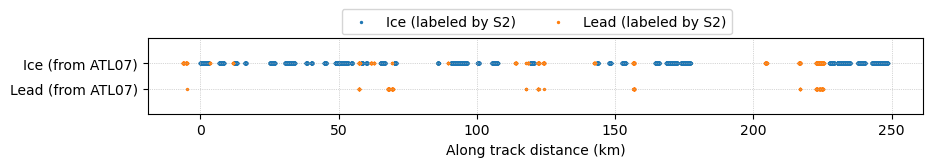

In [244]:
plt.figure(figsize = (10, 1), dpi=100)
idx_ice = (data.label == 1) # ice masking
idx_lead = (data.label== 0) # open water masking
field = 'stype'

plt.scatter(data.x[idx_ice]/1000, data[field][idx_ice], s = 2, label = 'Ice (labeled by S2)') # plot the elevation of ice points
plt.scatter(data.x[idx_lead]/1000, data[field][idx_lead], s = 2, label = 'Lead (labeled by S2)') # plot the elevation of water points
# plt.scatter(data.x[water]/1000, data[field][water], s = 2, label = 'open water') # plot the elevation of water points
plt.grid(linestyle = ':', linewidth = 0.5)
plt.ylim(-1, 2)
plt.legend(ncol = 2, loc = (0.25,1.05))
plt.yticks([0,1], ["Lead (from ATL07)", "Ice (from ATL07)"])
plt.xlabel('Along track distance (km)')

plt.savefig("F:\\ATL03\\ATL07_train\\plots\\{0}_{1}.png".format(filename, field),
            bbox_inches = "tight")

In [212]:
confusion_matrix(data['label'], data['stype'])
# row: true labeling, col: predicted labeling

array([[  220,   792],
       [    0, 10068]], dtype=int64)

### Train ANN model (by time/location)
Now you will train artificial neural network (ANN) model. ANN is the simplest form of neural network that has only one hidden layer.

In [166]:
data['name'].unique()

array(['ATL07-02_20190201190211_05400201',
       'ATL07-02-20191008192541_01820501',
       'ATL07-02_20191009190002_01970501',
       'ATL07-02_20191017184322_03190501',
       'ATL07-02_20191028184403_04870501',
       'ATL07-02_20191031190122_05330501',
       'ATL07-02_20191103174424_05780501',
       'ATL07-02_20191104185303_05940501',
       'ATL07-02_20191106180144_06240501',
       'ATL07-02_20191113181045_07310501',
       'ATL07-02_20191117180226_07920501',
       'ATL07-02_20210322170632_13551001'], dtype=object)

In [167]:
data.keys()

Index(['beam', 'lat', 'lon', 'x', 'deltatime', 'height', 'h_mean', 'h_median',
       'h_diff', 'width', 'rms', 'n_pulse', 'bck_cal', 'bck_r200', 'bck_r25',
       'bck_norm', 'hist_w', 'ph_rate', 'sic', 'stype', 'seg_len', 'year',
       'month', 'day', 'hour', 'minute', 'second', 'label', 'name'],
      dtype='object')

In [198]:
# Setting ANN input data ===================================================
import time

def make_input(data, fields, f_max, f_min, idx = [0], norm = False):
    # Make input of ANN
    # data: input dataframe (2-m sampled ATL03 data with elev, stdev, total_ratio, pulse_count)
    # field: data field (list) ['elev', 'stdev', 'total_rati', ... ]
    # nearby: how many nearby pixels are used for ANN input? one pixel = 2m
    # (e.g. 5 nearby => consider +- 5 pixels from the center pixel => input: 10)
    prop_col = ["beam", "name", "deltatime", "lat", "lon", "x", "height", "year", "month", "day", "label"]
    
    df_info = data[prop_col]
    df_input = data[fields]
    
    if norm == "norm":
        for name in data["name"].unique():
            for beam in data["beam"].unique():
                idx = (data["name"] == name) & (data["beam"] == beam)
                df0 = data[idx]
                for field in fields:
                    m = df0[field].mean()
                    sd = df0[field].std()
                    df_input[field][idx] = (df0[field] - m)/sd
                    
    elif norm == "minmax":
        for field in fields:
            value = np.array(df_input[field])
            value = (value-f_min[field])/(f_max[field]-f_min[field])
            value[value < 0] = 0
            value[value > 1] = 1
            df_input[field] = value
    
    test_files = data["name"].unique()[idx]
    test_idx = (data["name"] == 0)
    
    for test_name in test_files:
        test_idx = (test_idx | (data["name"] == test_name))
        
    test_input = df_input[test_idx].reset_index(drop=True)
    test_info = df_info[test_idx].reset_index(drop=True)
    model_input = df_input[test_idx == False].reset_index(drop=True)
    model_info = df_info[test_idx == False].reset_index(drop=True)
    
    return model_input, model_info, test_input, test_info

# Make dataset for ANN -------------------------------------
fields = ['height', 'hist_w', 'ph_rate', 'h_diff', 'n_pulse', 'bck_norm', 'bck_r25', 'bck_r200']
f_min = {}; f_max = {};
f_min['height'] = 0.0; f_max['height'] = 3.0;
f_min['hist_w'] = 0.0; f_max['hist_w'] = 1.0;
f_min['ph_rate'] = 0.0; f_max['ph_rate'] = 20.0;
f_min['h_diff'] = -0.5; f_max['h_diff'] = 0.5;
f_min['n_pulse'] = 0.0; f_max['n_pulse'] = 20.0;
f_min['bck_norm'] = 300000; f_max['bck_norm'] = 9000000;
f_min['bck_r25'] = 400000; f_max['bck_r25'] = 10000000;
f_min['bck_r200'] = 400000; f_max['bck_r200'] = 12000000;

model_input, model_info, test_input, test_info = make_input(data, fields, f_max, f_min, [2, 6], "minmax")
num_model = len(model_info)
num_test = len(test_info)
num_total = len(data)

print("# Number of model samples: {0} ({1:2.2f} %)".format(num_model, num_model/num_total*100))
print("# Number of test samples: {0} ({1:2.2f} %)".format(num_test, num_test/num_total*100))

# Number of model samples: 173198 (78.81 %)
# Number of test samples: 46556 (21.19 %)


In [184]:
model_info

beam                              name     deltatime        lat  \
0       gt3r  ATL07-02-20191008192541_01820501  5.580196e+07 -75.986909   
1       gt3r  ATL07-02-20191008192541_01820501  5.580196e+07 -75.986956   
2       gt3r  ATL07-02-20191008192541_01820501  5.580196e+07 -75.987004   
3       gt3r  ATL07-02-20191008192541_01820501  5.580196e+07 -75.987043   
4       gt3r  ATL07-02-20191008192541_01820501  5.580196e+07 -75.987089   
...      ...                               ...           ...        ...   
201687  gt1r  ATL07-02_20210322170632_13551001  1.016720e+08 -73.229903   
201688  gt1r  ATL07-02_20210322170632_13551001  1.016720e+08 -73.229994   
201689  gt1r  ATL07-02_20210322170632_13551001  1.016720e+08 -73.230070   
201690  gt1r  ATL07-02_20210322170632_13551001  1.016720e+08 -73.230159   
201691  gt1r  ATL07-02_20210322170632_13551001  1.016720e+08 -73.230238   

               lon             x    height  year  month  day  label  
0      -160.153282  2.855459e+07  0.509294  2019     10    8      1  
1      -160.153314  2.855459e+07  0.419902  2019     10    8      1  
2      -160.153345  2.855460e+07  0.409485  2019     10    8      1  
3      -160.153370  2.855460e+07  0.424755  2019     10    8      1  
4      -160.153401  2.855461e+07  0.499709  2019     10    8      1  
...            ...           ...       ...   ...    ...  ...    ...  
201687 -143.813451  2.824234e+07 -0.052989  2021      3   22      0  
201688 -143.813494  2.824235e+07 -0.041557  2021      3   22      0  
201689 -143.813530  2.824235e+07 -0.061233  2021      3   22      0  
201690 -143.813572  2.824236e+07 -0.038784  2021      3   22      0  
201691 -143.813610  2.824237e+07 -0.054750  2021      3   22      0  

[201692 rows x 11 columns]

In [186]:
test_info

beam                              name     deltatime        lat  \
0      gt1l  ATL07-02_20190201190211_05400201  3.428741e+07 -74.615372   
1      gt1l  ATL07-02_20190201190211_05400201  3.428741e+07 -74.615319   
2      gt1l  ATL07-02_20190201190211_05400201  3.428741e+07 -74.615265   
3      gt1l  ATL07-02_20190201190211_05400201  3.428741e+07 -74.615205   
4      gt1l  ATL07-02_20190201190211_05400201  3.428741e+07 -74.615158   
...     ...                               ...           ...        ...   
18057  gt1r  ATL07-02_20191028184403_04870501  5.752748e+07 -77.230174   
18058  gt1r  ATL07-02_20191028184403_04870501  5.752748e+07 -77.230232   
18059  gt1r  ATL07-02_20191028184403_04870501  5.752748e+07 -77.230289   
18060  gt1r  ATL07-02_20191028184403_04870501  5.752748e+07 -77.230326   
18061  gt1r  ATL07-02_20191028184403_04870501  5.752748e+07 -77.230371   

              lon             x    height  year  month  day  label  
0     -142.513957  3.181529e+07  0.338429  2019      2    1      1  
1     -142.513986  3.181530e+07  0.256181  2019      2    1      1  
2     -142.514016  3.181531e+07  0.445675  2019      2    1      1  
3     -142.514048  3.181531e+07  0.787178  2019      2    1      1  
4     -142.514074  3.181532e+07  0.789990  2019      2    1      1  
...           ...           ...       ...   ...    ...  ...    ...  
18057 -164.679834  2.869417e+07 -0.139500  2019     10   28      0  
18058 -164.679879  2.869418e+07 -0.114481  2019     10   28      0  
18059 -164.679923  2.869419e+07 -0.113505  2019     10   28      0  
18060 -164.679952  2.869419e+07 -0.126510  2019     10   28      0  
18061 -164.679987  2.869420e+07 -0.151467  2019     10   28      0  

[18062 rows x 11 columns]

In [138]:
fields = ['height', 'hist_w', 'ph_rate', 'bck_norm', 'bck_r25', 'bck_r200', 'n_pulse', 'h_diff']
for field in fields:
    print(field, model_input[field].min(), model_input[field].max())

height -0.522119164466858 3.996762752532959
hist_w 0.029750375077128 1.352355360984802
ph_rate 0.584210515022278 31.399999618530273
bck_norm 356703.0 8966342.0
bck_r25 430289.8125 8684249.0
bck_r200 424125.0 11015010.0
n_pulse 4 196
h_diff -0.516256928443909 0.668755054473877


Take a look at the "dataset" dataframe. How many columns it has, and what are the names of the columns?

Okay, now the input data is prepared. You will divdie the data into 3 sets: train (60 %), validation (20 %), and test (20 %).

In [201]:
# Setting ANN model & Distinguish Train / Test dataset ==============================================
train_input = model_input.sample(frac=0.75,random_state=100)
train_info = model_info.loc[train_input.index, :]
# train data: 60 % (75 % of the previous 80 % model data)
val_input = model_input.drop(train_input.index)
val_info = model_info.drop(train_input.index)
# validation data: 20 % (the rest 25 % of the 80 % model data)

train_labels = train_info.pop('label') # test labels
val_labels = val_info.pop('label') # validation labels
test_labels = test_info.pop('label') # test labels

print("Finish setting the ANN input data!")

Finish setting the ANN input data!


Okay, now let's train the ANN model!

Reference
- https://www.tensorflow.org/tutorials/images/cnn
- https://www.tensorflow.org/tutorials/keras/classification
- https://www.tensorflow.org/tutorials/images/classification

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 30)                270       
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 31        
Total params: 301
Trainable params: 301
Non-trainable params: 0
_________________________________________________________________


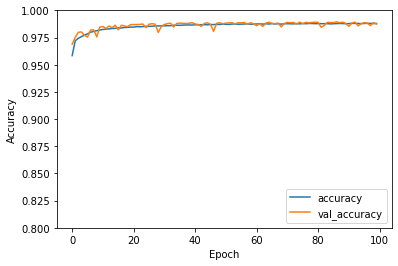

In [200]:
# ANN model =========================================================

def build_model(train_input):
    # Build ANN model
    # with single layer of 20 nodes, activation function = relu, output layer = 1
    # you can add more layers if you want
    model = keras.Sequential([
        layers.Dense(30, activation='relu', input_shape=[len(train_input.keys())]),
#         layers.Dense(20, activation='relu'),
#         layers.Dense(10, activation='relu'),
        layers.Dense(1)
    ])
    
    model.compile(loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
                  optimizer='adam',
                  metrics=['accuracy'])
    return model

model = build_model(train_input)
model.summary()

EPOCHS = 100
# How many epoches you will do?

# history = model.fit(
#   norm_test_input, test_labels,
#   epochs=EPOCHS, validation_data=(norm_val_input, val_labels), verbose=0)

history = model.fit(train_input, train_labels,
                    epochs=EPOCHS, validation_data=(val_input, val_labels), verbose=0)

# show the history of the model training
# the accuracy of the train and validation for each epoch
plt.plot(history.history['accuracy'], label='train accuracy')
plt.plot(history.history['val_accuracy'], label = 'validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.8, 1])
plt.legend(loc='lower right')
plt.show()


Let's check the accuracy of the test dataset! What's the test accuracy?

In [207]:
train_loss, train_acc = model.evaluate(train_input, train_labels, verbose=1)
val_loss, val_acc = model.evaluate(val_input, val_labels, verbose=1)
test_loss, test_acc = model.evaluate(test_input, test_labels, verbose=1)

1455/1455 [==============================] - 1s 487us/step - loss: 0.0288 - accuracy: 0.9891


In [205]:
test_loss, test_acc = model.evaluate(val_input, val_labels, verbose=1)

1354/1354 [==============================] - 1s 475us/step - loss: 0.0354 - accuracy: 0.9874


<BarContainer object of 3 artists>

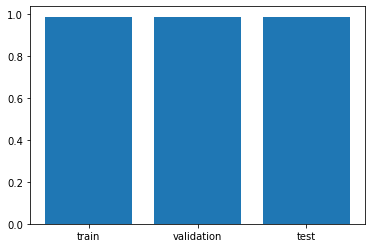

In [211]:
plt.bar(["train", "validation", "test"], [train_acc, val_acc, test_acc])

In [ ]:
plt.figure(figsize = (12,3), dpi=100)
alltrack['x_atc'] = alltrack.x - alltrack.x[0]
lead = track_info["ph_index"][predictions > 5]
field = 'elev'
plt.scatter(alltrack.lat, alltrack[field], label = "all", s = 2) # plot the elevation of ice points
plt.scatter(alltrack.lat[lead], alltrack[field][lead], label = "lead", s = 5) # plot the elevation of water points
plt.grid(linestyle = ':', linewidth = 0.5)
plt.xlabel('along track distance (m)')
plt.ylabel('elevation (m)')
plt.title('Surface elevation {0}'.format(ATL03name))
plt.legend()
# plt.xlim([-76.4, -73.8])
# plt.xlim([260000, 280000])
# plt.ylim([-2, 2])
plt.show()

### Do it yourself!

1) Change the ratio of the test/validation/test dataset, (e.g. 70/15/15, 50/25/25) and check how the accuracy changes.

2) Make your own ANN model. You can add more layers to the "build_model()" function. Can you improve the test accuracy of the ANN model?

### (3) Test ANN model for all ATL03 data points

In [771]:
def make_test_input(data, fields, nearby):
    # Make input of ANN
    # data: input dataframe (2-m sampled ATL03 data with elev, stdev, total_ratio, pulse_count)
    # field: data field (list) ['elev', 'stdev', 'total_rati', ... ]
    # nearby: how many nearby pixels are used for ANN input? one pixel = 2m
    # (e.g. 5 nearby => consider +- 5 pixels from the center pixel => input: 10)
    prop_col = ["elev", "lat", "lon", "x", "y", "year", "month", "day"]
    start = time.time()
    first = True
    for i in range(nearby, len(data)-nearby-1):
        possible_point = True
        D = pd.DataFrame({})
        for j in range(i-nearby, i+nearby+1):
            if data.x[j] - data.x[i] != (j-i)*2:
                # input data should be in 2 meter interval
                possible_point = False
            for field in fields:                
                fieldname = field + str(j-i)
                D[fieldname] = [data[field][j]]
        if possible_point:
            D2 = data[prop_col].loc[[i], :]
            D2['ph_index'] = i
            if first:
                dF = D
                dF2 = D2
                first = False
            else:
                dF = dF.append(D)
                dF2 = dF2.append(D2)
        if i % 5000 == 0:
            end = time.time()
            print("now working on ... {0} / {1} ({2} %, {3} sec)"
                  .format(i, len(data), round(i/len(data)*100, 2), int(end-start)))
    dF = dF.reset_index(drop=True)
    dF2 = dF2.reset_index(drop=True)
    print("FINISH reading ... {0} / {1} ({2} %, {3} sec)"
          .format(i, len(data), round(i/len(data)*100, 2), int(end-start)))
    return dF, dF2

input_field = ['elev_mss', 'stdev', 'count_high']
track_input, track_info = make_test_input(alltrack, input_field, 2)

track_input.to_csv('F:/ATL03/ANN_train/track_input_' + ATL03name, index = False)
track_info.to_csv('F:/ATL03/ANN_train/track_info_' + ATL03name, index = False)


now working on ... 5000 / 84685 (5.9 %, 29 sec)
now working on ... 10000 / 84685 (11.81 %, 59 sec)
now working on ... 15000 / 84685 (17.71 %, 88 sec)
now working on ... 20000 / 84685 (23.62 %, 118 sec)
now working on ... 25000 / 84685 (29.52 %, 147 sec)
now working on ... 30000 / 84685 (35.43 %, 177 sec)
now working on ... 35000 / 84685 (41.33 %, 206 sec)
now working on ... 40000 / 84685 (47.23 %, 236 sec)
now working on ... 45000 / 84685 (53.14 %, 266 sec)
now working on ... 50000 / 84685 (59.04 %, 296 sec)
now working on ... 55000 / 84685 (64.95 %, 325 sec)
now working on ... 60000 / 84685 (70.85 %, 355 sec)
now working on ... 65000 / 84685 (76.76 %, 386 sec)
now working on ... 70000 / 84685 (82.66 %, 419 sec)
now working on ... 75000 / 84685 (88.56 %, 450 sec)
now working on ... 80000 / 84685 (94.47 %, 480 sec)
FINISH reading ... 84681 / 84685 (100.0 %, 480 sec)


In [778]:
## Load saved ATL03 & ATL10 files ==============================================

ATL03name = "ATL03_20191109205329_gt1r.csv" # 11.09
# ATL03name = 'ATL03_20191113191053_gt2r.csv' # 11.13
# ATL03name = 'ATL03_20191123180255_gt2r.csv' # 11.23

track_input = pd.read_csv('F:/ATL03/ANN_train/track_input_' + ATL03name)
track_info = pd.read_csv('F:/ATL03/ANN_train/track_info_' + ATL03name)
alltrack = pd.read_csv(path + ATL03name)

ATL10name = 'ATL10-02_20191109195321_06710501_003_03.h5'; bbox = [160, -76.5, 180, -75] # 2019.11.09
# ATL10name = 'ATL10-02_20191113181045_07310501_003_03.h5'; bbox = [-172, -78, -146, -76.3] # 2019.11.13
# ATL10name = 'ATL10-02_20191123170246_08830501_003_03.h5'; bbox = [-170, -76.4, -148, -73.8] # 2019.11.23

test_ATL10 = get_ATL10data("F:/ATL03/ATL10/" + ATL10name, 1000, bbox, [0])[0]
lead_ATL10 = get_ATL10lead("F:/ATL03/ATL10/" + ATL10name, 1000, bbox, [0])[0]


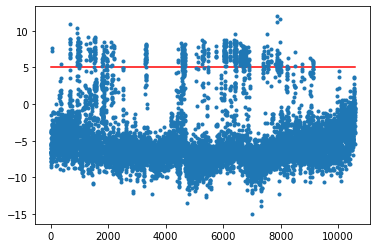

In [791]:
modelname = 'gt1r'
threshold = 5
model = ANN_model[modelname]
norm_input = norm(track_input)
predictions = model.predict(norm_input).flatten()
plt.plot([0, len(predictions)], [threshold, threshold], color = 'r')
plt.plot(predictions, '.')

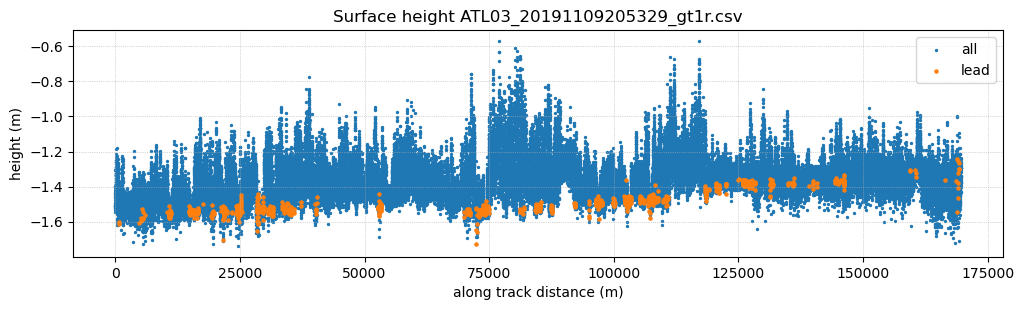

In [801]:
plt.figure(figsize = (12,3), dpi=100)
alltrack['x_atc'] = alltrack.x - alltrack.x[0]
lead = track_info["ph_index"][predictions > threshold]
xfield = 'x_atc'
field = 'elev'
plt.scatter(alltrack[xfield], alltrack[field], label = "all", s = 2) # plot the elevation of ice points
plt.scatter(alltrack[xfield][lead], alltrack[field][lead], label = "lead", s = 5) # plot the elevation of water points
plt.grid(linestyle = ':', linewidth = 0.5)
plt.xlabel('along track distance (m)')
plt.ylabel('height (m)')
plt.title('Surface height {0}'.format(ATL03name))
plt.legend()
# plt.xlim([-76.4, -73.8])
# plt.xlim([260000, 280000])
# plt.ylim([-2, 2])
plt.savefig("F:/ATL03/figures/height_{0}_{1}_{2}".format(modelname, field, ATL03name.replace(".csv", ".png")),
            bbox_inches = "tight")

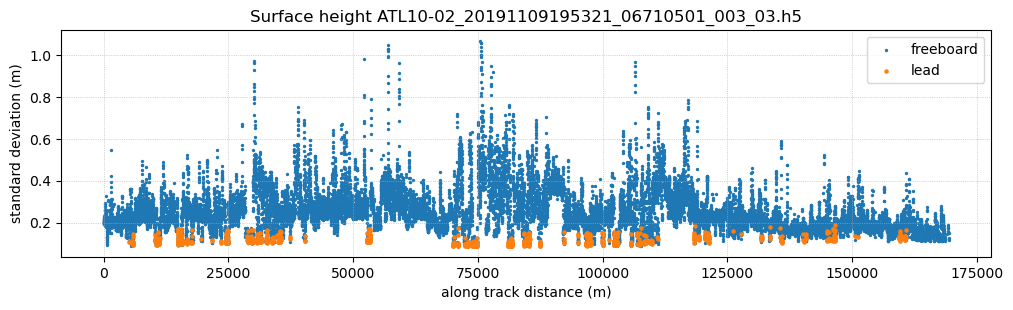

In [793]:
plt.figure(figsize = (12,3), dpi=100)
test_ATL10['x_atc'] = test_ATL10.x - test_ATL10.x[0]
lead_ndx = (test_ATL10.lead == 1)
plt.scatter(test_ATL10.x_atc, test_ATL10.height, s = 2, label = "freeboard")
plt.scatter(test_ATL10.x_atc[lead_ndx], test_ATL10.height[lead_ndx], s = 5, label = "lead")
# plt.scatter(test_ATL10.lat, test_ATL10.ref_height, s = 5, label = "lead")
plt.xlabel('along track distance (m)')
plt.ylabel('standard deviation (m)')
plt.grid(linestyle = ':', linewidth = 0.5)
plt.legend()
plt.title('Surface height {0}'.format(ATL10name))
# plt.xlim([-76.4, -73.8])
# plt.xlim([260000, 280000])
# plt.ylim([-2, 2])
plt.savefig("F:/ATL03/figures/height_{0}_{1}".format(modelname, ATL10name.replace(".h5", ".png")),
            bbox_inches = "tight")

Finish calculating reference surfaces
>>> Sampling reference surface and calculate freeboard
0 / 84685 (0.0 %, 0 sec)
10000 / 84685 (11.81 %, 7 sec)
20000 / 84685 (23.62 %, 15 sec)
30000 / 84685 (35.43 %, 23 sec)
40000 / 84685 (47.23 %, 31 sec)
50000 / 84685 (59.04 %, 38 sec)
60000 / 84685 (70.85 %, 46 sec)
70000 / 84685 (82.66 %, 54 sec)
80000 / 84685 (94.47 %, 62 sec)


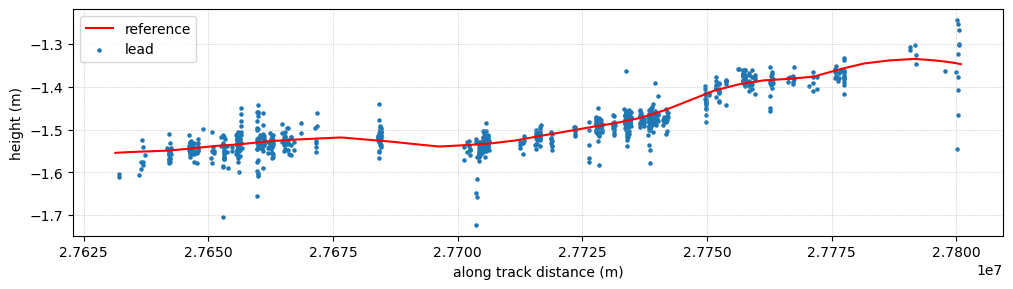

In [794]:
# Calculate the sea referecne heights ===================================
from scipy import stats
from scipy.interpolate import UnivariateSpline
import time

def calculate_freeboard(alltrack, distance, ref_field = "ref_height"):
    print(">>> Sampling reference surface and calculate freeboard")
    new_ref = np.zeros(len(alltrack))
    freeboard = np.zeros(len(alltrack))
    start = time.time()
    for i in range(len(alltrack)):
        new_ref[i] = np.mean(alltrack[ref_field][abs(alltrack.x - alltrack.x[i]) < distance])
        freeboard[i] = alltrack['elev'][i] - new_ref[i]
        if freeboard[i] < 0:
            freeboard[i] = 0
        if i % 10000 == 0:
            end = time.time()
            print("{0} / {1} ({2} %, {3} sec)".format(i, len(alltrack), round(i/len(alltrack)*100, 2), int(end-start)))
    alltrack["ref_height2"] = new_ref
    alltrack["freeboard"] = freeboard
    
    return alltrack

seg_len = 10000 # segment length = 10000 m = 10 km
threshold = 1
lead = track_info[predictions > threshold]

alltrack['ref_fit'] = 0
alltrack['ref_count'] = 0
alltrack['ref_mean'] = 0
alltrack['ref_height'] = 0

for L in range(int(min(alltrack.x)), int(max(alltrack.x)), int(seg_len/2)):
    L1 = L + 0
    L2 = L + seg_len    
    lead_seg = lead[(lead.x >= L1) & (lead.x < L2)]
    meanlead = np.mean(lead_seg.elev)
    stdlead = np.std(lead_seg.elev)
    lead_seg = lead_seg[abs(lead_seg.elev - meanlead) < stdlead*2]
    
    while len(lead_seg) <= 10:
        L1 = L1 - int(seg_len/2)
        L2 = L2 + int(seg_len/2)
        lead_seg = lead[(lead.x >= L1) & (lead.x < L2)]
        meanlead = np.median(lead_seg.elev)
        stdlead = np.std(lead_seg.elev)
        lead_seg = lead_seg[abs(lead_seg.elev - meanlead) < stdlead*2]
    
    a, b, r_value, pvalue, stderr = stats.linregress(lead_seg.x, lead_seg.elev)
    track_seg = alltrack[(alltrack.x >= L1) & (alltrack.x < L2)]
    track_seg['ref_fit'] = a*track_seg.x + b # linear fitting
    # spl = UnivariateSpline(lead_seg.x, lead_seg.elev)
    # track_seg['ref_fit'] = spl(track_seg.x) # spline fitting
    maxfit = max(track_seg['ref_fit'])
    minfit = min(track_seg['ref_fit'])
    meanfit = np.mean(track_seg['ref_fit'])
    stdfit = np.std(track_seg['ref_fit'])   
    
#     while abs(a) > 0.2/10000:
#         L1 = L1 - int(seg_len/2)
#         L2 = L2 + int(seg_len/2)
#         lead_seg = lead[(lead.x >= L1) & (lead.x < L2)]   
#         meanlead = np.mean(lead_seg.elev)
#         stdlead = np.std(lead_seg.elev)
#         lead_seg = lead_seg[abs(lead_seg.elev - meanlead) < stdlead]
#         a, b, r_value, pvalue, stderr = stats.linregress(lead_seg.x, lead_seg.elev)
#         track_seg = alltrack[(alltrack.x >= L1) & (alltrack.x < L2)]
#         track_seg['ref_fit'] = a*track_seg.x + b
#         # spl = UnivariateSpline(lead_seg.x, lead_seg.elev)
#         # track_seg['ref_fit'] = spl(track_seg.x) # spline fitting
#         maxfit = max(track_seg['ref_fit'])
#         minfit = min(track_seg['ref_fit'])
#         meanfit = np.mean(track_seg['ref_fit'])
#         stdfit = np.std(track_seg['ref_fit'])
#         maxlead = max(lead_seg.elev)
#         meanlead = np.mean(lead_seg.elev)
#         minlead = min(lead_seg.elev)
#         if L2 - L1 > (max(alltrack.x) - min(alltrack.x)):
#             break

    alltrack['ref_fit'][track_seg.index] = alltrack['ref_fit'][track_seg.index] + track_seg['ref_fit']
    alltrack['ref_count'][track_seg.index] = alltrack['ref_count'][track_seg.index] + 1
    alltrack['ref_mean'][track_seg.index] = meanlead
    
# alltrack['ref_height'] = alltrack['ref_fit'] / alltrack['ref_count']
alltrack['ref_height'] = alltrack['ref_mean']
alltrack['x_atc'] = alltrack['x'] - alltrack['x'][0]
print("Finish calculating reference surfaces")

alltrack = calculate_freeboard(alltrack, seg_len)

plt.figure(figsize = (12,3), dpi=100)
lead = track_info["ph_index"][predictions > threshold]
field = 'elev'
# plt.scatter(alltrack.x, alltrack[field], label = "all", s = 2) # plot the elevation of ice points
plt.scatter(alltrack.x[lead], alltrack[field][lead], label = "lead", s = 5) # plot the elevation of water points
plt.plot(alltrack.x, alltrack.ref_height2, color = 'red', label = "reference")
plt.grid(linestyle = ':', linewidth = 0.5)
plt.xlabel('along track distance (m)')
plt.ylabel('height (m)')
plt.legend()
# plt.xlim([-76.4, -73.8])
# plt.xlim([260000, 280000])
# plt.ylim([-1.5, 0.5])
plt.savefig("F:/ATL03/figures/reference_{0}_{1}".format(modelname, ATL03name.replace(".csv", ".png")),
            bbox_inches = "tight")

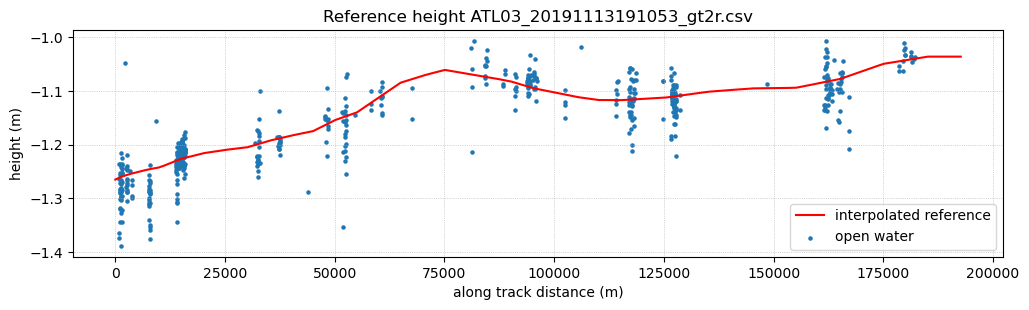

In [383]:
plt.figure(figsize = (12,3), dpi=100)
alltrack['x_atc'] = alltrack['x'] - alltrack['x'][0]
lead = track_info["ph_index"][predictions > threshold]
field = 'elev'
# plt.scatter(alltrack.x, alltrack[field], label = "all", s = 2) # plot the elevation of ice points
plt.scatter(alltrack.x_atc[lead], alltrack[field][lead], label = "open water", s = 5) # plot the elevation of water points
plt.plot(alltrack.x_atc, alltrack.ref_height2, color = 'red', label = "interpolated reference")
plt.grid(linestyle = ':', linewidth = 0.5)
plt.xlabel('along track distance (m)')
plt.ylabel('height (m)')
plt.legend()
plt.title('Reference height ({0})'.format(ATL03name))
# plt.xlim([-76.4, -73.8 ])
# plt.xlim([260000, 280000])
# plt.ylim([-1.5, 0.5])
plt.savefig("F:/ATL03/figures/reference_{0}_{1}".format(modelname, ATL03name.replace(".csv", ".png")),
            bbox_inches = "tight")

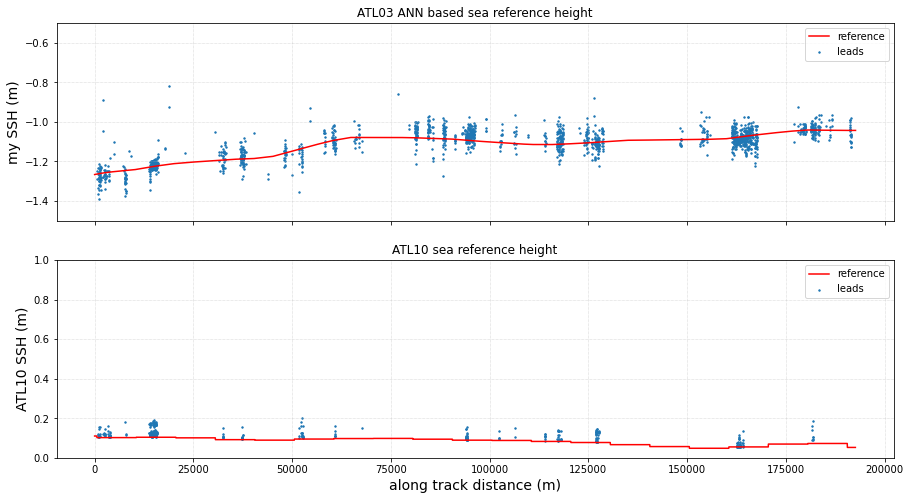

In [591]:
## Surface heights comparison ===================================================

alltrack['x_atc'] = alltrack.x - alltrack.x[0]
test_ATL10['x_atc'] = test_ATL10.x - test_ATL10.x[0]

fig,ax=plt.subplots(2,1,figsize=(15,8), sharex=True)

# ATL03 ----------------------------------------
lead = track_info["ph_index"][predictions > threshold]
field = 'elev'
ax[0].scatter(alltrack.x_atc[lead], alltrack[field][lead], label = "leads", s = 2) # plot the elevation of ice points
ax[0].plot(alltrack.x_atc, alltrack.ref_height2, color = 'red', label = "reference")
ax[0].set_ylabel('my SSH (m)',fontsize=14)
ax[0].grid(linestyle = ':', linewidth = 0.5)
ax[0].legend()
ax[0].set_title('ATL03 ANN based sea reference height')
ax[0].set_ylim(-1.5, -0.5)

# ATL10 ----------------------------------------
lead_ndx = (test_ATL10.lead == 1)
field = 'height'

ax[1].scatter(test_ATL10.x_atc[lead_ndx], test_ATL10[field][lead_ndx], s = 2, label = "leads")
ax[1].plot(test_ATL10.x_atc, test_ATL10.ref_height, color = 'red', label = "reference")
ax[1].set_ylabel('ATL10 SSH (m)',fontsize=14)
ax[1].grid(linestyle = ':', linewidth = 0.5)
ax[1].legend()
ax[1].set_title('ATL10 sea reference height')
ax[1].set_ylim(0,1)

plt.xlabel('along track distance (m)',fontsize=14)
# plt.xlim(-74.5, -74.3)
plt.show()

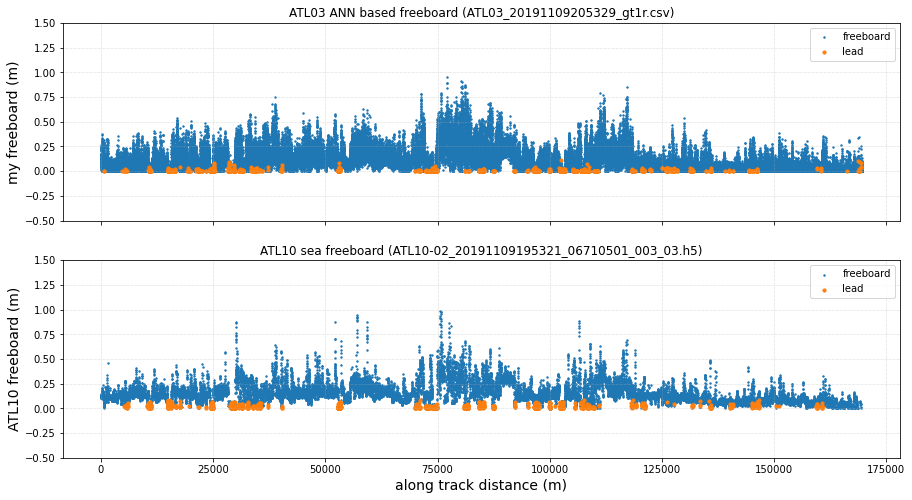

In [795]:
## Freeboard comparison ===================================================

alltrack['x_atc'] = alltrack.x - alltrack.x[0]
test_ATL10['x_atc'] = test_ATL10.x - test_ATL10.x[0]

fig,ax=plt.subplots(2,1,figsize=(15,8), sharex=True)

xfield = 'x_atc'
field = 'freeboard'

# ATL03 ----------------------------------------
lead = track_info["ph_index"][predictions > threshold]
ax[0].scatter(alltrack[xfield], alltrack[field], label = "freeboard", s = 2) # plot the elevation of ice points
ax[0].scatter(alltrack[xfield][lead], alltrack[field][lead], label = "lead", s = 10) # plot the elevation of water points
ax[0].set_ylabel('my freeboard (m)',fontsize=14)
ax[0].grid(linestyle = ':', linewidth = 0.5)
ax[0].legend()
ax[0].set_title('ATL03 ANN based freeboard ({0})'.format(ATL03name))
ax[0].set_ylim(-0.5, 1.5)

# ATL10 ----------------------------------------
lead_ndx = (test_ATL10.lead == 1)
ax[1].scatter(test_ATL10[xfield], test_ATL10[field], s = 2, label = "freeboard")
ax[1].scatter(test_ATL10[xfield][lead_ndx], test_ATL10[field][lead_ndx], s = 10, label = "lead")
ax[1].set_ylabel('ATL10 freeboard (m)',fontsize=14)
ax[1].grid(linestyle = ':', linewidth = 0.5)
ax[1].legend()
ax[1].set_title('ATL10 sea freeboard ({0})'.format(ATL10name))
ax[1].set_ylim(-0.5, 1.5)

plt.xlabel('along track distance (m)',fontsize=14)
# plt.xlim(-74.75, -74.74)
# plt.xlim([0, 290000]) # lead area
# plt.xlim([241000, 242000]) # sea ice area

plt.show()

fig.savefig("F:/ATL03/figures/Freeboard_{0}_{1}".format(modelname, ATL03name.replace(".csv", ".png")),
            bbox_inches = "tight")


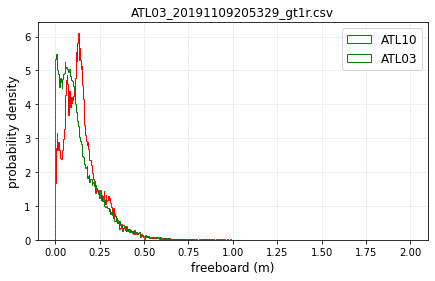

In [799]:
plt.figure(figsize = (7,4))
plt.hist(test_ATL10[field][test_ATL10[field]>0], bins = 500, range = (0, 2),
         density = True, histtype = 'step', color = 'r', label = 'ATL10')
plt.hist(alltrack[field][alltrack[field]>0], bins = 500, range = (0, 2),
         density = True, histtype = 'step', color = 'g', label = 'ATL03')
plt.grid(linewidth = 0.5, linestyle = ":")
plt.xlabel("freeboard (m)", fontsize = 12)
plt.ylabel("probability density", fontsize = 12)
plt.legend(fontsize = 12)
plt.title(ATL03name, fontsize = 12)
plt.savefig("F:/ATL03/figures/Hist_fb_{0}_{1}.png".format(modelname, ATL03name.replace(".csv", "")), 
            bbox_inches = "tight")
plt.show()

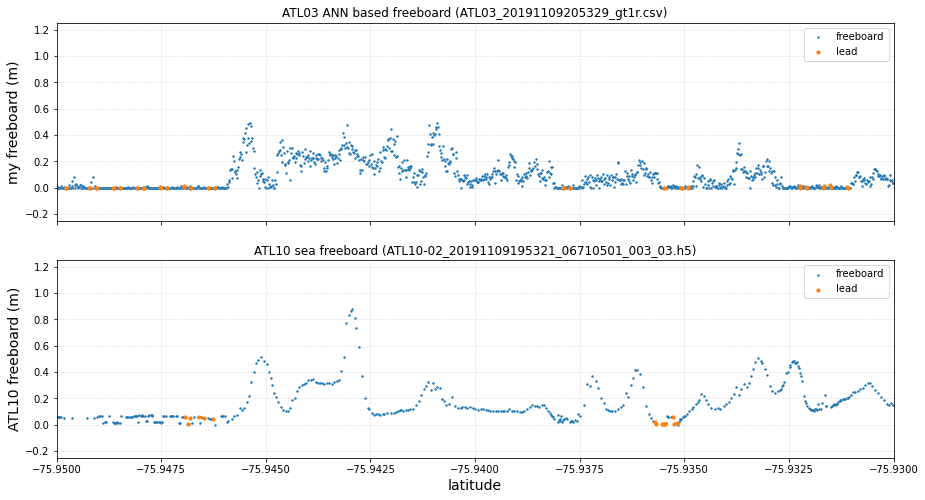

In [809]:
## Freeboard comparison ===================================================

alltrack['x_atc'] = alltrack.x - alltrack.x[0]
test_ATL10['x_atc'] = test_ATL10.x - test_ATL10.x[0]

fig,ax=plt.subplots(2,1,figsize=(15,8), sharex=True)

xfield = 'lat'
field = 'freeboard'

# ATL03 ----------------------------------------
lead = track_info["ph_index"][predictions > threshold]
ax[0].scatter(alltrack[xfield], alltrack[field], label = "freeboard", s = 2) # plot the elevation of ice points
ax[0].scatter(alltrack[xfield][lead], alltrack[field][lead], label = "lead", s = 10) # plot the elevation of water points
ax[0].set_ylabel('my freeboard (m)',fontsize=14)
ax[0].grid(linestyle = ':', linewidth = 0.5)
ax[0].legend()
ax[0].set_title('ATL03 ANN based freeboard ({0})'.format(ATL03name))
ax[0].set_ylim(-0.25, 1.25)

# ATL10 ----------------------------------------
lead_ndx = (test_ATL10.lead == 1)
ax[1].scatter(test_ATL10[xfield], test_ATL10[field], s = 2, label = "freeboard")
ax[1].scatter(test_ATL10[xfield][lead_ndx], test_ATL10[field][lead_ndx], s = 10, label = "lead")
ax[1].set_ylabel('ATL10 freeboard (m)',fontsize=14)
ax[1].grid(linestyle = ':', linewidth = 0.5)
ax[1].legend()
ax[1].set_title('ATL10 sea freeboard ({0})'.format(ATL10name))
ax[1].set_ylim(-0.25, 1.25)

plt.xlabel('latitude',fontsize=14)
x1, x2 = plt.xlim([-75.95, -75.93])
# x1, x2 = plt.xlim([-74.4, -74.37])
# plt.xlim([248000, 252000]) # lead area
# plt.xlim([241000, 242000]) # sea ice area

plt.show()

fig.savefig("F:/ATL03/figures/Freeboard_{0}_{1}_zoom{2}_{3}.png".format(modelname, ATL03name.replace(".csv", ""), x1, x2),
            bbox_inches = "tight")


In [295]:
b

-76.14

In [21]:
test_ATL10.x[1] - test_ATL10.x[0]

7.804403107613325

In [489]:
plt.figure(figsize = (12,3), dpi=100)
lead = track_info["ph_index"][predictions > 10]
field = 'elev'
alltrack['freeboard'] = alltrack['elev'] - alltrack('ref_height')

plt.scatter(alltrack.x[lead], alltrack[field][lead], label = "lead", s = 5) # plot the elevation of water points
plt.grid(linestyle = ':', linewidth = 0.5)
plt.xlabel('along track distance (m)')
plt.ylabel('elevation (m)')
plt.legend()
# plt.xlim([-76.4, -73.8])
# plt.xlim([260000, 280000])
# plt.ylim([-1.5, 0.5])
plt.show()

FID        lat         lon           x          y    heights  \
0            0 -73.800005 -155.889504  27258064.0 -49.112484 -64.004036   
1            1 -73.800019 -155.889511  27258066.0 -49.106369 -63.963345   
2            2 -73.800037 -155.889520  27258068.0 -49.098194 -63.993477   
3            3 -73.800055 -155.889529  27258070.0 -49.090317 -63.925121   
4            4 -73.800075 -155.889539  27258072.0 -49.081886 -63.708160   
...        ...        ...         ...         ...        ...        ...   
146402  146402 -76.399908 -157.453139  27551884.0 -40.575756 -60.628139   
146403  146403 -76.399922 -157.453149  27551886.0 -40.574123 -60.504086   
146404  146404 -76.399943 -157.453164  27551888.0 -40.571938 -60.431412   
146405  146405 -76.399955 -157.453173  27551890.0 -40.570831 -60.504837   
146406  146406 -76.399978 -157.453189  27551892.0 -40.568913 -60.501953   

          geocorr      elev     deltatime      conf  ...  minute  second  \
0      -63.062698 -0.941335  5.976775e+07  4.000000  ...     9.0    30.0   
1      -63.062698 -0.900645  5.976775e+07  3.958333  ...     9.0    30.0   
2      -63.062698 -0.930783  5.976775e+07  4.000000  ...     9.0    30.0   
3      -63.062626 -0.862489  5.976775e+07  3.842105  ...     9.0    30.0   
4      -63.062561 -0.645597  5.976775e+07  3.350000  ...     9.0    30.0   
...           ...       ...           ...       ...  ...     ...     ...   
146402 -59.597260 -1.030880  5.976779e+07  4.000000  ...    10.0    11.0   
146403 -59.597260 -0.906823  5.976779e+07  4.000000  ...    10.0    11.0   
146404 -59.597260 -0.834148  5.976779e+07  3.250000  ...    10.0    11.0   
146405 -59.597260 -0.907579  5.976779e+07  4.000000  ...    10.0    11.0   
146406 -59.597260 -0.904692  5.976779e+07  4.000000  ...    10.0    11.0   

           stdev  count_high  count_nois  count_tota  noise_rati  total_rati  \
0       0.109100        12.0         6.0        22.0    0.500000    0.545455   
1       0.142679        24.0         5.0        33.0    0.208333    0.727273   
2       0.181641        20.0         3.0        26.0    0.150000    0.769231   
3       0.220407        19.0         3.0        25.0    0.157895    0.760000   
4       0.281510        20.0         6.0        27.0    0.300000    0.740741   
...          ...         ...         ...         ...         ...         ...   
146402  0.000000         1.0         6.0         7.0    6.000000    0.142857   
146403  0.029374         3.0        12.0        15.0    4.000000    0.200000   
146404  0.071699         4.0         8.0        13.0    2.000000    0.307692   
146405  0.082820         3.0        12.0        15.0    4.000000    0.200000   
146406  0.020525         3.0         7.0        10.0    2.333333    0.300000   

           x_abs  test  
0            0.0     2  
1            2.0     0  
2            4.0     3  
3            6.0     4  
4            8.0     0  
...          ...   ...  
146402  293820.0     0  
146403  293822.0     0  
146404  293824.0     0  
146405  293826.0     0  
146406  293828.0     0  

[146407 rows x 26 columns]

### (4) Train model from multiple data

In [43]:
## Read data and make test input dataset ======================================
import time

def make_input(data, fields, nearby):
    # Make input of ANN
    # data: input dataframe (2-m sampled ATL03 data with elev, stdev, total_ratio, pulse_count)
    # field: data field (list) ['elev', 'stdev', 'total_rati', ... ]
    # nearby: how many nearby pixels are used for ANN input? one pixel = 2m
    # (e.g. 5 nearby => consider +- 5 pixels from the center pixel => input: 10)
    prop_col = ["beam", "lat", "lon", "x", "y", "year", "month", "day",
                "elev", "elev_mss", "mss", "conf", "ph_id_coun", "pulse_coun",
                "stdev", "count_high", "count_nois", "count_tota", "fpb_corr"
               ]
    start = time.time()
    first = True
    for i in range(nearby, len(data)-nearby-1):
        possible_point = True
        if 'label' in data.keys():
            D = pd.DataFrame({'label': [data.label[i]]})
        else:
            D = pd.DataFrame({})
        for j in range(i-nearby, i+nearby+1):
            if abs(data.x[j] - data.x[i]) >= 10: # input data should be within 10 meter interval
#             if data.x[j] - data.x[i] != (j-i)*2: # input data should be in 2 meter interval
                possible_point = False
            for field in fields:                
                fieldname = field + str(j-i)
                D[fieldname] = [data[field][j]]
        if possible_point:
            D2 = data[prop_col].loc[[i], :]
            D2['ph_index'] = i
            if first:
                dF = D
                dF2 = D2
                first = False
            else:
                dF = dF.append(D)
                dF2 = dF2.append(D2)
        if i % 2000 == 0:
            end = time.time()
            print("now working on ... {0} / {1} ({2} %, {3} sec)"
                  .format(i, len(data), round(i/len(data)*100, 2), int(end-start)))
    dF = dF.reset_index(drop=True)
    dF2 = dF2.reset_index(drop=True)
    end = time.time()
    print("FINISH reading ... {0} / {1} ({2} %, {3} sec)"
          .format(i, len(data), round(i/len(data)*100, 2), int(end-start)))
    return dF, dF2

import glob
path = "F:/ATL03/ANN_train/RossSea/csv" # local directory (after download the csv file from Google Drive)
files_ice = sorted(glob.glob(path + "/*ice.csv"))
# files_water = sorted(glob.glob(path + "/*water.csv"))
# files_thin = sorted(glob.glob(path + "/*thin.csv"))

label = [0, 1, 2]
surface = ['ice', 'thin', 'water']
input_field = ['elev_mss', 'stdev', 'ph_id_coun', 'pulse_coun', 'conf',
               'count_high', 'count_nois', 'count_tota', 'fpb_corr']

num_var = len(input_field)
num_track = len(files_ice)

for s in range(0, len(surface)):
    first = True
    files = sorted(glob.glob(path + "/*{0}.csv".format(surface[s])))
    for i in range(0, len(files)):
        tempdata = pd.read_csv(files[i])
        tempdata['label'] = label[s]
        tempdata['beam'] = files[i].split(surface[s])[0][-5:-1]
        temp_input, temp_info = make_input(tempdata, input_field, 2)
        temp_labels = temp_input.pop('label')
        
        if first:
            model_input = temp_input
            model_info = temp_info
            model_labels = temp_labels        
            first = False
        else:
            model_input = model_input.append(temp_input).reset_index(drop=True)
            model_labels = model_labels.append(temp_labels).reset_index(drop=True)
            model_info = model_info.append(temp_info).reset_index(drop=True)
            
        print(">>> Finish making input from {0}".format(files[i]))
        del tempdata, temp_input, temp_info
    outpath = "F:/ATL03/ANN_train/RossSea/"
    model_input.to_csv(outpath + "model_input_{0}var_{1}tracks_{2}.csv".format(num_var, num_track, surface[s]),
                       index=False)
    model_info.to_csv(outpath + "model_info_{0}var_{1}tracks_{2}.csv".format(num_var, num_track, surface[s]),
                      index=False)
    model_labels.to_csv(outpath + "model_labels_{0}var_{1}tracks_{2}.csv".format(num_var, num_track, surface[s]),
                        index=False)
    # model_norm_input.to_csv("F:/ATL03/ANN_train/model_norm_input_3var_9tracks.csv", index=False)

now working on ... 2000 / 20267 (9.87 %, 37 sec)
now working on ... 4000 / 20267 (19.74 %, 76 sec)
now working on ... 6000 / 20267 (29.6 %, 115 sec)
now working on ... 8000 / 20267 (39.47 %, 156 sec)
now working on ... 10000 / 20267 (49.34 %, 197 sec)
now working on ... 12000 / 20267 (59.21 %, 240 sec)
now working on ... 14000 / 20267 (69.08 %, 284 sec)
now working on ... 16000 / 20267 (78.95 %, 329 sec)
now working on ... 18000 / 20267 (88.81 %, 374 sec)
now working on ... 20000 / 20267 (98.68 %, 421 sec)
FINISH reading ... 20263 / 20267 (99.98 %, 427 sec)
>>> Finish making input from F:/ATL03/ANN_train/RossSea/csv\ATL03_20191113191053_07310510_gt1r_ice.csv
now working on ... 2000 / 28232 (7.08 %, 39 sec)
now working on ... 4000 / 28232 (14.17 %, 78 sec)
now working on ... 6000 / 28232 (21.25 %, 119 sec)
now working on ... 8000 / 28232 (28.34 %, 161 sec)
now working on ... 10000 / 28232 (35.42 %, 205 sec)
now working on ... 12000 / 28232 (42.5 %, 250 sec)
now working on ... 14000 / 28

now working on ... 34000 / 39270 (86.58 %, 829 sec)
now working on ... 36000 / 39270 (91.67 %, 886 sec)
now working on ... 38000 / 39270 (96.77 %, 945 sec)
FINISH reading ... 39266 / 39270 (99.99 %, 982 sec)
>>> Finish making input from F:/ATL03/ANN_train/RossSea/csv\ATL03_20191123180255_08830510_gt3r_ice.csv
now working on ... 2000 / 11429 (17.5 %, 36 sec)
now working on ... 4000 / 11429 (35.0 %, 74 sec)
now working on ... 6000 / 11429 (52.5 %, 112 sec)
now working on ... 8000 / 11429 (70.0 %, 151 sec)
now working on ... 10000 / 11429 (87.5 %, 191 sec)
FINISH reading ... 11425 / 11429 (99.97 %, 220 sec)
>>> Finish making input from F:/ATL03/ANN_train/RossSea/csv\ATL03_20191126182014_09290510_gt1r_ice.csv
now working on ... 2000 / 6688 (29.9 %, 35 sec)
now working on ... 4000 / 6688 (59.81 %, 71 sec)
now working on ... 6000 / 6688 (89.71 %, 107 sec)
FINISH reading ... 6684 / 6688 (99.94 %, 121 sec)
>>> Finish making input from F:/ATL03/ANN_train/RossSea/csv\ATL03_20191126182014_0929051

In [45]:
del temp_input, temp_info

In [68]:
## Read model input data ==============================================

def norm(x):
    # Normalize the input data
    m = x.min(); M = x.max();
    # output = (x-m)/(M-m) # Max-min normalization
    output = (x-x.median())/(x.std()) # mean-std normalization
#     M = x.quantile(0.99)
#     m = x.quantile(0.01)
#     output = (x-m)/(M-m)
#     output = x-m
    return output

num_var = 9 #len(input_field)
num_track = 14 #len(files_ice)
surface = ['ice', 'thin', 'water']
outpath = "F:/ATL03/ANN_train/RossSea/"

for s in range(0, len(surface)):
    df_inp = pd.read_csv(outpath + "model_input_{0}var_{1}tracks_{2}.csv".format(num_var, num_track, surface[s]))
    df_info = pd.read_csv(outpath + "model_info_{0}var_{1}tracks_{2}.csv".format(num_var, num_track, surface[s]))
    df_lab = pd.read_csv(outpath + "model_labels_{0}var_{1}tracks_{2}.csv".format(num_var, num_track, surface[s]))['label']
    
    if s == 0:
        model_input0 = df_inp
        model_info0 = df_info
        model_labels0 = df_lab
    else:
        model_input0 = model_input0.append(df_inp).reset_index(drop=True)
        model_info0 = model_info0.append(df_info).reset_index(drop=True)
        model_labels0 = model_labels0.append(df_lab*0+1).reset_index(drop=True)

testdays = pd.unique(model_info0.day)
first = True
input_fields = []
fields = ['elev_mss', 'stdev', 'ph_id_coun', 'pulse_coun', 'conf',
          'count_high', 'count_nois', 'count_tota', 'fpb_corr']

info_fields = ["beam", "lat", "lon", "x", "y", "year", "month", "day",
               "elev", "elev_mss", "mss", "conf", "ph_id_coun", "pulse_coun",
               "stdev", "count_high", "count_nois", "count_tota", "fpb_corr"
              ]

for k in range(-2, 3):
    for field in fields:
        input_fields.append(field + str(k))

for day in testdays:
    idx = (model_info0.day == day)
    
    minp = model_input0.loc[idx, input_fields].reset_index(drop = True)
    mninp = norm(minp) 
    minf = model_info0.loc[idx, info_fields].reset_index(drop = True)
    mlab = model_labels0.loc[idx].reset_index(drop = True)
    
    if first:
        model_input = minp
        model_norm_input = mninp
        model_info = minf
        model_labels = mlab
        first = False
    else:
        model_norm_input = model_norm_input.append(mninp).reset_index(drop=True)
        model_input = model_input.append(minp).reset_index(drop=True)
        model_info = model_info.append(minf).reset_index(drop=True)
        model_labels = model_labels.append(mlab).reset_index(drop=True)
        
    del minp, mninp, minf, mlab
        
del model_input0, model_info0, model_labels0      
print("FINISH!")
# model_input = pd.read_csv("F:/ATL03/ANN_train/model_input_{0}var_{1}tracks.csv".format(num_var, num_track))
# model_info = pd.read_csv("F:/ATL03/ANN_train/model_info_{0}var_{1}tracks.csv".format(num_var, num_track))
# model_labels = pd.read_csv("F:/ATL03/ANN_train/model_labels_{0}var_{1}tracks.csv".format(num_var, num_track))['label']
# # model_norm_input = pd.read_csv("F:/ATL03/ANN_train/model_norm_input_3var_9tracks.csv")

FINISH!


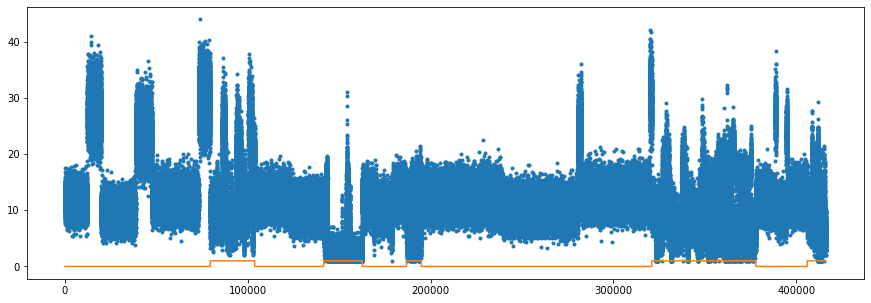

In [113]:
yfield = "pulse_coun0"
plt.figure(figsize = (15,5))
plt.plot(model_input[yfield], ".")
plt.plot(model_labels)

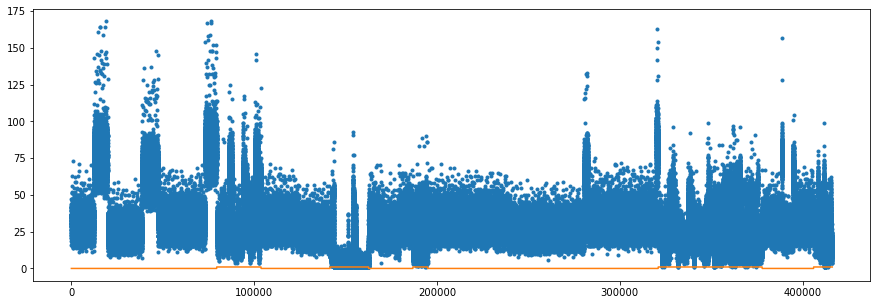

In [114]:
yfield = "count_tota0"
plt.figure(figsize = (15,5))
plt.plot(model_input[yfield], ".")
plt.plot(model_labels)

In [81]:
len(val_input)

107213

### ANN model (with single hidden layer) - Spatiotemporal Test

Finish setting the ANN input data for NOV 13
Model: "sequential_46"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_100 (Dense)            (None, 30)                180       
_________________________________________________________________
dense_101 (Dense)            (None, 1)                 31        
Total params: 211
Trainable params: 211
Non-trainable params: 0
_________________________________________________________________


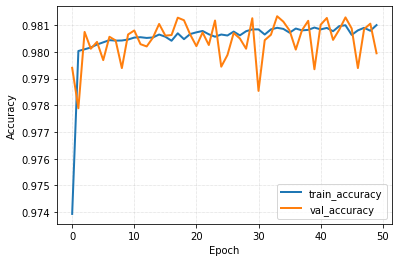

*** TEST RESULT (NOV 13) ***
3242/3242 [==============================] - 2s 482us/step - loss: 0.1452 - accuracy: 0.9216
####################################################

Finish setting the ANN input data for NOV 20
Model: "sequential_47"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_102 (Dense)            (None, 30)                180       
_________________________________________________________________
dense_103 (Dense)            (None, 1)                 31        
Total params: 211
Trainable params: 211
Non-trainable params: 0
_________________________________________________________________


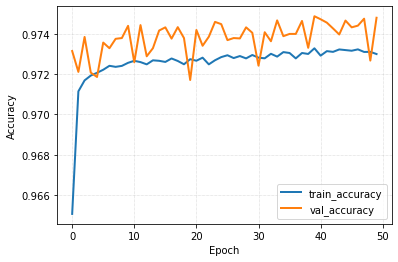

*** TEST RESULT (NOV 20) ***
1839/1839 [==============================] - 1s 466us/step - loss: 0.0398 - accuracy: 0.9824
####################################################

Finish setting the ANN input data for NOV 22
Model: "sequential_48"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_104 (Dense)            (None, 30)                180       
_________________________________________________________________
dense_105 (Dense)            (None, 1)                 31        
Total params: 211
Trainable params: 211
Non-trainable params: 0
_________________________________________________________________


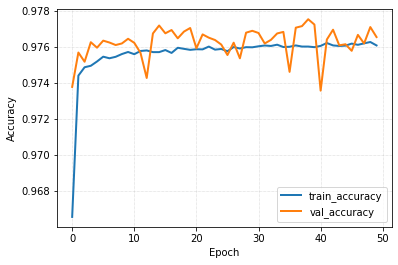

*** TEST RESULT (NOV 22) ***
1008/1008 [==============================] - 0s 479us/step - loss: 0.0826 - accuracy: 0.9740
####################################################

Finish setting the ANN input data for NOV 23
Model: "sequential_49"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_106 (Dense)            (None, 30)                180       
_________________________________________________________________
dense_107 (Dense)            (None, 1)                 31        
Total params: 211
Trainable params: 211
Non-trainable params: 0
_________________________________________________________________


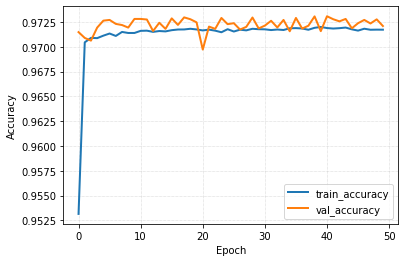

*** TEST RESULT (NOV 23) ***
5719/5719 [==============================] - 3s 463us/step - loss: 0.0572 - accuracy: 0.9821
####################################################

Finish setting the ANN input data for NOV 26
Model: "sequential_50"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_108 (Dense)            (None, 30)                180       
_________________________________________________________________
dense_109 (Dense)            (None, 1)                 31        
Total params: 211
Trainable params: 211
Non-trainable params: 0
_________________________________________________________________


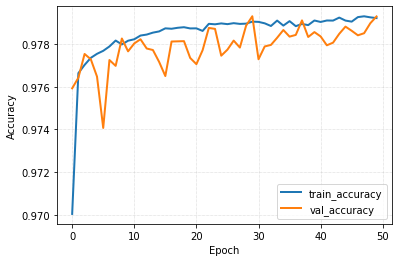

*** TEST RESULT (NOV 26) ***
1200/1200 [==============================] - 1s 478us/step - loss: 0.1407 - accuracy: 0.9300
####################################################



In [117]:
## Train & Test by DATES ================================================

def ANN(train_input):
    # Build ANN model
    # with single layer of 20 nodes, activation function = relu, output layer = 1
    # you can add more layers if you want
    model = keras.Sequential([
        layers.Dense(30, activation='relu', input_shape=[len(train_input.keys())]),
#         layers.Dense(10, activation='relu'),
#         layers.Dense(10, activation='relu'),
        layers.Dense(1)
    ])
    
    model.compile(loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
                  optimizer='adam',
                  metrics=['accuracy'])
    return model

## Divide train / validation / test dataset ===============================

if 'ANN_model' not in locals():
    ANN_model = {}

fields = ['elev_mss', 'stdev', 'pulse_coun', 'count_high', 'conf']
# Select fields to be included as the input fields

input_fields = []
for k in range(0, 1):
    for field in fields:
        input_fields.append(field + str(k))
    
for testday in [13, 20, 22, 23, 26]:
    test_idx = (model_info.day == testday)
    # test_idx = (model_info.beam == "gt1r")

    test_input = model_norm_input[input_fields][test_idx]
    test_labels = model_labels[test_idx]
    test_info = model_info[test_idx]

    train_input = model_norm_input[input_fields][test_idx == False].sample(frac=0.7)
    train_labels = model_labels[train_input.index]
    train_info = model_info.loc[train_input.index]

    val_input = model_norm_input[input_fields][test_idx == False].drop(train_input.index)
    val_labels = model_labels[test_idx == False].drop(train_input.index)
    val_info = model_info[test_idx == False].drop(train_input.index)

    print("Finish setting the ANN input data for NOV {0}".format(testday))

    ## Build ANN model ===================================================
    model = ANN(train_input)
    model.summary()
    EPOCHS = 50
    # How many epoches you will do?

    history = model.fit(train_input, train_labels,
                        epochs=EPOCHS, validation_data=(val_input, val_labels), verbose=0)

    # show the history of the model training
    # the accuracy of the train and validation for each epoch
    plt.figure(figsize = (6,4))
    plt.plot(history.history['accuracy'], label='train_accuracy', lw = 2)
    plt.plot(history.history['val_accuracy'], label = 'val_accuracy', lw = 2)
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    # plt.ylim([0.9, 1])
    plt.legend(loc='lower right')
    plt.grid(ls = ':', lw = 0.5)
    plt.show()

    print("*** TEST RESULT (NOV {0}) ***".format(testday))
    train_loss, train_acc = model.evaluate(train_input, train_labels, verbose=1)
    val_loss, val_acc = model.evaluate(val_input, val_labels, verbose=1)
    test_loss, test_acc = model.evaluate(test_input, test_labels, verbose=1)
    
    ANN_model['Nov{0}'.format(testday)] = model
    print("####################################################\n")
print("FINISH!")

In [118]:
input_fields

['elev_mss0', 'stdev0', 'pulse_coun0', 'count_high0', 'conf0']

### Test ANN models for the real ATL03 tracks

In [102]:
## Make ANN test data (5 points sampling) to apply ML models ========================
## Make CSV files only if there is no avaialbe CSV files ============================

import shapefile
def read_shapefile(shp_path):   

    #read file, parse out the records and shapes
    sf = shapefile.Reader(shp_path)
    fields = [x[0] for x in sf.fields][1:]
    records = sf.records()
    # shps = [s.points for s in sf.shapes()]
    shps = [s.points for s in sf.shapes()]
    X = []
    Y = []
    
    for p in shps:
        X.append(p[0][0])
        Y.append(p[0][1])

    #write into a dataframe
    df = pd.DataFrame(columns=fields, data=records)
#     df = df.assign(coords=shps)
#     df = df.assign(x=X)
#     df = df.assign(y=Y)

    return df.reset_index(drop = True)

def make_test_input(data, fields, info_fields, nearby):
    # Make input of ANN
    # data: input dataframe (2-m sampled ATL03 data with elev, stdev, total_ratio, pulse_count)
    # field: data field (list) ['elev', 'stdev', 'total_rati', ... ]
    # info_fields: information fields (list)
    # nearby: how many nearby pixels are used for ANN input? one pixel = 2m
    # (e.g. 5 nearby => consider +- 5 pixels from the center pixel => input: 10)
    
    start = time.time()
    first = True
    for i in range(nearby, len(data)-nearby-1):
        possible_point = True
        D = pd.DataFrame({})
        for j in range(i-nearby, i+nearby+1):
            if abs(data.x[j] - data.x[i]) >= 10: # input data should be in 10 meter interval
                possible_point = False
            for field in fields:                
                fieldname = field + str(j-i)
                D[fieldname] = [data[field][j]]
        if possible_point:
            D2 = data[info_fields].loc[[i], :]
            D2['ph_index'] = i
            if first:
                dF = D
                dF2 = D2
                first = False
            else:
                dF = dF.append(D)
                dF2 = dF2.append(D2)
        if i % 5000 == 0:
            end = time.time()
            print("now working on ... {0} / {1} ({2} %, {3} sec)"
                  .format(i, len(data), round(i/len(data)*100, 2), int(end-start)))
    dF = dF.reset_index(drop=True)
    dF2 = dF2.reset_index(drop=True)
    end = time.time()
    print("FINISH reading ... {0} / {1} ({2} %, {3} sec)"
          .format(i, len(data), round(i/len(data)*100, 2), int(end-start)))
    return dF, dF2

## Read ATL03 data (from shpfiles) ======================================
shpfiles = glob.glob("F:/ATL03/ATL03/RossSea/shpfile/*.shp")
input_path = 'F:/ATL03/ANN_train/RossSea/test/'
input_fields = ['elev_mss', 'stdev', 'ph_id_coun', 'pulse_coun', 'conf',
               'count_high', 'count_nois', 'count_tota', 'fpb_corr']
num_var = len(input_fields)

info_fields = ["lat", "lon", "x", "y", "year", "month", "day",
               "elev", "elev_mss", "mss", "conf", "ph_id_coun", "pulse_coun",
               "stdev", "count_high", "count_nois", "count_tota", "fpb_corr"
              ]

for shpfile in shpfiles:  
    filename = os.path.basename(shpfile).replace(".shp", ".csv")
    if os.path.isfile(input_path + "Track_input_{0}".format(num_var) + filename) == False: 
        print(">>> Start making input of {0}".format(shpfile))
        alltrack = read_shapefile(shpfile)     
        if len(alltrack) > 0:
            track_input, track_info = make_test_input(alltrack, input_fields, info_fields, 2)
            track_input.to_csv(input_path + "Track_input_{0}var".format(num_var) + filename, index = False)
            track_info.to_csv(input_path + "Track_info_{0}var".format(num_var) + filename, index = False)
        print("=== Complete making input of {0}".format(shpfile))
print("FINISH")

>>> Start making input of F:/ATL03/ATL03/RossSea/shpfile\ATL03_20191113191053_07310510_gt1r.shp
now working on ... 5000 / 90543 (5.52 %, 140 sec)
now working on ... 10000 / 90543 (11.04 %, 294 sec)
now working on ... 15000 / 90543 (16.57 %, 470 sec)
now working on ... 20000 / 90543 (22.09 %, 662 sec)
now working on ... 25000 / 90543 (27.61 %, 882 sec)
now working on ... 30000 / 90543 (33.13 %, 1131 sec)
now working on ... 35000 / 90543 (38.66 %, 1398 sec)
now working on ... 40000 / 90543 (44.18 %, 1687 sec)
now working on ... 45000 / 90543 (49.7 %, 2009 sec)
now working on ... 50000 / 90543 (55.22 %, 2363 sec)
now working on ... 55000 / 90543 (60.74 %, 2745 sec)
now working on ... 60000 / 90543 (66.27 %, 3152 sec)
now working on ... 65000 / 90543 (71.79 %, 3581 sec)
now working on ... 70000 / 90543 (77.31 %, 4032 sec)
now working on ... 75000 / 90543 (82.83 %, 4508 sec)
now working on ... 80000 / 90543 (88.36 %, 5014 sec)
now working on ... 85000 / 90543 (93.88 %, 5547 sec)
now working

now working on ... 5000 / 100564 (4.97 %, 142 sec)
now working on ... 10000 / 100564 (9.94 %, 298 sec)
now working on ... 15000 / 100564 (14.92 %, 476 sec)
now working on ... 20000 / 100564 (19.89 %, 674 sec)
now working on ... 25000 / 100564 (24.86 %, 895 sec)
now working on ... 30000 / 100564 (29.83 %, 1141 sec)
now working on ... 35000 / 100564 (34.8 %, 1409 sec)
now working on ... 40000 / 100564 (39.78 %, 1702 sec)
now working on ... 45000 / 100564 (44.75 %, 2025 sec)
now working on ... 50000 / 100564 (49.72 %, 2380 sec)
now working on ... 55000 / 100564 (54.69 %, 2757 sec)
now working on ... 60000 / 100564 (59.66 %, 3158 sec)
now working on ... 65000 / 100564 (64.64 %, 3584 sec)
now working on ... 70000 / 100564 (69.61 %, 4031 sec)
now working on ... 75000 / 100564 (74.58 %, 4501 sec)
now working on ... 80000 / 100564 (79.55 %, 4997 sec)
now working on ... 85000 / 100564 (84.52 %, 5518 sec)
now working on ... 90000 / 100564 (89.5 %, 6062 sec)
now working on ... 95000 / 100564 (94.

now working on ... 85000 / 140775 (60.38 %, 5713 sec)
now working on ... 90000 / 140775 (63.93 %, 6267 sec)
now working on ... 95000 / 140775 (67.48 %, 6845 sec)
now working on ... 100000 / 140775 (71.04 %, 7445 sec)
now working on ... 105000 / 140775 (74.59 %, 8069 sec)
now working on ... 110000 / 140775 (78.14 %, 8715 sec)
now working on ... 115000 / 140775 (81.69 %, 9384 sec)
now working on ... 120000 / 140775 (85.24 %, 10075 sec)
now working on ... 125000 / 140775 (88.79 %, 10790 sec)
now working on ... 130000 / 140775 (92.35 %, 11532 sec)
now working on ... 135000 / 140775 (95.9 %, 12305 sec)
now working on ... 140000 / 140775 (99.45 %, 13099 sec)
FINISH reading ... 140771 / 140775 (100.0 %, 13224 sec)
=== Complete making input of F:/ATL03/ATL03/RossSea/shpfile\ATL03_20191123180255_08830510_gt2r.shp
>>> Start making input of F:/ATL03/ATL03/RossSea/shpfile\ATL03_20191123180255_08830510_gt3r.shp
now working on ... 5000 / 140638 (3.56 %, 157 sec)
now working on ... 10000 / 140638 (7.

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
>>> START Track_input_9varATL03_20191113191053_07310510_gt1r.csv
... Finish sampling reference surface and calculate freeboard
>>> START ATL10-02_20191113181045_07310501_003_03.h5


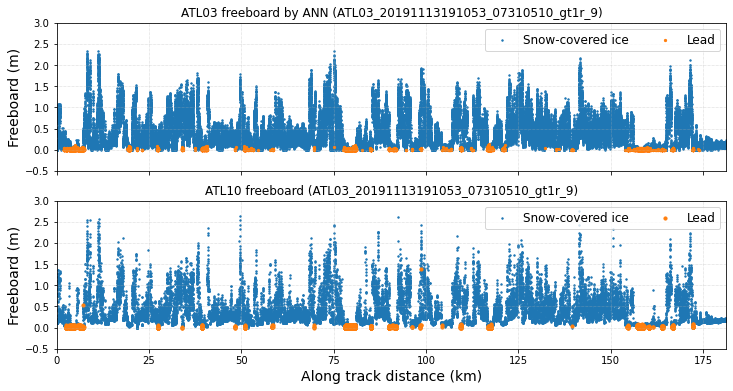

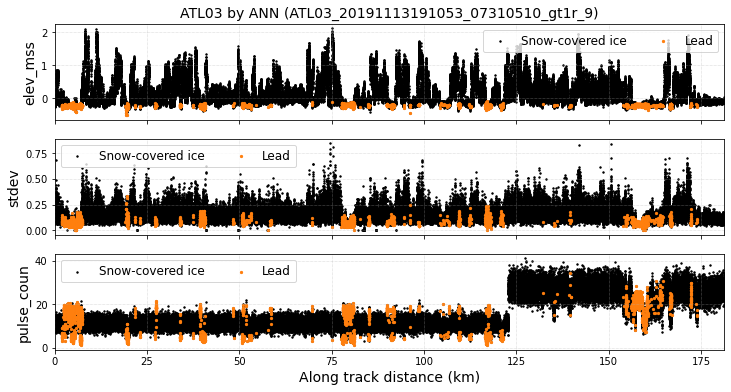

>>> START Track_input_9varATL03_20191113191053_07310510_gt2r.csv
... Finish sampling reference surface and calculate freeboard
>>> START ATL10-02_20191113181045_07310501_003_03.h5


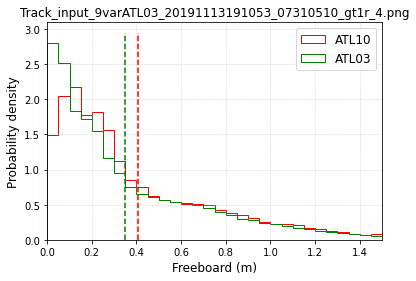

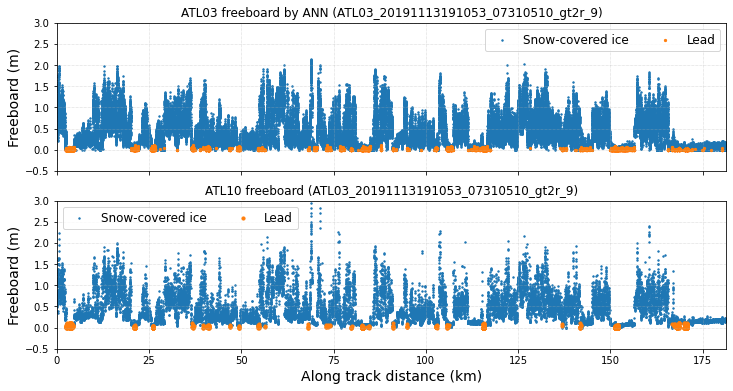

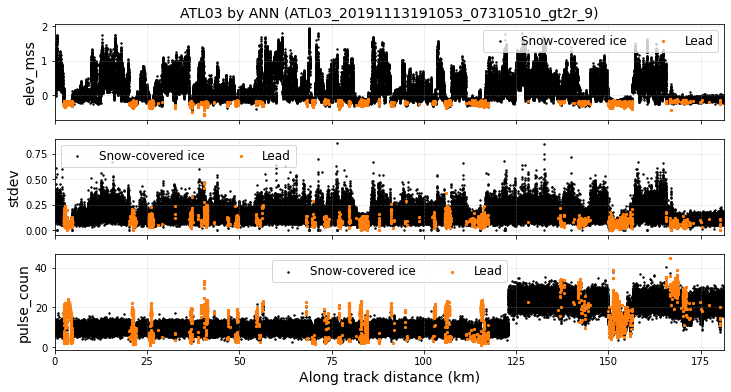

>>> START Track_input_9varATL03_20191113191053_07310510_gt3r.csv
... Finish sampling reference surface and calculate freeboard
>>> START ATL10-02_20191113181045_07310501_003_03.h5


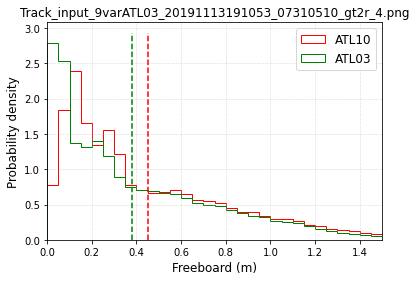

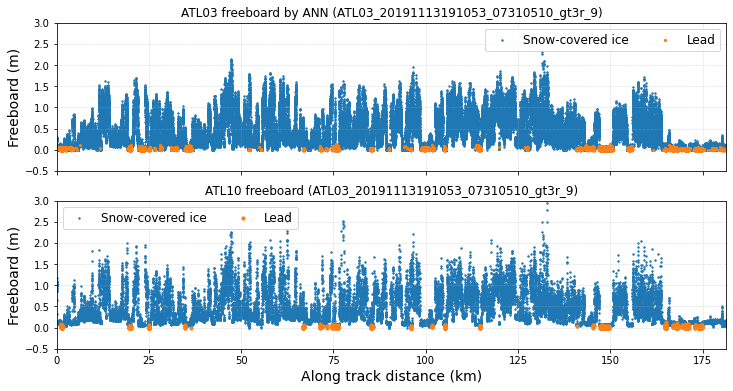

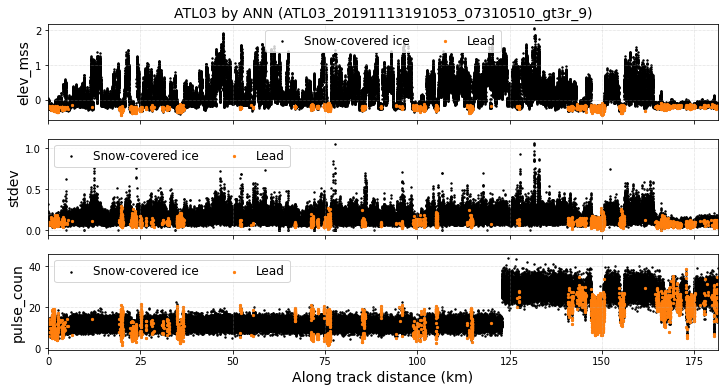

>>> START Track_input_9varATL03_20191116192813_07770510_gt1r.csv
>>> START Track_input_9varATL03_20191116192813_07770510_gt2r.csv
>>> START Track_input_9varATL03_20191116192813_07770510_gt3r.csv
>>> START Track_input_9varATL03_20191118183654_08070510_gt1r.csv
>>> START Track_input_9varATL03_20191118183654_08070510_gt2r.csv
>>> START Track_input_9varATL03_20191118183654_08070510_gt3r.csv
>>> START Track_input_9varATL03_20191118201111_08080510_gt1r.csv
>>> START Track_input_9varATL03_20191118201111_08080510_gt2r.csv
>>> START Track_input_9varATL03_20191118201111_08080510_gt3r.csv
>>> START Track_input_9varATL03_20191120191952_08380510_gt1r.csv
... Finish sampling reference surface and calculate freeboard
>>> START ATL10-02_20191120181944_08380501_003_03.h5


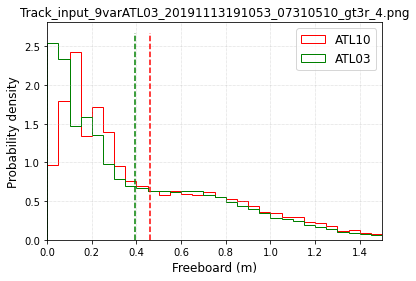

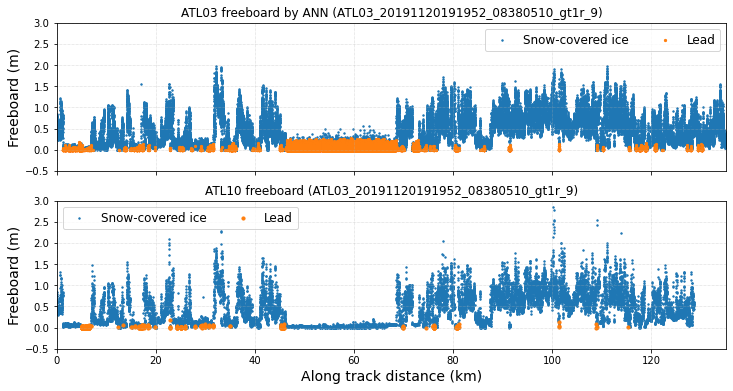

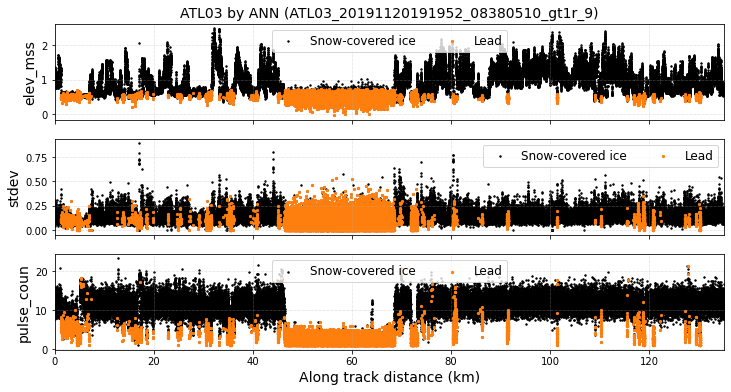

>>> START Track_input_9varATL03_20191120191952_08380510_gt2r.csv
... Finish sampling reference surface and calculate freeboard
>>> START ATL10-02_20191120181944_08380501_003_03.h5


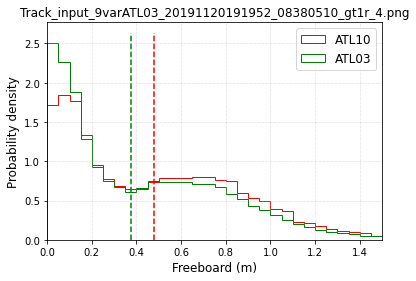

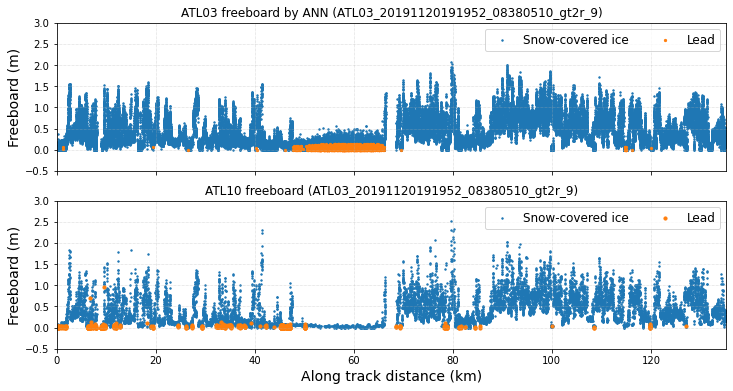

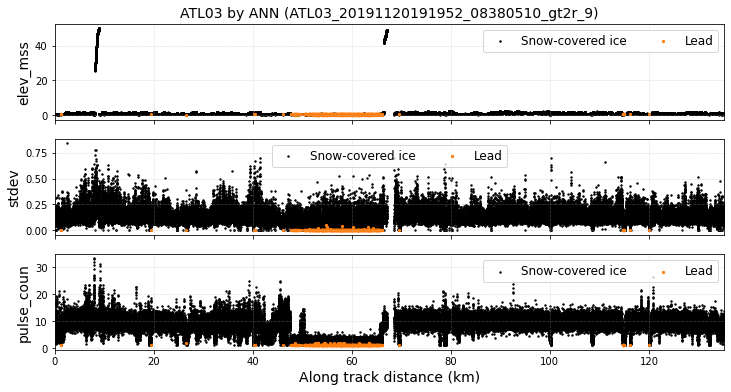

>>> START Track_input_9varATL03_20191122182834_08680510_gt1r.csv
... Finish sampling reference surface and calculate freeboard
>>> START ATL10-02_20191122172826_08680501_003_03.h5


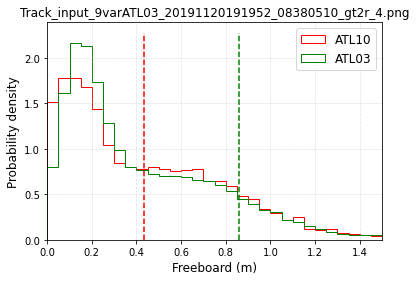

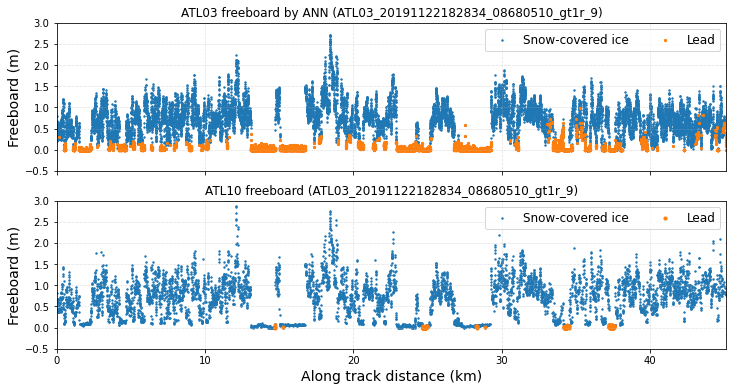

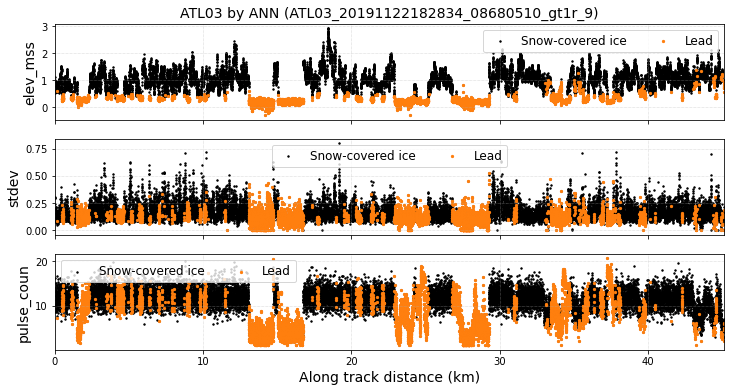

>>> START Track_input_9varATL03_20191122182834_08680510_gt2r.csv
... Finish sampling reference surface and calculate freeboard
>>> START ATL10-02_20191122172826_08680501_003_03.h5


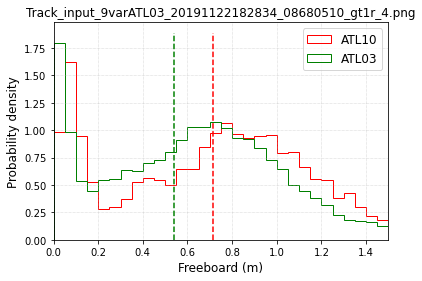

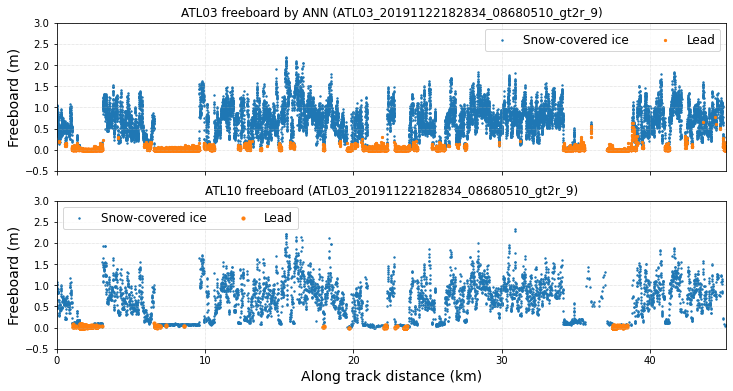

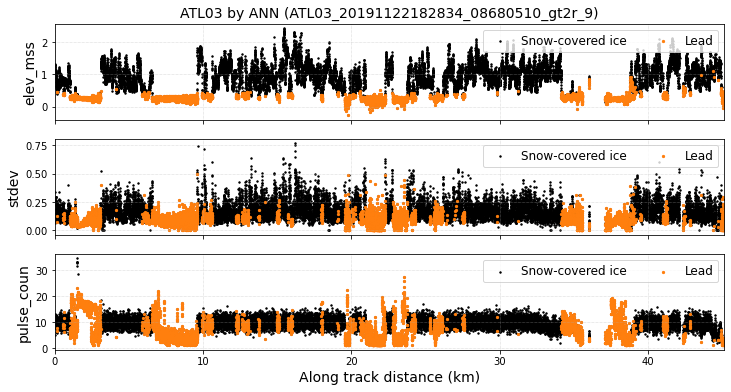

>>> START Track_input_9varATL03_20191122182834_08680510_gt3r.csv
... Finish sampling reference surface and calculate freeboard
>>> START ATL10-02_20191122172826_08680501_003_03.h5


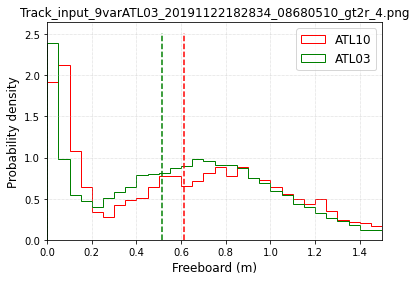

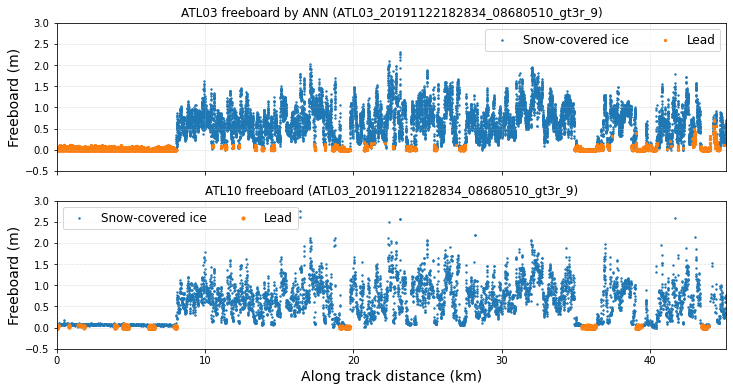

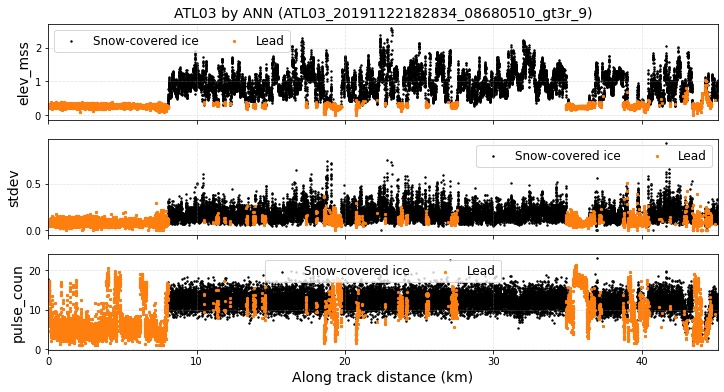

>>> START Track_input_9varATL03_20191123180255_08830510_gt1r.csv
... Finish sampling reference surface and calculate freeboard
>>> START ATL10-02_20191123170246_08830501_003_03.h5


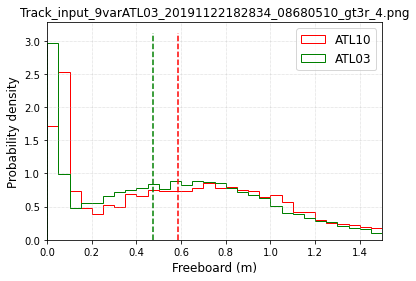

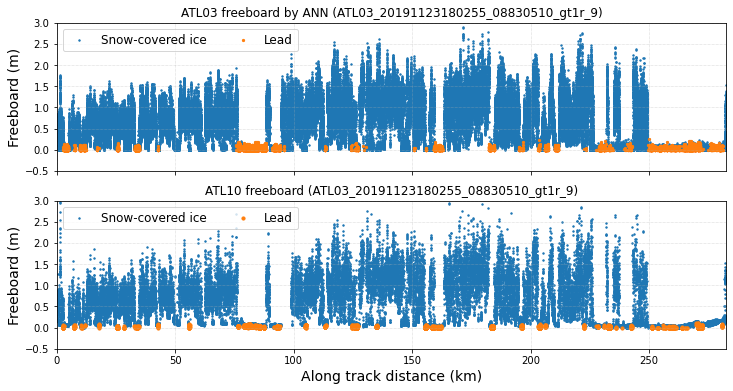

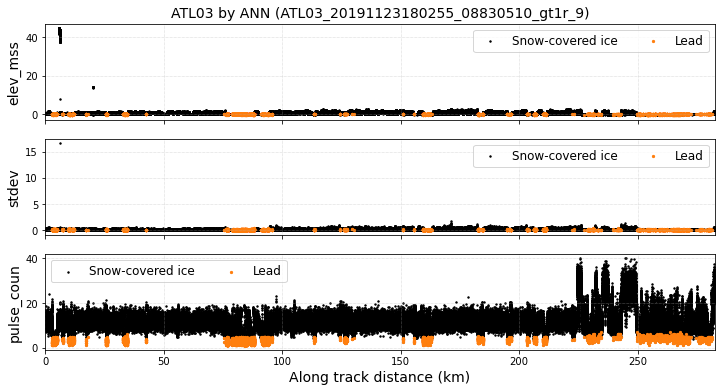

>>> START Track_input_9varATL03_20191123180255_08830510_gt2r.csv
... Finish sampling reference surface and calculate freeboard
>>> START ATL10-02_20191123170246_08830501_003_03.h5


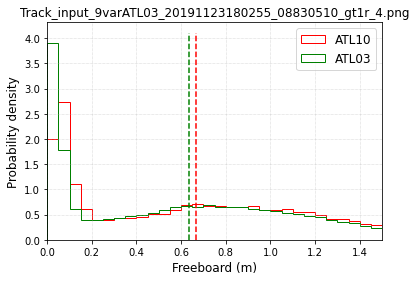

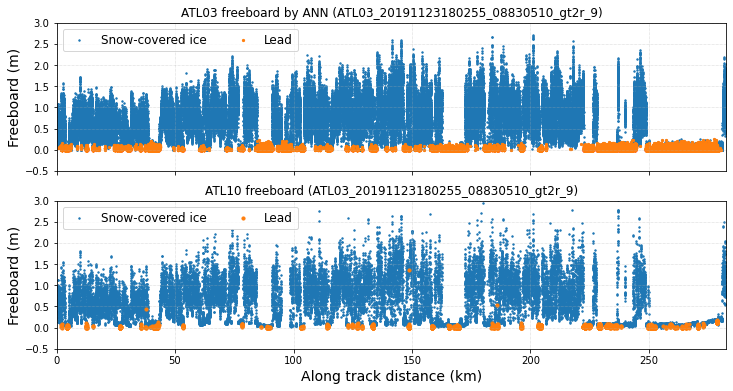

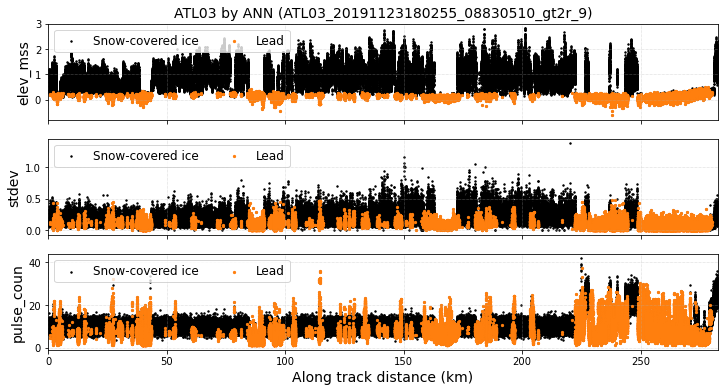

>>> START Track_input_9varATL03_20191123180255_08830510_gt3r.csv
... Finish sampling reference surface and calculate freeboard
>>> START ATL10-02_20191123170246_08830501_003_03.h5


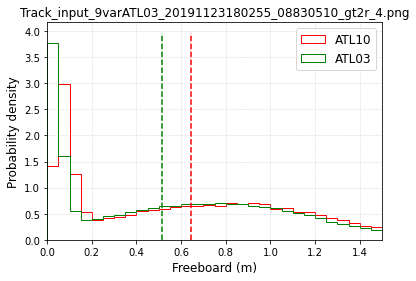

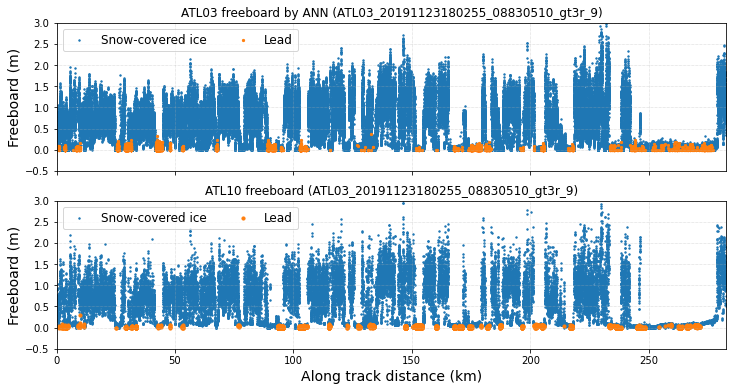

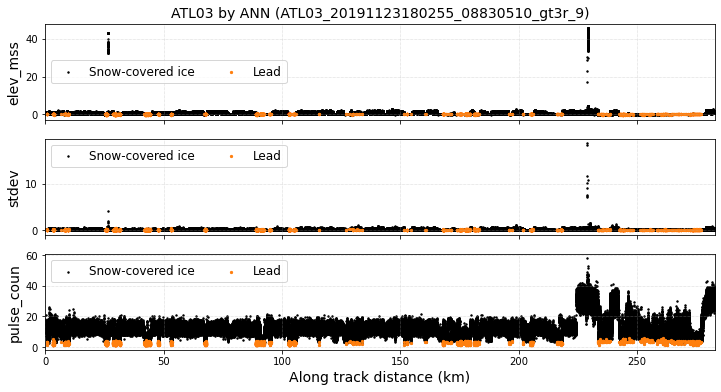

>>> START Track_input_9varATL03_20191126182014_09290510_gt1r.csv
... Finish sampling reference surface and calculate freeboard
>>> START ATL10-02_20191126172006_09290501_003_03.h5


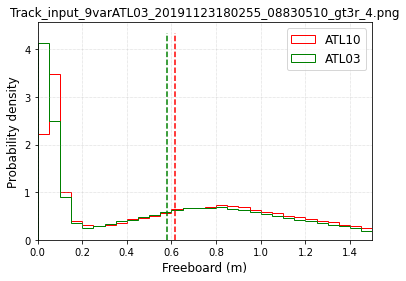

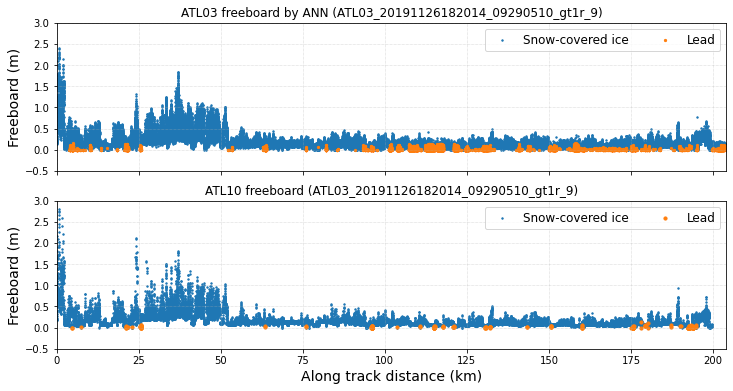

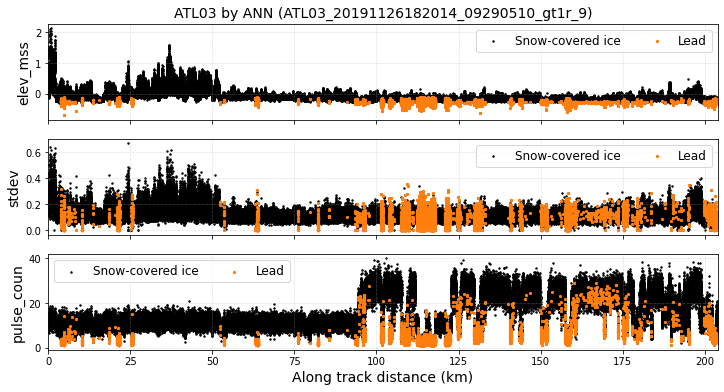

>>> START Track_input_9varATL03_20191126182014_09290510_gt2r.csv
... Finish sampling reference surface and calculate freeboard
>>> START ATL10-02_20191126172006_09290501_003_03.h5


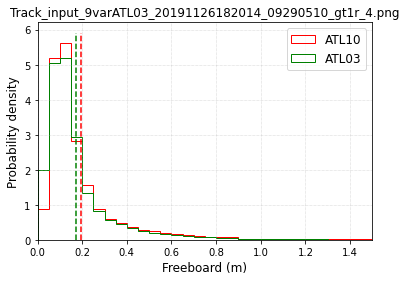

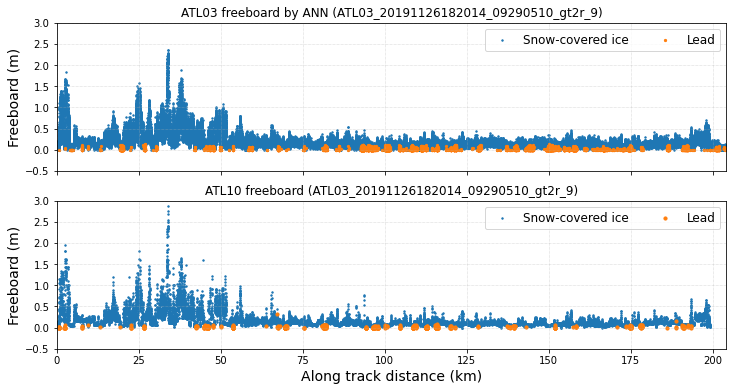

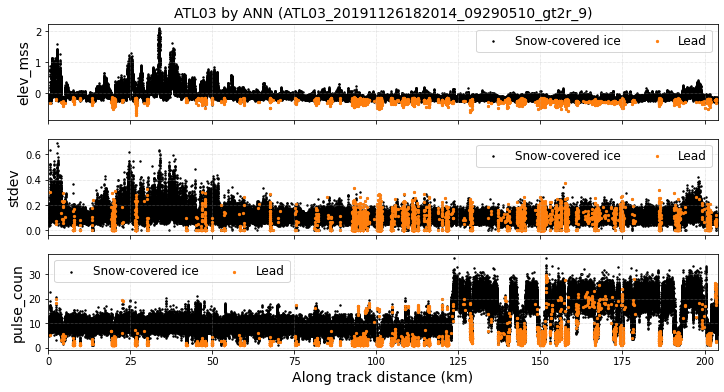

>>> START Track_input_9varATL03_20191126182014_09290510_gt3r.csv
... Finish sampling reference surface and calculate freeboard
>>> START ATL10-02_20191126172006_09290501_003_03.h5


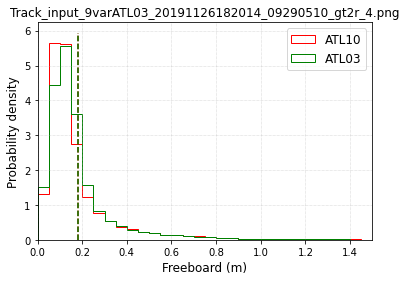

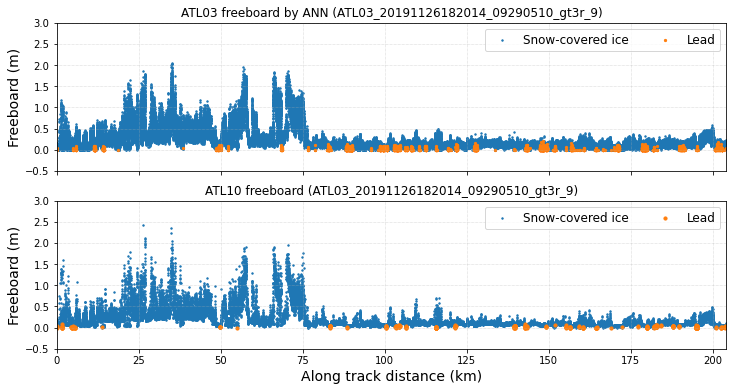

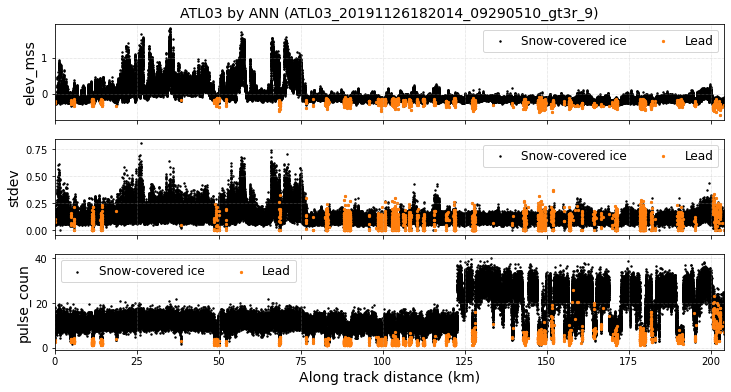

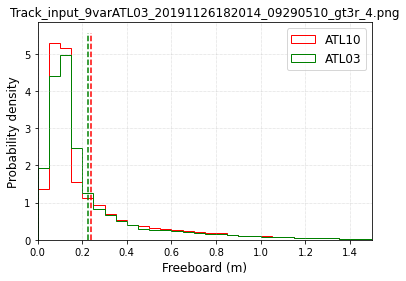

In [137]:
## Load saved ATL03 & ATL10 files ==============================================
## Calculate freeboard by using ML model =======================================

def norm(x, M = 1, m = 0):
    # Normalize the input data
    # output = (x-m)/(M-m) # Max-min normalization
    output = (x-x.median())/(x.std()) # mean-std normalization
    return output

def determine_beam(fileT, beam):
    # Determine the index of the beam (gt1r, gt1l, gt2r, gt2l, gt3r, gt3l)
    f1 = h5py.File(fileT, 'r')
    orient = f1['orbit_info']['sc_orient'][:]  # orientation - 0: backward, 1: forward, 2: transition
    
    if len(orient) > 1:
        print('Transitioning, do not use for science!')
    elif (orient == 0):
        beams=['gt1l', 'gt1r', 'gt2l', 'gt2r', 'gt3l', 'gt3r']
        return beams.index(beam)
    elif (orient == 1):
        beams=['gt3r', 'gt3l', 'gt2r', 'gt2l', 'gt1r', 'gt1l']
        return beams.index(beam)    
    
def calculate_freeboard(alltrack, track_info, predictions, threshold, seg_len = 10000, overlap = 5):
    # Calculate freeboard from the leads detected by ML models
    lead = alltrack.loc[track_info["ph_index"][predictions > threshold], :]
    alltrack['ref_fit'] = 0
    alltrack['ref_count'] = 0
    alltrack['ref_height'] = 0

    for L in range(int(min(alltrack.x)), int(max(alltrack.x)), int(seg_len/overlap)):
        L1 = L + 0
        L2 = L + seg_len    
        lead_seg = lead[(lead.x >= L1) & (lead.x < L2)].reset_index(drop = True)
        meanlead = np.mean(lead_seg['elev_mss'])
        lead_seg['weight'] = 1/(lead_seg['elev_mss'] - meanlead)**2

        while len(lead_seg) <= 10:
            L1 = L1 - int(seg_len/2)
            L2 = L2 + int(seg_len/2)
            lead_seg = lead[(lead.x >= L1) & (lead.x < L2)].reset_index(drop = True)
            meanlead = np.mean(lead_seg['elev_mss'])
            lead_seg['weight'] = 1/(lead_seg['elev_mss'] - meanlead)**2 
        
        lead_height = np.sum((lead_seg['weight']/np.sum(lead_seg['weight']))*lead_seg['elev_mss'])
        track_seg = alltrack[(alltrack.x >= L1) & (alltrack.x < L2)]
        track_seg['ref_fit'] = lead_height # linear fitting

        alltrack['ref_fit'][track_seg.index] = alltrack['ref_fit'][track_seg.index] + track_seg['ref_fit']
        alltrack['ref_count'][track_seg.index] = alltrack['ref_count'][track_seg.index] + 1
    
    alltrack['ref_height'] = alltrack['ref_fit'] / alltrack['ref_count']
    alltrack['x_atc'] = alltrack['x'] - alltrack['x'][0]
    
    print("... Finish sampling reference surface and calculate freeboard")

    alltrack["freeboard"] = alltrack['elev_mss'] - alltrack['ref_height']
    alltrack["freeboard"][alltrack["freeboard"] < 0] = 0
    
    return alltrack
    
def draw_track(alltrack, track_info, prediction, threshold, test_ATL10, trackname):
    
    alltrack['x_atc'] = (alltrack.x - alltrack.x[0]) / 1000
    test_ATL10['x_atc'] = (test_ATL10.x - test_ATL10.x[0]) / 1000

    fig,ax=plt.subplots(2,1,figsize=(12,6), sharex=True)

    xfield = 'x_atc'
    field = 'freeboard'

    # ATL03 ----------------------------------------
    lead = track_info["ph_index"][predictions > threshold]
    ax[0].scatter(alltrack[xfield], alltrack[field], label = "Snow-covered ice", s = 2) # plot the elevation of ice points
    ax[0].scatter(alltrack[xfield][lead], alltrack[field][lead], label = "Lead", s = 5) # plot the elevation of water points
#     ax[0].plot(alltrack[xfield][lead], alltrack["ref_height"][lead], label = "lead", color = 'k') # plot the elevation of water points
    ax[0].set_ylabel('Freeboard (m)',fontsize=14)
    ax[0].grid(linestyle = ':', linewidth = 0.5)
    ax[0].legend(ncol=2, fontsize = 12)
    ax[0].set_title('ATL03 freeboard by ANN ({0})'.format(trackname))
    ax[0].set_ylim(-0.5, 3)

    # ATL10 ----------------------------------------
    lead_ndx = (test_ATL10.lead == 1)
    ax[1].scatter(test_ATL10[xfield], test_ATL10[field], s = 2, label = "Snow-covered ice")
    ax[1].scatter(test_ATL10[xfield][lead_ndx], test_ATL10[field][lead_ndx], s = 10, label = "Lead")
    ax[1].set_ylabel('Freeboard (m)',fontsize=14)
    ax[1].grid(linestyle = ':', linewidth = 0.5)
    ax[1].legend(ncol=2, fontsize = 12)
    ax[1].set_title('ATL10 freeboard ({0})'.format(trackname))
    ax[1].set_ylim(-0.5, 3)
    ax[1].set_xlim(0, max(alltrack[xfield]))

    plt.xlabel('Along track distance (km)',fontsize=14)

    plt.show()

    fig.savefig("F:/ATL03/figures/Comparison_with_ATL10/Tracks_ANN_{0}".format(trackname),
                bbox_inches = "tight")
    
    
def draw_track03(alltrack, track_info, prediction, threshold, test_ATL10, trackname, fields):
    
    alltrack['x_atc'] = (alltrack.x - alltrack.x[0]) / 1000
    test_ATL10['x_atc'] = (test_ATL10.x - test_ATL10.x[0]) / 1000

    fig, ax = plt.subplots(len(fields),1,figsize=(12,6), sharex=True)

    xfield = 'x_atc'
    
    for i in range(0, len(fields)):
        field = fields[i]
        # ATL03 ----------------------------------------
        lead = track_info["ph_index"][predictions > threshold]
        ax[i].scatter(alltrack[xfield], alltrack[field], label = "Snow-covered ice", s = 2, color = "k")
        # plot the elevation of ice points
        ax[i].scatter(alltrack[xfield][lead], alltrack[field][lead], label = "Lead", s = 5, color = "tab:orange")
        ax[i].set_ylabel(field, fontsize=14)
        ax[i].grid(linestyle = ':', linewidth = 0.5)
        ax[i].legend(ncol=2, fontsize = 12)
        ax[i].set_xlim(0, max(alltrack[xfield]))
        if i == 0:
            ax[0].set_title('ATL03 by ANN ({0})'.format(trackname) ,fontsize=14)
    plt.xlabel('Along track distance (km)',fontsize=14)
    plt.show()
    
    fig.savefig("F:/Documents/Project/NASA_FINESST_2021/Figures/Tracks03_ANN_{0}".format(trackname),
                bbox_inches = "tight")
    
def draw_distribution(alltrack, test_ATL10, trackname):    
    
    xfield = 'x_atc'
    field = 'freeboard'
    
    plt.figure(figsize = (6,4))
    maxfb = 1.5
    minfb = 0
    plt.hist(test_ATL10[field][test_ATL10[field]>0], bins = int(maxfb/0.05), range = (0, maxfb),
             density = True, histtype = 'step', color = 'r', label = 'ATL10')
    plt.hist(alltrack[field][alltrack[field]>0], bins = int(maxfb/0.05), range = (0, maxfb),
             density = True, histtype = 'step', color = 'g', label = 'ATL03')
    ymin, ymax = plt.ylim()
    plt.vlines(np.mean(test_ATL10[field]), ymin, ymax, linestyle = "--", color = "r")
    plt.vlines(np.mean(alltrack[field]), ymin, ymax, linestyle = "--", color = "g")
    plt.grid(linewidth = 0.5, linestyle = ":")
    plt.xlabel("Freeboard (m)", fontsize = 12)
    plt.ylabel("Probability density", fontsize = 12)
    plt.xlim(minfb, maxfb)
    plt.legend(fontsize = 12)
    plt.title(trackname, fontsize = 12)
    plt.savefig("F:/ATL03/figures/Comparison_with_ATL10/Fb_Hist_DNN_{0}".format(trackname),
                bbox_inches = "tight")


# MAIN ================================================================================
import os, sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
# make sure we're dealing with the most recent version of any code we're using
%load_ext autoreload
%autoreload 2
from readers import get_ATL10data, get_ATL10lead
thresholds = {'13': 0.5, '20': 0.5, '22': 0.5, '23': 0.5, '26': 0.5}

# Read ATL03 file and calculate freeboard by using ML model
track_files = sorted(glob.glob("F:/ATL03/ANN_train/RossSea/test/Track_input_9var*.csv"))
for track in track_files[0:]:
    print(">>> START {0}".format(os.path.basename(track)))
    # Read ATL03 data
    shp_path = r"F:/ATL03/ATL03/RossSea/shpfile/"
    alltrack = read_shapefile(shp_path + os.path.basename(track)[16:].replace(".csv", ".shp")) 
    track_input = pd.read_csv(track)[input_fields]
    track_info = pd.read_csv(track.replace("_input_", "_info_"))
    track_info['beam'] = track[-8:-4]
    track_norm_input = norm(track_input)[input_fields]
    
    if alltrack.day[0] in [13, 20, 22, 23, 26]:
    
        # Apply ANN model
        modelname = "Nov{0}".format(int(track_info['day'][0]))
        threshold = thresholds[str(int(alltrack.day[0]))]
        model = ANN_model[modelname]
        predictions = model.predict(track_norm_input).flatten()

        # Calculate ATL03 freeboard from ML model -----------------------
        calculate_freeboard(alltrack, track_info, predictions, threshold)

        # Read ATL10 data ---------------------------------------
        path = "F:/ATL03/ATL10/RossSea/" # local directory (after download the csv file from Google Drive)
        ATL10file = glob.glob(path + "ATL10-02_{0}*.h5".format(track.split("ATL03_")[1][:8]))[0]
        bbox = [min(alltrack.lon), min(alltrack.lat), max(alltrack.lon), max(alltrack.lat)] # 2019.11.09
        print(">>> START {0}".format(os.path.basename(ATL10file)))
        beam_idx = determine_beam(ATL10file, track_info['beam'][0])
        test_ATL10 = get_ATL10data(ATL10file, 1000, bbox, [beam_idx])[0]
        lead_ATL10 = get_ATL10lead(ATL10file, 1000, bbox, [beam_idx])[0]
    
        if len(alltrack)>0 and len(test_ATL10) > 0:
            # Compare ATL03 and ATL10 + draw plots
            draw_track(alltrack, track_info, predictions, threshold, test_ATL10,
                       os.path.basename(os.path.basename(track)[16:].replace(".csv", "_9")))
            draw_track03(alltrack, track_info, predictions, threshold, test_ATL10,
                         os.path.basename(os.path.basename(track)[16:].replace(".csv", "_9")),
                         ['elev_mss', 'stdev', 'pulse_coun'])
            draw_distribution(alltrack, test_ATL10, os.path.basename(track).replace(".csv", "_4.png"))  

In [123]:
alltrack.keys()

Index(['lat', 'lon', 'x', 'y', 'heights', 'geocorr', 'elev', 'deltatime',
       'conf', 'ph_id_coun', 'pulse_coun', 'year', 'month', 'day', 'hour',
       'minute', 'second', 'stdev', 'count_high', 'count_nois', 'count_tota',
       'noise_rati', 'total_rati', 'fpb_corr', 'mss', 'elev_mss', 'ref_fit',
       'ref_count', 'ref_height', 'x_atc', 'freeboard'],
      dtype='object')

In [380]:
alltrack

lat         lon           x            y    heights    geocorr  \
0      -71.792212  176.593835  27739690.0  3318.849935 -61.786275 -60.721092   
1      -71.792225  176.593829  27739692.0  3318.850342 -61.980350 -60.721092   
2      -71.792248  176.593819  27739694.0  3318.846863 -61.796274 -60.721092   
3      -71.792256  176.593816  27739696.0  3318.846436 -61.829548 -60.721092   
4      -71.792286  176.593803  27739698.0  3318.843424 -61.903325 -60.721092   
...           ...         ...         ...          ...        ...        ...   
100500 -73.599902  175.766412  27943332.0  3323.614641 -61.137898 -60.019154   
100501 -73.599918  175.766404  27943334.0  3323.609712 -61.140594 -60.019127   
100502 -73.599935  175.766395  27943336.0  3323.604143 -61.132916 -60.019127   
100503 -73.599954  175.766385  27943338.0  3323.598067 -61.134136 -60.019127   
100504 -73.599973  175.766376  27943340.0  3323.592252 -61.154711 -60.019127   

            elev     deltatime      conf  ph_id_coun  ...  second     stdev  \
0      -1.065183  5.934342e+07  3.000000    1.000000  ...     0.0  0.160462   
1      -1.259258  5.934342e+07  3.000000    1.000000  ...     0.0  0.000000   
2      -1.075182  5.934342e+07  3.000000    1.250000  ...     0.0  0.126165   
3      -1.108456  5.934342e+07  3.000000    1.000000  ...     0.0  0.000000   
4      -1.182233  5.934342e+07  3.000000    1.000000  ...     0.0  0.127729   
...          ...           ...       ...         ...  ...     ...       ...   
100500 -1.118744  5.934345e+07  3.785714    1.285714  ...     0.0  0.108853   
100501 -1.121467  5.934345e+07  3.857143    1.095238  ...     0.0  0.110981   
100502 -1.113789  5.934345e+07  3.857143    1.428571  ...     0.0  0.099483   
100503 -1.115009  5.934345e+07  3.631579    1.105263  ...     0.0  0.157177   
100504 -1.135585  5.934345e+07  3.818182    1.409091  ...     0.0  0.112650   

        count_high  count_nois  count_tota  noise_rati  total_rati  fpb_corr  \
0                3           4           8    1.333333    0.375000  0.002765   
1                1           1           3    1.000000    0.333333  0.000901   
2                4          10          16    2.500000    0.250000  0.003523   
3                1           4           7    4.000000    0.142857  0.000901   
4                3           4          12    1.333333    0.250000  0.002684   
...            ...         ...         ...         ...         ...       ...   
100500          14           1          21    0.071429    0.666667  0.003320   
100501          21           3          29    0.142857    0.724138  0.002791   
100502          14           3          21    0.214286    0.666667  0.003857   
100503          19           3          24    0.157895    0.791667  0.003340   
100504          22           7          34    0.318182    0.647059  0.003857   

            mss  elev_mss  
0      -62.5369  0.750628  
1      -62.5369  0.556562  
2      -62.5369  0.740655  
3      -62.5369  0.707387  
4      -62.5370  0.633631  
...         ...       ...  
100500 -61.5346  0.396718  
100501 -61.5346  0.394019  
100502 -61.5346  0.401693  
100503 -61.5346  0.400469  
100504 -61.5346  0.379890  

[100505 rows x 26 columns]

In [330]:
glob.glob(path + "ATL10-02_{0}*.h5".format(ATL03name[6:14]))

['F:/ATL03/ATL10/RossSea\\ATL10-02_20191113181045_07310501_003_03.h5']

(-1.0, 3.0)

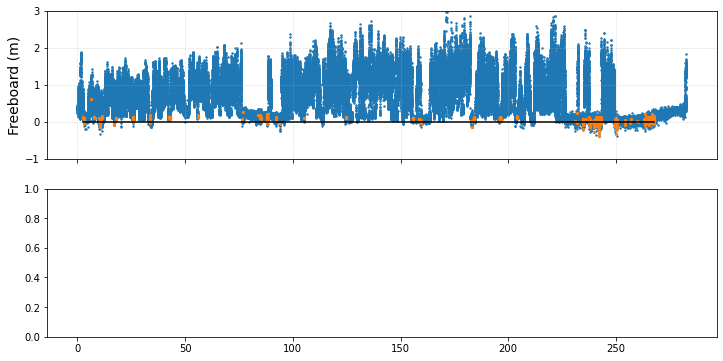

In [327]:
fig,ax=plt.subplots(2,1,figsize=(12,6), sharex=True)
threshold = 0
alltrack['x_atc'] = (alltrack.x - alltrack.x[0]) / 1000
xfield = 'x_atc'
field = 'elev_mss'

# ATL03 ----------------------------------------
lead = track_info["ph_index"][predictions > threshold]
ax[0].scatter(alltrack[xfield], alltrack[field], label = "freeboard", s = 2) # plot the elevation of ice points
ax[0].scatter(alltrack[xfield][lead], alltrack[field][lead], label = "lead", s = 5) # plot the elevation of water points
ax[0].plot(alltrack[xfield][lead], alltrack["ref_height"][lead], label = "lead", color = 'k') # plot the elevation of water points
ax[0].set_ylabel('Freeboard (m)',fontsize=14)
ax[0].grid(linestyle = ':', linewidth = 0.5)
ax[0].set_ylim(-1,3)

(-20.0, 10.0)

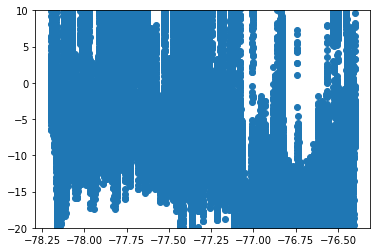

In [367]:
plt.scatter(track_info.lat, predictions)
plt.ylim(-20, 10)

In [302]:
lead = alltrack.loc[track_info["ph_index"][predictions > threshold], :]
lead

lat         lon           x            y    heights    geocorr  \
63    -76.401137 -167.187352  28241806.0  3326.546555 -60.881736 -59.744034   
973   -76.417228 -167.198288  28243626.0  3332.497735 -60.987848 -59.775078   
974   -76.417244 -167.198299  28243628.0  3332.498366 -61.006886 -59.775173   
975   -76.417260 -167.198310  28243630.0  3332.498919 -61.001378 -59.775173   
976   -76.417278 -167.198323  28243632.0  3332.499910 -61.036625 -59.775173   
...          ...         ...         ...          ...        ...        ...   
86905 -77.935863 -168.372975  28415678.0  3324.310059 -59.150432 -58.171040   
86906 -77.935882 -168.372992  28415680.0  3324.313257 -59.193308 -58.171040   
86907 -77.935896 -168.373004  28415682.0  3324.315369 -59.201047 -58.171040   
86908 -77.935915 -168.373020  28415684.0  3324.317871 -59.190515 -58.171040   
86909 -77.935933 -168.373035  28415686.0  3324.319987 -59.158261 -58.170791   

           elev     deltatime  conf  ph_id_coun  ...  second     stdev  \
63    -1.137702  5.890787e+07   4.0    1.187500  ...    10.0  0.114329   
973   -1.212770  5.890787e+07   4.0    1.444444  ...    10.0  0.086762   
974   -1.231712  5.890787e+07   4.0    1.307692  ...    10.0  0.111624   
975   -1.226204  5.890787e+07   4.0    1.214286  ...    10.0  0.111479   
976   -1.261452  5.890787e+07   4.0    1.105263  ...    10.0  0.131403   
...         ...           ...   ...         ...  ...     ...       ...   
86905 -0.979392  5.890790e+07   4.0    1.166667  ...    35.0  0.065713   
86906 -1.022268  5.890790e+07   4.0    1.100000  ...    35.0  0.097720   
86907 -1.030008  5.890790e+07   4.0    1.375000  ...    35.0  0.068621   
86908 -1.019475  5.890790e+07   4.0    1.875000  ...    35.0  0.103971   
86909 -0.987471  5.890790e+07   4.0    1.333333  ...    35.0  0.079638   

       count_high  count_nois  count_tota  noise_rati  total_rati  fpb_corr  \
63             16           6          26    0.375000    0.615385  0.003054   
973            18           2          24    0.111111    0.750000  0.003488   
974            13           6          24    0.461538    0.541667  0.003587   
975            14           5          27    0.357143    0.518519  0.003320   
976            19           2          24    0.105263    0.791667  0.003242   
...           ...         ...         ...         ...         ...       ...   
86905           6          31          41    5.166667    0.146341  0.002348   
86906          10          30          43    3.000000    0.232558  0.003054   
86907           8          34          43    4.250000    0.186047  0.002758   
86908           8          42          51    5.250000    0.156863  0.004953   
86909          12          29          49    2.416667    0.244898  0.003244   

           mss  elev_mss  
63    -60.7489 -0.132824  
973   -60.7768 -0.210999  
974   -60.7769 -0.230029  
975   -60.7769 -0.224511  
976   -60.7769 -0.259740  
...        ...       ...  
86905 -59.0570 -0.093445  
86906 -59.0569 -0.136368  
86907 -59.0569 -0.144143  
86908 -59.0569 -0.133656  
86909 -59.0568 -0.101447  

[11433 rows x 26 columns]

In [275]:
seg_len = 10000
overlap = 5
lead = track_info[predictions > threshold]
alltrack['ref_fit'] = 0
alltrack['ref_count'] = 0
alltrack['ref_height'] = 0

for L in range(int(min(alltrack.x)), int(max(alltrack.x)), int(seg_len/overlap)):
    L1 = L + 0
    L2 = L + seg_len    
    lead_seg = lead[(lead.x >= L1) & (lead.x < L2)].reset_index(drop = True)
    meanlead = np.mean(lead_seg.elev)
    lead_seg['weight'] = 1/(lead_seg.elev - meanlead)**2

    while len(lead_seg) <= 10:
        L1 = L1 - int(seg_len/2)
        L2 = L2 + int(seg_len/2)
        lead_seg = lead[(lead.x >= L1) & (lead.x < L2)].reset_index(drop = True)
        meanlead = np.mean(lead_seg.elev)
        lead_seg['weight'] = 1/(lead_seg.elev - meanlead)**2    
    
    lead_height = np.sum((lead_seg['weight']/np.sum(lead_seg['weight']))*lead_seg['elev'])
    track_seg = alltrack[(alltrack.x >= L1) & (alltrack.x < L2)]
    track_seg['ref_fit'] = lead_height # linear fitting

    alltrack['ref_fit'][track_seg.index] = alltrack['ref_fit'][track_seg.index] + track_seg['ref_fit']
    alltrack['ref_count'][track_seg.index] = alltrack['ref_count'][track_seg.index] + 1

alltrack['ref_height'] = alltrack['ref_fit'] / alltrack['ref_count']
alltrack['x_atc'] = alltrack['x'] - alltrack['x'][0]

28241684 28241684 28251684 -1.2134209394192699
28243684 28243684 28253684 -1.2132165427500665
28245684 28245684 28255684 -1.211282535119868
28247684 28247684 28257684 -1.2200720929821407
28249684 28244684 28264684 -1.2110850667411022
28251684 28251684 28261684 -1.216135891136027
28253684 28253684 28263684 -1.2072067462011422
28255684 28255684 28265684 -1.2079291842646251
28257684 28257684 28267684 -1.2079291842646251
28259684 28259684 28269684 -1.1958563225522574
28261684 28261684 28271684 -1.172544808357664
28263684 28263684 28273684 -1.1711936787061235
28265684 28265684 28275684 -1.155014060167936
28267684 28267684 28277684 -1.1464277439861226
28269684 28269684 28279684 -1.1280487709013942
28271684 28271684 28281684 -1.1376368464292343
28273684 28273684 28283684 -1.1414345716227112
28275684 28275684 28285684 -1.1413537632140933
28277684 28277684 28287684 -1.1431291704295357
28279684 28279684 28289684 -1.1456143213391474
28281684 28281684 28291684 -1.1423514332013738
28283684 28283684

In [386]:
'ANN_model' not in s()

False

### ANN training (Beam test)

Finish setting the ANN input data for gt1r
Model: "sequential_51"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_114 (Dense)            (None, 20)                320       
_________________________________________________________________
dense_115 (Dense)            (None, 1)                 21        
Total params: 341
Trainable params: 341
Non-trainable params: 0
_________________________________________________________________


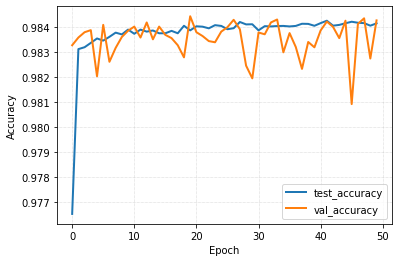

*** TEST RESULT (gt1r) ***
4799/4799 [==============================] - 2s 487us/step - loss: 0.0451 - accuracy: 0.9783
Finish setting the ANN input data for gt2r
Model: "sequential_52"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_116 (Dense)            (None, 20)                320       
_________________________________________________________________
dense_117 (Dense)            (None, 1)                 21        
Total params: 341
Trainable params: 341
Non-trainable params: 0
_________________________________________________________________


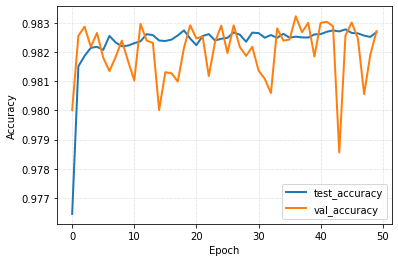

*** TEST RESULT (gt2r) ***
4821/4821 [==============================] - 3s 577us/step - loss: 0.0452 - accuracy: 0.9839
Finish setting the ANN input data for gt3r
Model: "sequential_53"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_118 (Dense)            (None, 20)                320       
_________________________________________________________________
dense_119 (Dense)            (None, 1)                 21        
Total params: 341
Trainable params: 341
Non-trainable params: 0
_________________________________________________________________


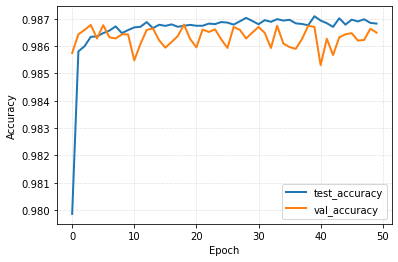

*** TEST RESULT (gt3r) ***
3956/3956 [==============================] - 2s 478us/step - loss: 0.0852 - accuracy: 0.9736


In [387]:
def ANN():
    # Build ANN model
    # with single layer of 20 nodes, activation function = relu, output layer = 1
    # you can add more layers if you want
    model = keras.Sequential([
        layers.Dense(20, activation='relu', input_shape=[len(test_input.keys())]),
#         layers.Dense(10, activation='relu'),
#         layers.Dense(10, activation='relu'),
        layers.Dense(1)
    ])
    
    model.compile(loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
                  optimizer='adam',
                  metrics=['accuracy'])
    return model

## Divide train / validation / test dataset ===============================

if 'ANN_model' not in locals():
    ANN_model = {}

for beam in ["gt1r", "gt2r", "gt3r"]:
    test_idx = (model_info.beam == beam)

    test_input = model_norm_input[test_idx]
    test_labels = model_labels[test_idx]
    test_info = model_info[test_idx]

    train_input = model_norm_input[test_idx == False].sample(frac=0.7)
    train_labels = model_labels[train_input.index]
    train_info = model_info.loc[train_input.index]

    val_input = model_norm_input[test_idx == False].drop(train_input.index)
    val_labels = model_labels[test_idx == False].drop(train_input.index)
    val_info = model_info[test_idx == False].drop(train_input.index)

    print("Finish setting the ANN input data for {0}".format(beam))

    ## Build ANN model ===================================================
    model = ANN()
    model.summary()
    EPOCHS = 50
    # How many epoches you will do?

    history = model.fit(train_input, train_labels,
                        epochs=EPOCHS, validation_data=(val_input, val_labels), verbose=0)

    # show the history of the model training
    # the accuracy of the train and validation for each epoch
    plt.figure(figsize = (6,4))
    plt.plot(history.history['accuracy'], label='test_accuracy', lw = 2)
    plt.plot(history.history['val_accuracy'], label = 'val_accuracy', lw = 2)
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    # plt.ylim([0.9, 1])
    plt.legend(loc='lower right')
    plt.grid(ls = ':', lw = 0.5)
    plt.show()

    print("*** TEST RESULT ({0}) ***".format(beam))
    train_loss, train_acc = model.evaluate(train_input, train_labels, verbose=1)
    test_loss, test_acc = model.evaluate(test_input, test_labels, verbose=1)
    
    ANN_model[beam] = model


In [142]:
(15/2) / np.cos(30 * np.pi/180)

8.660254037844386

In [458]:
(0.1*3.0*100) / (2*np.cos(20 * np.pi/180))

15.962666587138683

In [461]:
(40000)*(0.03) / 4

300.0

In [155]:
400 * 100 / 3

13333.333333333334

Finish setting the ANN input data!
Model: "sequential_34"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_72 (Dense)             (None, 30)                480       
_________________________________________________________________
dense_73 (Dense)             (None, 1)                 31        
Total params: 511
Trainable params: 511
Non-trainable params: 0
_________________________________________________________________


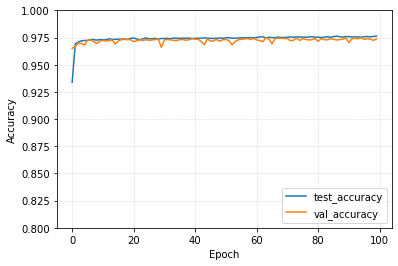

*** TEST RESULT ***
687/687 [==============================] - 0s 489us/step - loss: 0.1091 - accuracy: 0.9653
Finish setting the ANN input data!
Model: "sequential_35"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_74 (Dense)             (None, 30)                480       
_________________________________________________________________
dense_75 (Dense)             (None, 1)                 31        
Total params: 511
Trainable params: 511
Non-trainable params: 0
_________________________________________________________________


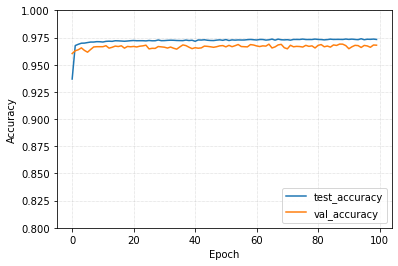

*** TEST RESULT ***
584/584 [==============================] - 0s 613us/step - loss: 0.0614 - accuracy: 0.9762
Finish setting the ANN input data!
Model: "sequential_36"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_76 (Dense)             (None, 30)                480       
_________________________________________________________________
dense_77 (Dense)             (None, 1)                 31        
Total params: 511
Trainable params: 511
Non-trainable params: 0
_________________________________________________________________


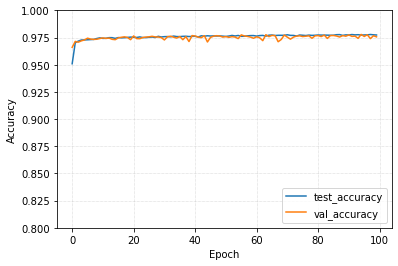

*** TEST RESULT ***
654/654 [==============================] - 0s 512us/step - loss: 0.0991 - accuracy: 0.9590


In [679]:
## Train & Test by BEAMS ================================================

## Divide train / validation / test dataset ===============================

for beam in ['gt1r', 'gt2r', 'gt3r']:
    test_idx = (model_info.beam == beam)

    test_input = model_norm_input[test_idx]
    test_labels = model_labels[test_idx]

    train_input = model_norm_input[test_idx == False].sample(frac=0.7)
    train_labels = model_labels[test_idx == False][train_input.index]

    val_input = model_norm_input[test_idx == False].drop(train_input.index)
    val_labels = model_labels[test_idx == False].drop(train_input.index)

    print("Finish setting the ANN input data!")

    ## Build ANN model ===================================================
    model = build_model()
    model.summary()
    EPOCHS = 50
    # How many epoches you will do?

    history = model.fit(train_input, train_labels,
                        epochs=EPOCHS, validation_data=(val_input, val_labels), verbose=0)

    # show the history of the model training
    # the accuracy of the train and validation for each epoch
    plt.figure(figsize = (6,4))
    plt.plot(history.history['accuracy'], label='test_accuracy')
    plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.ylim([0.8, 1])
    plt.legend(loc='lower right')
    plt.grid(ls = ':', lw = 0.5)
    plt.show()

    print("*** TEST RESULT ***")
    train_loss, train_acc = model.evaluate(train_input, train_labels, verbose=1)
    test_loss, test_acc = model.evaluate(test_input, test_labels, verbose=1)
    
    ANN_model[beam] = model

In [197]:
## Read ATL03 data ===========================================
path = "F:/ATL03/" # local directory (after download the csv file from Google Drive)
ATL03name = "ATL03_20191123180255.csv"
alltrack = pd.read_csv(path + ATL03name)
alltrack.keys()

442/442 [==============================] - 0s 504us/step - loss: 1.0864 - accuracy: 0.6615


In [393]:
np.array(model_labels.to_numpy())

array([0, 0, 0, ..., 1, 1, 1], dtype=int64)

### (5) LSTM

#### Prepare for the input data

In [415]:
#new_assignment version 1_week 9/10
np_array = model_norm_input.to_numpy()
# you need to regroup the numpy array:
new_features = []
new_labels = []

for row in np_array: 
    point_r2 = row[0:3]
    point_r1 = row[3:6]
    point_0 = row[6:9]
    point_l1 = row[9:12]
    point_l2 = row[12:15]
    new_features.append([point_r2, point_r1, point_0, point_l1, point_l2])

new_features = np.array(new_features)
new_labels = model_labels.to_numpy()
print(new_features.shape) # the X array inputshape = [5,4]
print(new_labels.shape) # the Y array 

(434370, 5, 3)
(434370,)


In [396]:
test_idx = (model_info.day == testday)
test_input = new_features[test_idx]

In [432]:
## Train & Test by DATES ================================================
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense

def long_short_term():
    # Build ANN model
    # with single layer of 20 nodes, activation function = relu, output layer = 1
    # you can add more layers if you want
    model = Sequential()
    model.add(LSTM(50, activation='relu', batch_input_shape=(None, 5, 3)))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mse', metrics = ['accuracy'])

    return model

## Divide train / validation / test dataset ===============================

if 'LSTM_model' not in locals():
    LSTM_model = {}

for testday in [13, 20, 22, 23, 26]:
    test_idx = (model_info.day == testday)
    # test_idx = (model_info.beam == "gt1r")

    test_input = new_features[test_idx]
    test_labels = model_labels[test_idx]
    test_info = model_info[test_idx]

    train_input = new_features[test_idx == False]    
    train_labels = model_labels[test_idx == False]
    train_info = model_info.loc[test_idx == False]

#     val_input = model_norm_input[test_idx == False].drop(train_input.index)
#     val_labels = model_labels[test_idx == False].drop(train_input.index)
#     val_info = model_info[test_idx == False].drop(train_input.index)

    print("Finish setting the ANN input data for NOV {0}".format(testday))

    ## Build ANN model ===================================================
    model = long_short_term()
#     model.summary()
    EPOCHS = 10
    # How many epoches you will do?
    history = model.fit(X_train, Y_train, epochs=EPOCHS, verbose=1)

    print("*** TEST RESULT (NOV {0}) ***".format(testday))
    train_loss, train_acc = model.evaluate(train_input, train_labels, verbose=1)
    test_loss, test_acc = model.evaluate(test_input, test_labels, verbose=1)
    
    LSTM_model['Nov{0}'.format(testday)] = model

Finish setting the ANN input data for NOV 13
Epoch 1/10
10860/10860 [==============================] - 19s 2ms/step - loss: 0.0148 - accuracy: 0.9820
Epoch 2/10
10860/10860 [==============================] - 20s 2ms/step - loss: 0.0124 - accuracy: 0.9838
Epoch 3/10
10860/10860 [==============================] - 19s 2ms/step - loss: 0.0121 - accuracy: 0.9841
Epoch 4/10
10860/10860 [==============================] - 18s 2ms/step - loss: 0.0118 - accuracy: 0.9845
Epoch 5/10
10860/10860 [==============================] - 19s 2ms/step - loss: 0.0117 - accuracy: 0.9844
Epoch 6/10
10860/10860 [==============================] - 18s 2ms/step - loss: 0.0116 - accuracy: 0.9847
Epoch 7/10
10860/10860 [==============================] - 18s 2ms/step - loss: 0.0114 - accuracy: 0.9849
Epoch 8/10
10860/10860 [==============================] - 20s 2ms/step - loss: 0.0114 - accuracy: 0.9849
Epoch 9/10
10860/10860 [==============================] - 19s 2ms/step - loss: 0.0113 - accuracy: 0.9851
Epoch 10/1

In [433]:
## Train & Test by DATES ================================================
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense

def long_short_term():
    # Build ANN model
    # with single layer of 20 nodes, activation function = relu, output layer = 1
    # you can add more layers if you want
    model = Sequential()
    model.add(LSTM(50, activation='relu', batch_input_shape=(None, 5, 3)))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mse', metrics = ['accuracy'])

    return model

## Divide train / validation / test dataset ===============================

if 'LSTM_model' not in locals():
    LSTM_model = {}

for beam in ['gt1r', 'gt2r', 'gt3r']:
    test_idx = (model_info.beam == beam)
    # test_idx = (model_info.beam == "gt1r")

    test_input = new_features[test_idx]
    test_labels = model_labels[test_idx]
    test_info = model_info[test_idx]

    train_input = new_features[test_idx == False]    
    train_labels = model_labels[test_idx == False]
    train_info = model_info.loc[test_idx == False]

#     val_input = model_norm_input[test_idx == False].drop(train_input.index)
#     val_labels = model_labels[test_idx == False].drop(train_input.index)
#     val_info = model_info[test_idx == False].drop(train_input.index)

    print("Finish setting the ANN input data for NOV {0}".format(testday))

    ## Build ANN model ===================================================
    model = long_short_term()
#     model.summary()
    EPOCHS = 10
    # How many epoches you will do?
    history = model.fit(X_train, Y_train, epochs=EPOCHS, verbose=1)

    print("*** TEST RESULT ({0}) ***".format(beam))
    train_loss, train_acc = model.evaluate(train_input, train_labels, verbose=1)
    test_loss, test_acc = model.evaluate(test_input, test_labels, verbose=1)
    
    LSTM_model[beam] = model

Finish setting the ANN input data for NOV 26
Epoch 1/10
10860/10860 [==============================] - 19s 2ms/step - loss: 0.0148 - accuracy: 0.9820
Epoch 2/10
10860/10860 [==============================] - 19s 2ms/step - loss: 0.0124 - accuracy: 0.9837
Epoch 3/10
10860/10860 [==============================] - 19s 2ms/step - loss: 0.0121 - accuracy: 0.9839
Epoch 4/10
10860/10860 [==============================] - 19s 2ms/step - loss: 0.0118 - accuracy: 0.9845
Epoch 5/10
10860/10860 [==============================] - 19s 2ms/step - loss: 0.0117 - accuracy: 0.9845
Epoch 6/10
10860/10860 [==============================] - 19s 2ms/step - loss: 0.0116 - accuracy: 0.9847
Epoch 7/10
10860/10860 [==============================] - 20s 2ms/step - loss: 0.0115 - accuracy: 0.9848
Epoch 8/10
10860/10860 [==============================] - 20s 2ms/step - loss: 0.0114 - accuracy: 0.9850
Epoch 9/10
10860/10860 [==============================] - 20s 2ms/step - loss: 0.0113 - accuracy: 0.9849
Epoch 10/1

### Test LSTM model for various dates

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
>>> START Track_input_ATL03_20191113191053_07310510_gt1r.csv
... Finish sampling reference surface and calculate freeboard
>>> START ATL10-02_20191113181045_07310501_003_03.h5


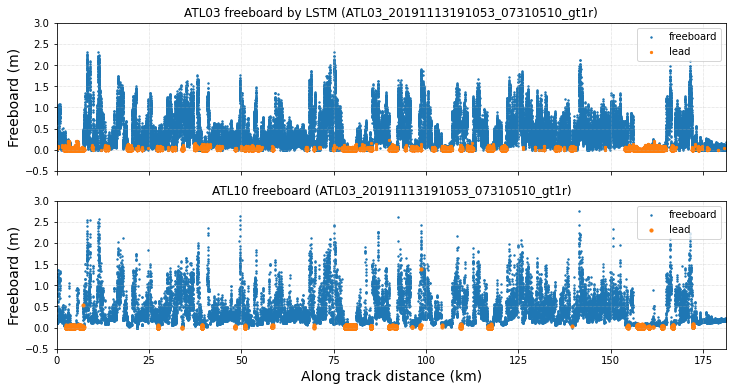

>>> START Track_input_ATL03_20191113191053_07310510_gt2r.csv
... Finish sampling reference surface and calculate freeboard
>>> START ATL10-02_20191113181045_07310501_003_03.h5


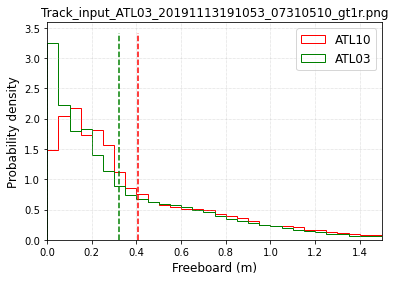

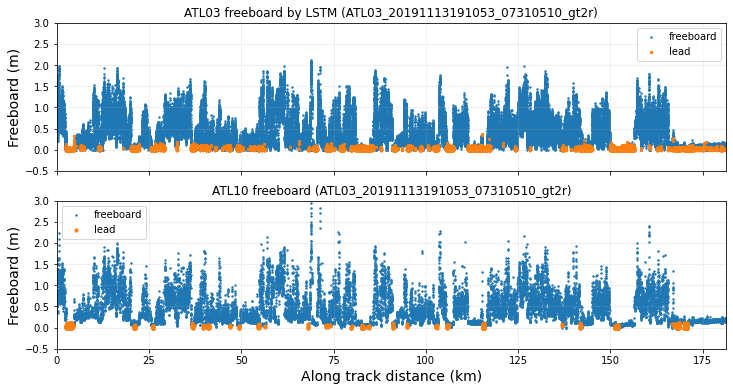

>>> START Track_input_ATL03_20191113191053_07310510_gt3r.csv
... Finish sampling reference surface and calculate freeboard
>>> START ATL10-02_20191113181045_07310501_003_03.h5


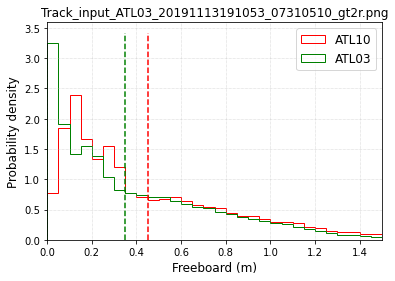

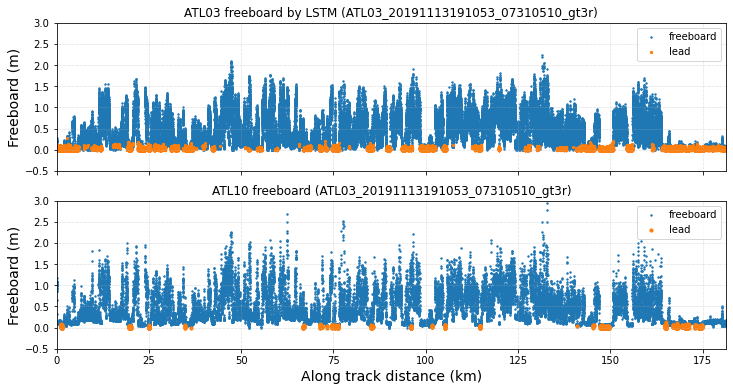

>>> START Track_input_ATL03_20191116192813_07770510_gt1r.csv
>>> START Track_input_ATL03_20191116192813_07770510_gt2r.csv
>>> START Track_input_ATL03_20191116192813_07770510_gt3r.csv
>>> START Track_input_ATL03_20191118183654_08070510_gt1r.csv
>>> START Track_input_ATL03_20191118183654_08070510_gt2r.csv
>>> START Track_input_ATL03_20191118183654_08070510_gt3r.csv
>>> START Track_input_ATL03_20191118201111_08080510_gt1r.csv
>>> START Track_input_ATL03_20191118201111_08080510_gt2r.csv
>>> START Track_input_ATL03_20191118201111_08080510_gt3r.csv
>>> START Track_input_ATL03_20191120191952_08380510_gt1r.csv
... Finish sampling reference surface and calculate freeboard
>>> START ATL10-02_20191120181944_08380501_003_03.h5


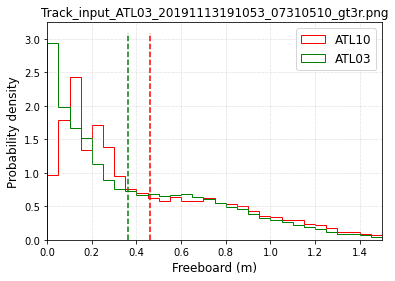

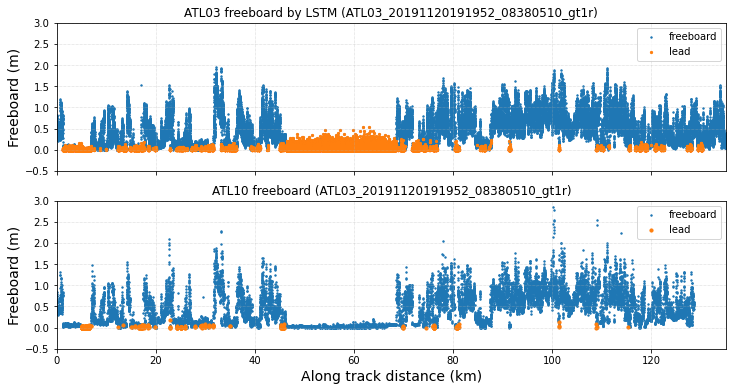

>>> START Track_input_ATL03_20191120191952_08380510_gt2r.csv
... Finish sampling reference surface and calculate freeboard
>>> START ATL10-02_20191120181944_08380501_003_03.h5


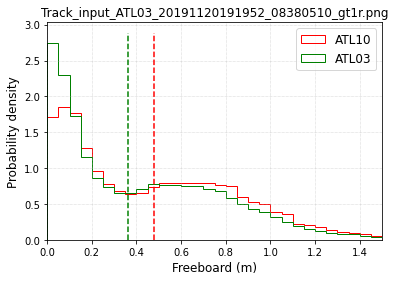

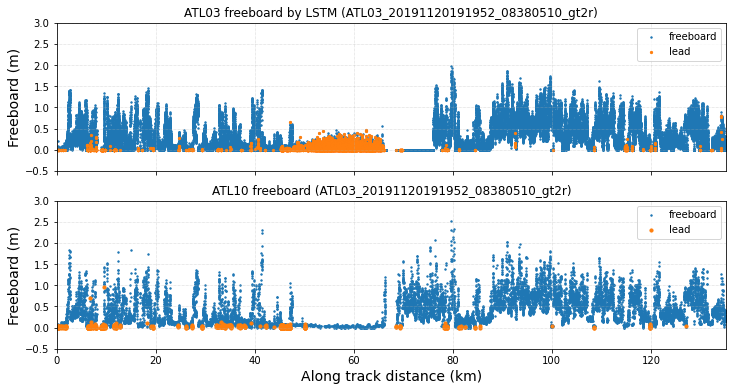

>>> START Track_input_ATL03_20191122182834_08680510_gt1r.csv
... Finish sampling reference surface and calculate freeboard
>>> START ATL10-02_20191122172826_08680501_003_03.h5


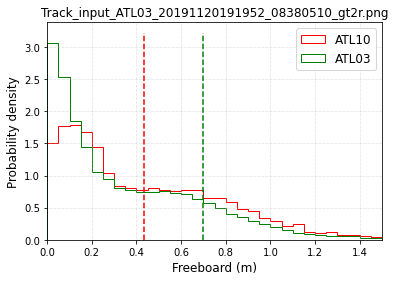

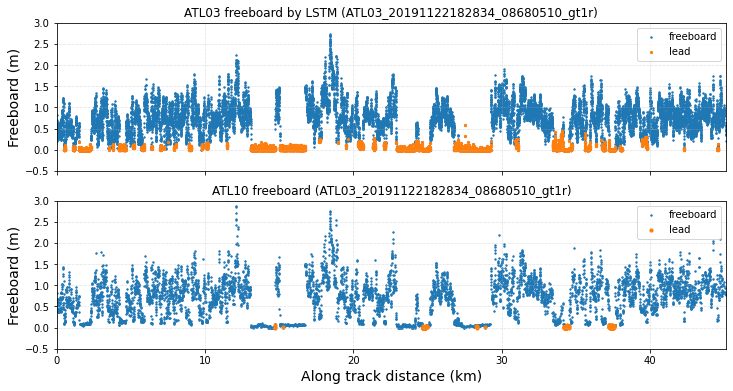

>>> START Track_input_ATL03_20191122182834_08680510_gt2r.csv
... Finish sampling reference surface and calculate freeboard
>>> START ATL10-02_20191122172826_08680501_003_03.h5


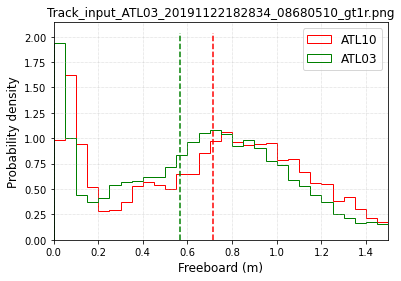

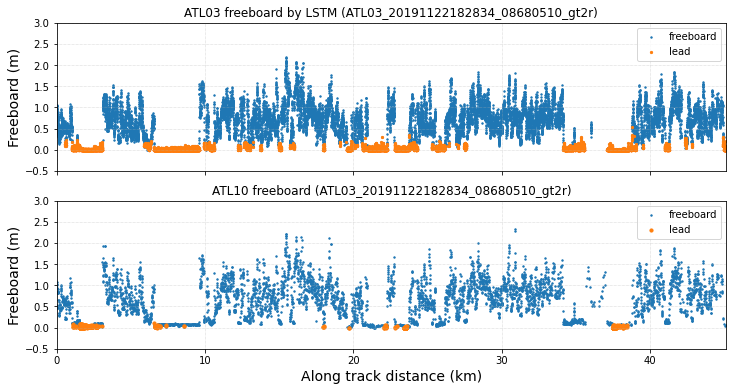

>>> START Track_input_ATL03_20191122182834_08680510_gt3r.csv
... Finish sampling reference surface and calculate freeboard
>>> START ATL10-02_20191122172826_08680501_003_03.h5


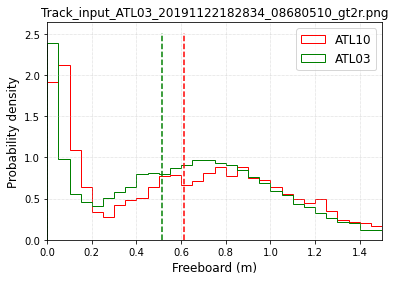

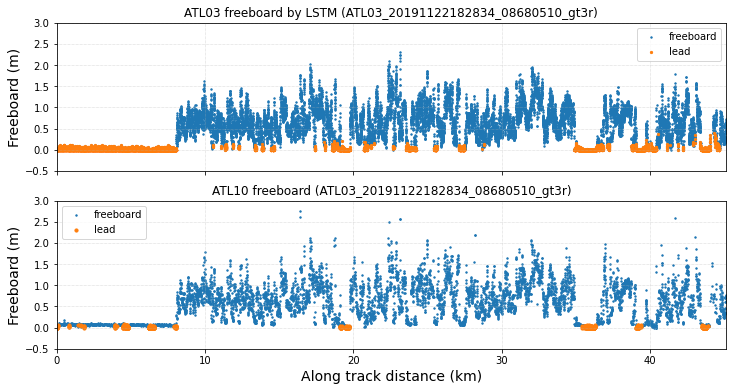

>>> START Track_input_ATL03_20191123180255_08830510_gt1r.csv
... Finish sampling reference surface and calculate freeboard
>>> START ATL10-02_20191123170246_08830501_003_03.h5


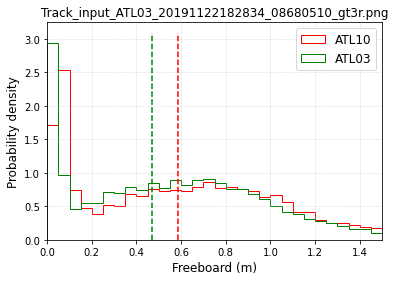

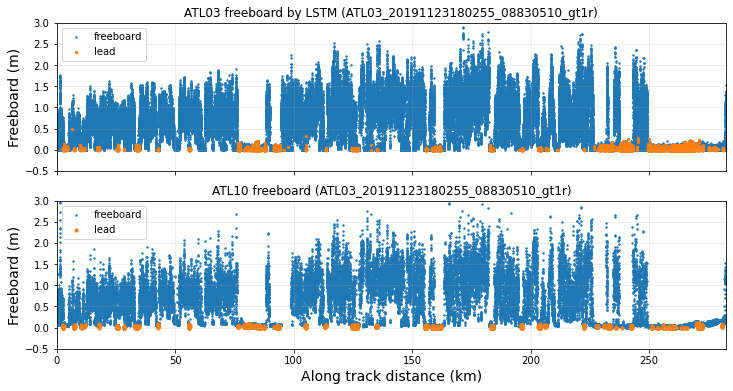

>>> START Track_input_ATL03_20191123180255_08830510_gt2r.csv
... Finish sampling reference surface and calculate freeboard
>>> START ATL10-02_20191123170246_08830501_003_03.h5


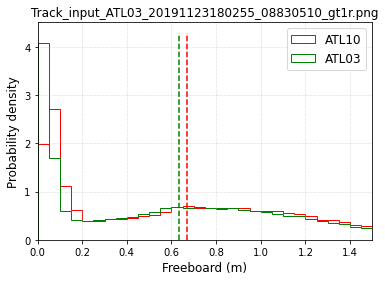

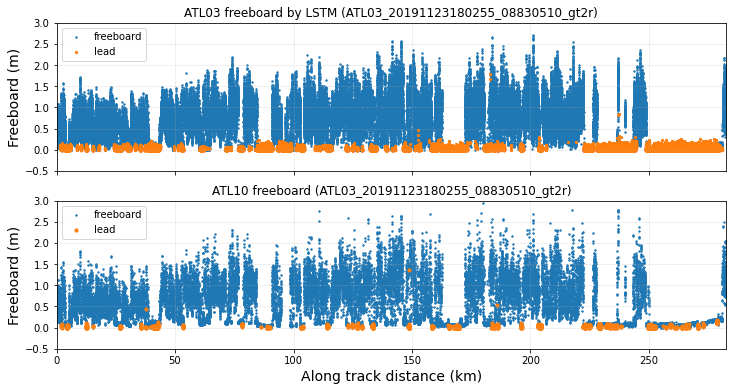

>>> START Track_input_ATL03_20191123180255_08830510_gt3r.csv
... Finish sampling reference surface and calculate freeboard
>>> START ATL10-02_20191123170246_08830501_003_03.h5


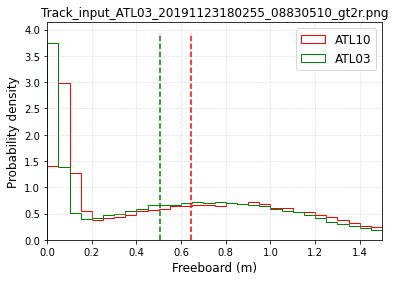

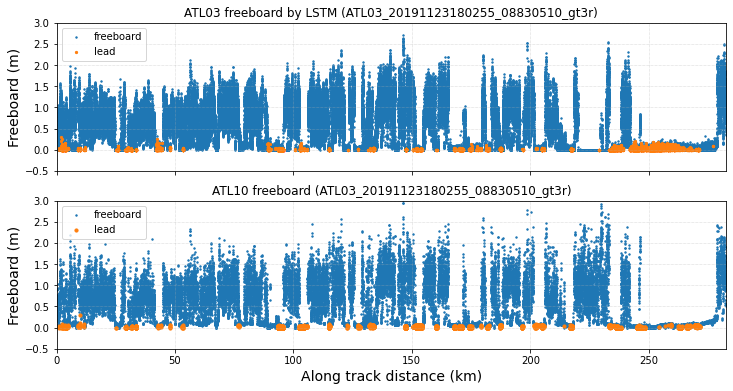

>>> START Track_input_ATL03_20191126182014_09290510_gt1r.csv
... Finish sampling reference surface and calculate freeboard
>>> START ATL10-02_20191126172006_09290501_003_03.h5


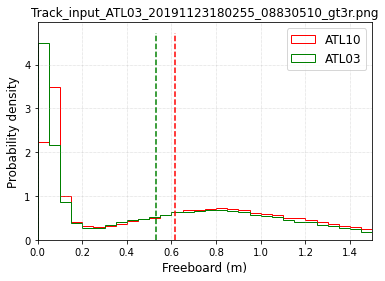

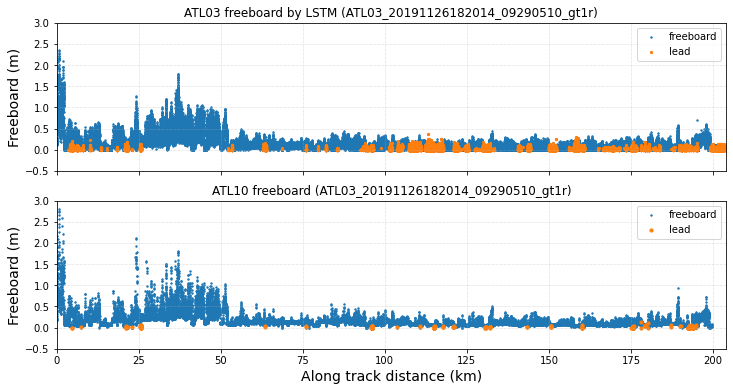

>>> START Track_input_ATL03_20191126182014_09290510_gt2r.csv
... Finish sampling reference surface and calculate freeboard
>>> START ATL10-02_20191126172006_09290501_003_03.h5


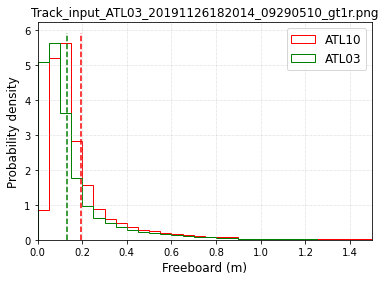

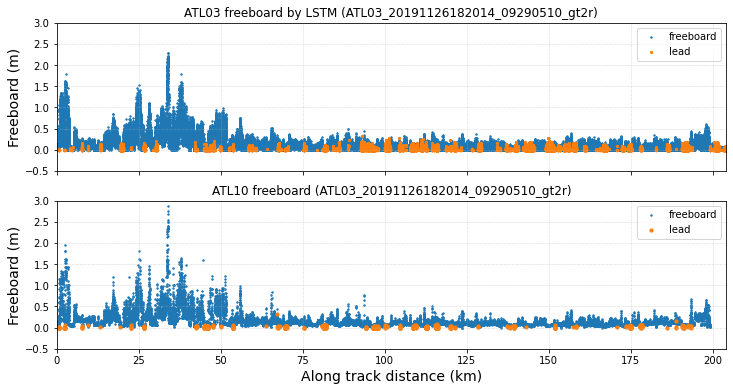

>>> START Track_input_ATL03_20191126182014_09290510_gt3r.csv
... Finish sampling reference surface and calculate freeboard
>>> START ATL10-02_20191126172006_09290501_003_03.h5


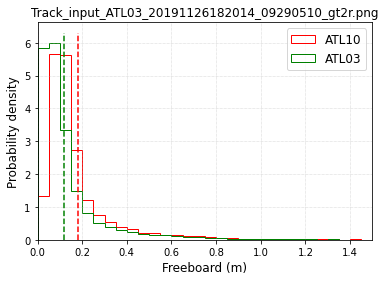

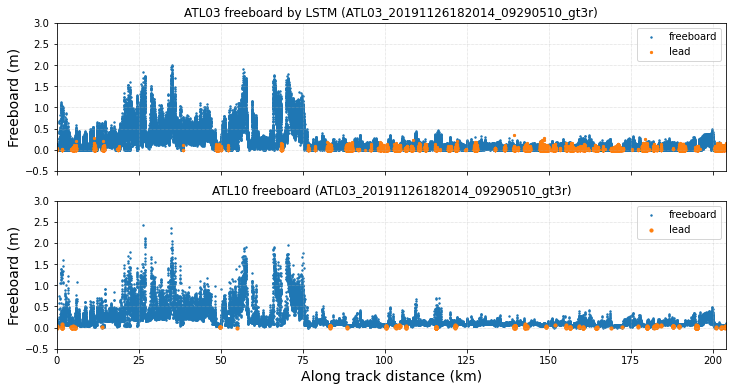

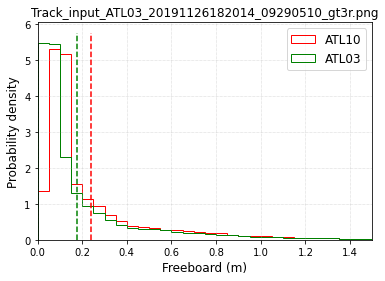

In [479]:
## Load saved ATL03 & ATL10 files ==============================================
## Calculate freeboard by using ML model =======================================

def norm(x, M = 1, m = 0):
    # Normalize the input data
    # output = (x-m)/(M-m) # Max-min normalization
    output = (x-x.mean())/(x.std()) # mean-std normalization
    return output

def determine_beam(fileT, beam):
    # Determine the index of the beam (gt1r, gt1l, gt2r, gt2l, gt3r, gt3l)
    f1 = h5py.File(fileT, 'r')
    orient = f1['orbit_info']['sc_orient'][:]  # orientation - 0: backward, 1: forward, 2: transition
    
    if len(orient) > 1:
        print('Transitioning, do not use for science!')
    elif (orient == 0):
        beams=['gt1l', 'gt1r', 'gt2l', 'gt2r', 'gt3l', 'gt3r']
        return beams.index(beam)
    elif (orient == 1):
        beams=['gt3r', 'gt3l', 'gt2r', 'gt2l', 'gt1r', 'gt1l']
        return beams.index(beam)    
    
def calculate_freeboard(alltrack, track_info, predictions, threshold, seg_len = 10000, overlap = 5):
    # Calculate freeboard from the leads detected by ML models
    lead = alltrack.loc[track_info["ph_index"][predictions > threshold], :]
    alltrack['ref_fit'] = 0
    alltrack['ref_count'] = 0
    alltrack['ref_height'] = 0

    for L in range(int(min(alltrack.x)), int(max(alltrack.x)), int(seg_len/overlap)):
        L1 = L + 0
        L2 = L + seg_len    
        lead_seg = lead[(lead.x >= L1) & (lead.x < L2)].reset_index(drop = True)
        meanlead = np.mean(lead_seg['elev_mss'])
        lead_seg['weight'] = 1/(lead_seg['elev_mss'] - meanlead)**2

        while len(lead_seg) <= 10:
            L1 = L1 - int(seg_len/2)
            L2 = L2 + int(seg_len/2)
            lead_seg = lead[(lead.x >= L1) & (lead.x < L2)].reset_index(drop = True)
            meanlead = np.mean(lead_seg['elev_mss'])
            lead_seg['weight'] = 1/(lead_seg['elev_mss'] - meanlead)**2 
        
        lead_height = np.sum((lead_seg['weight']/np.sum(lead_seg['weight']))*lead_seg['elev_mss'])
        track_seg = alltrack[(alltrack.x >= L1) & (alltrack.x < L2)]
        track_seg['ref_fit'] = lead_height # linear fitting

        alltrack['ref_fit'][track_seg.index] = alltrack['ref_fit'][track_seg.index] + track_seg['ref_fit']
        alltrack['ref_count'][track_seg.index] = alltrack['ref_count'][track_seg.index] + 1
    
    alltrack['ref_height'] = alltrack['ref_fit'] / alltrack['ref_count']
    alltrack['x_atc'] = alltrack['x'] - alltrack['x'][0]
    
    print("... Finish sampling reference surface and calculate freeboard")

    alltrack["freeboard"] = alltrack['elev_mss'] - alltrack['ref_height']
    alltrack["freeboard"][alltrack["freeboard"] < 0] = 0
    
    return alltrack
    
def draw_track(alltrack, track_info, prediction, threshold, test_ATL10, trackname):
    
    alltrack['x_atc'] = (alltrack.x - alltrack.x[0]) / 1000
    test_ATL10['x_atc'] = (test_ATL10.x - test_ATL10.x[0]) / 1000

    fig,ax=plt.subplots(2,1,figsize=(12,6), sharex=True)

    xfield = 'x_atc'
    field = 'freeboard'

    # ATL03 ----------------------------------------
    lead = track_info["ph_index"][predictions > threshold]
    ax[0].scatter(alltrack[xfield], alltrack[field], label = "freeboard", s = 2) # plot the elevation of ice points
    ax[0].scatter(alltrack[xfield][lead], alltrack[field][lead], label = "lead", s = 5) # plot the elevation of water points
#     ax[0].plot(alltrack[xfield][lead], alltrack["ref_height"][lead], label = "lead", color = 'k') # plot the elevation of water points
    ax[0].set_ylabel('Freeboard (m)',fontsize=14)
    ax[0].grid(linestyle = ':', linewidth = 0.5)
    ax[0].legend()
    ax[0].set_title('ATL03 freeboard by LSTM ({0})'.format(trackname))
    ax[0].set_ylim(-0.5, 3)

    # ATL10 ----------------------------------------
    lead_ndx = (test_ATL10.lead == 1)
    ax[1].scatter(test_ATL10[xfield], test_ATL10[field], s = 2, label = "freeboard")
    ax[1].scatter(test_ATL10[xfield][lead_ndx], test_ATL10[field][lead_ndx], s = 10, label = "lead")
    ax[1].set_ylabel('Freeboard (m)',fontsize=14)
    ax[1].grid(linestyle = ':', linewidth = 0.5)
    ax[1].legend()
    ax[1].set_title('ATL10 freeboard ({0})'.format(trackname))
    ax[1].set_ylim(-0.5, 3)
    ax[1].set_xlim(0, max(alltrack[xfield]))

    plt.xlabel('Along track distance (km)',fontsize=14)

    plt.show()

    fig.savefig("F:/ATL03/figures/Comparison_with_ATL10/Tracks_LSTM_{0}".format(trackname),
                bbox_inches = "tight")
    
def draw_distribution(alltrack, test_ATL10, trackname):    
    
    xfield = 'x_atc'
    field = 'freeboard'
    
    plt.figure(figsize = (6,4))
    maxfb = 1.5
    minfb = 0
    plt.hist(test_ATL10[field][test_ATL10[field]>0], bins = int(maxfb/0.05), range = (0, maxfb),
             density = True, histtype = 'step', color = 'r', label = 'ATL10')
    plt.hist(alltrack[field][alltrack[field]>0], bins = int(maxfb/0.05), range = (0, maxfb),
             density = True, histtype = 'step', color = 'g', label = 'ATL03')
    ymin, ymax = plt.ylim()
    plt.vlines(np.mean(test_ATL10[field]), ymin, ymax, linestyle = "--", color = "r")
    plt.vlines(np.mean(alltrack[field]), ymin, ymax, linestyle = "--", color = "g")
    plt.grid(linewidth = 0.5, linestyle = ":")
    plt.xlabel("Freeboard (m)", fontsize = 12)
    plt.ylabel("Probability density", fontsize = 12)
    plt.xlim(minfb, maxfb)
    plt.legend(fontsize = 12)
    plt.title(trackname, fontsize = 12)
    plt.savefig("F:/ATL03/figures/Comparison_with_ATL10/Fb_Hist_LSTM_{0}".format(trackname),
                bbox_inches = "tight")

def prepare_LSTM(norm_input):
    # Prepare input data for LSTM model

    np_array = norm_input.to_numpy()
    # you need to regroup the numpy array:
    new_features = []
    for row in np_array: 
        point_r2 = row[0:3]
        point_r1 = row[3:6]
        point_0 = row[6:9]
        point_l1 = row[9:12]
        point_l2 = row[12:15]
        new_features.append([point_r2, point_r1, point_0, point_l1, point_l2])
    new_features = np.array(new_features)
    return new_features


# MAIN ================================================================================
import os, sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
# make sure we're dealing with the most recent version of any code we're using
%load_ext autoreload
%autoreload 2
from readers import get_ATL10data, get_ATL10lead
thresholds = {'13': 1, '20': 0, '22': 1, '23': 0, '26':1}

# Read ATL03 file and calculate freeboard by using ML model
track_files = sorted(glob.glob("F:/ATL03/ANN_train/RossSea/test/Track_input_*.csv"))
for track in track_files[0:]:
    print(">>> START {0}".format(os.path.basename(track)))
    # Read ATL03 data
    shp_path = r"F:/ATL03/ATL03/RossSea/shpfile/"
    alltrack = read_shapefile(shp_path + os.path.basename(track)[12:].replace(".csv", ".shp")) 
    track_input = pd.read_csv(track)
    track_info = pd.read_csv(track.replace("_input_", "_info_"))
    track_info['beam'] = track[-8:-4]
    track_norm_input = norm(track_input)
    lstm_input = prepare_LSTM(track_norm_input)
    
    if alltrack.day[0] in [13, 20, 22, 23, 26]:
    
        # Apply LSTM model
        modelname = "Nov{0}".format(int(track_info['day'][0]))
        threshold = 0.5 #thresholds[str(int(alltrack.day[0]))]
        model = LSTM_model[modelname]
        predictions = model.predict(lstm_input).flatten()

        # Calculate ATL03 freeboard from ML model -----------------------
        calculate_freeboard(alltrack, track_info, predictions, threshold)

        # Read ATL10 data ---------------------------------------
        path = "F:/ATL03/ATL10/RossSea/" # local directory (after download the csv file from Google Drive)
        ATL10file = glob.glob(path + "ATL10-02_{0}*.h5".format(track.split("ATL03_")[1][:8]))[0]
        bbox = [min(alltrack.lon), min(alltrack.lat), max(alltrack.lon), max(alltrack.lat)] # 2019.11.09
        print(">>> START {0}".format(os.path.basename(ATL10file)))
        beam_idx = determine_beam(ATL10file, track_info['beam'][0])
        test_ATL10 = get_ATL10data(ATL10file, 1000, bbox, [beam_idx])[0]
        lead_ATL10 = get_ATL10lead(ATL10file, 1000, bbox, [beam_idx])[0]
    
        if len(alltrack)>0 and len(test_ATL10) > 0:
            # Compare ATL03 and ATL10 + draw plots
            draw_track(alltrack, track_info, predictions, threshold, test_ATL10,
                       os.path.basename(os.path.basename(track)[12:].replace(".csv", "")))
            draw_distribution(alltrack, test_ATL10, os.path.basename(track).replace(".csv", ".png"))  

## Only show ATL10 tracks

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
>>> START Track_input_ATL03_20191118201111_08080510_gt2r.csv
>>> START Track_input_ATL03_20191118201111_08080510_gt3r.csv
>>> START Track_input_ATL03_20191120191952_08380510_gt1r.csv
>>> START Track_input_ATL03_20191120191952_08380510_gt2r.csv
>>> START Track_input_ATL03_20191122182834_08680510_gt1r.csv
>>> START ATL10-02_20191122172826_08680501_003_03.h5


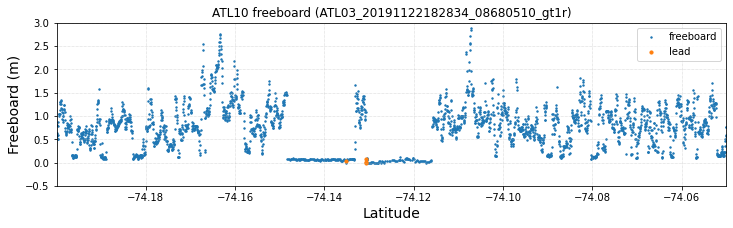

>>> START Track_input_ATL03_20191122182834_08680510_gt2r.csv
>>> START ATL10-02_20191122172826_08680501_003_03.h5


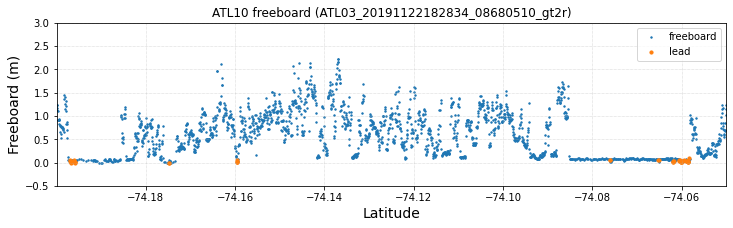

>>> START Track_input_ATL03_20191122182834_08680510_gt3r.csv
>>> START ATL10-02_20191122172826_08680501_003_03.h5


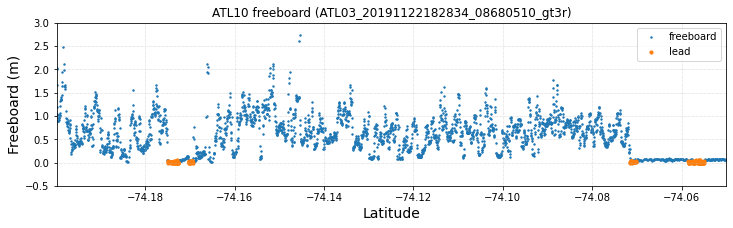

>>> START Track_input_ATL03_20191123180255_08830510_gt1r.csv
>>> START Track_input_ATL03_20191123180255_08830510_gt2r.csv
>>> START Track_input_ATL03_20191123180255_08830510_gt3r.csv
>>> START Track_input_ATL03_20191126182014_09290510_gt1r.csv
>>> START Track_input_ATL03_20191126182014_09290510_gt2r.csv
>>> START Track_input_ATL03_20191126182014_09290510_gt3r.csv


In [33]:
def draw_track(test_ATL10, trackname):
    
#     alltrack['x_atc'] = (alltrack.x - alltrack.x[0]) / 1000
    test_ATL10['x_atc'] = (test_ATL10.x - test_ATL10.x[0]) / 1000

    fig,ax=plt.subplots(1,1,figsize=(12,3), sharex=True)

    xfield = 'lat'
    field = 'freeboard'

    # ATL10 ----------------------------------------
    lead_ndx = (test_ATL10.lead == 1)
    ax.scatter(test_ATL10[xfield], test_ATL10[field], marker = 'o', s = 2, label = "freeboard")
    ax.scatter(test_ATL10[xfield][lead_ndx], test_ATL10[field][lead_ndx], s = 10, label = "lead")
    ax.set_ylabel('Freeboard (m)',fontsize=14)
    ax.grid(linestyle = ':', linewidth = 0.5)
    ax.legend()
    ax.set_title('ATL10 freeboard ({0})'.format(trackname))
    ax.set_ylim(-0.5, 3)
    ax.set_xlim(min(test_ATL10[xfield]), max(test_ATL10[xfield]))

    plt.xlabel('Latitude',fontsize=14)

    plt.show()

    fig.savefig("F:/Documents/Conference/2020_AGU/Competition/ATL10_{0}".format(trackname),
                bbox_inches = "tight")

def determine_beam(fileT, beam):
    # Determine the index of the beam (gt1r, gt1l, gt2r, gt2l, gt3r, gt3l)
    f1 = h5py.File(fileT, 'r')
    orient = f1['orbit_info']['sc_orient'][:]  # orientation - 0: backward, 1: forward, 2: transition
    
    if len(orient) > 1:
        print('Transitioning, do not use for science!')
    elif (orient == 0):
        beams=['gt1l', 'gt1r', 'gt2l', 'gt2r', 'gt3l', 'gt3r']
        return beams.index(beam)
    elif (orient == 1):
        beams=['gt3r', 'gt3l', 'gt2r', 'gt2l', 'gt1r', 'gt1l']
        return beams.index(beam)

# MAIN ================================================================================
import os, sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
# make sure we're dealing with the most recent version of any code we're using
%load_ext autoreload
%autoreload 2
from readers import get_ATL10data, get_ATL10lead
thresholds = {'13': 1, '20': 0, '22': 1, '23': 0, '26':1}

# Read ATL03 file and calculate freeboard by using ML model
track_files = sorted(glob.glob("F:/ATL03/ANN_train/RossSea/test/Track_input_*.csv"))
for track in track_files[10:]:
    print(">>> START {0}".format(os.path.basename(track)))
    # Read ATL03 data
    shp_path = r"F:/ATL03/ATL03/RossSea/shpfile/"
#     alltrack = read_shapefile(shp_path + os.path.basename(track)[12:].replace(".csv", ".shp")) 
#     track_input = pd.read_csv(track)
    track_info = pd.read_csv(track.replace("_input_", "_info_"))
    track_info['beam'] = track[-8:-4]
#     track_norm_input = norm(track_input)
#     lstm_input = prepare_LSTM(track_norm_input)
    
    if track_info.day[0] in [22]:

        # Read ATL10 data ---------------------------------------
        path = "F:/ATL03/ATL10/RossSea/" # local directory (after download the csv file from Google Drive)
        ATL10file = glob.glob(path + "ATL10-02_{0}*.h5".format(track.split("ATL03_")[1][:8]))[0]
        bbox = [-180, -74.2, -150, -74.05]
    #     bbox = [min(alltrack.lon), min(alltrack.lat), max(alltrack.lon), max(alltrack.lat)] # 2019.11.09
        print(">>> START {0}".format(os.path.basename(ATL10file)))
        beam_idx = determine_beam(ATL10file, track_info['beam'][0])
        test_ATL10 = get_ATL10data(ATL10file, 1000, bbox, [beam_idx])[0]
        lead_ATL10 = get_ATL10lead(ATL10file, 1000, bbox, [beam_idx])[0]

        if len(test_ATL10) > 0:
            # Compare ATL03 and ATL10 + draw plots
            draw_track(test_ATL10,
                       os.path.basename(os.path.basename(track)[12:].replace(".csv", "")))

In [12]:
track_info

elev        lat         lon           x            y    year  \
0     -1.165006 -76.400044 -167.186615  28241684.0  3325.997602  2019.0   
1     -1.150926 -76.400060 -167.186626  28241686.0  3325.994693  2019.0   
2     -1.197845 -76.400079 -167.186639  28241688.0  3325.992148  2019.0   
3     -1.168243 -76.400097 -167.186652  28241690.0  3325.989491  2019.0   
4     -1.159176 -76.400117 -167.186666  28241692.0  3325.986965  2019.0   
...         ...        ...         ...         ...          ...     ...   
90499 -0.982172 -77.999855 -168.427810  28422938.0  3337.922333  2019.0   
90500 -0.997013 -77.999871 -168.427824  28422940.0  3337.914744  2019.0   
90501 -0.971731 -77.999887 -168.427839  28422942.0  3337.906957  2019.0   
90502 -0.954400 -77.999905 -168.427854  28422944.0  3337.898427  2019.0   
90503 -1.011364 -77.999924 -168.427871  28422946.0  3337.889730  2019.0   

       month   day  ph_index  
0       11.0  13.0         2  
1       11.0  13.0         3  
2       11.0  13.0         4  
3       11.0  13.0         5  
4       11.0  13.0         6  
...      ...   ...       ...  
90499   11.0  13.0     90535  
90500   11.0  13.0     90536  
90501   11.0  13.0     90537  
90502   11.0  13.0     90538  
90503   11.0  13.0     90539  

[90504 rows x 9 columns]

#### Construct LSTM model

In [423]:
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense

model = Sequential()
model.add(LSTM(50, activation='relu', batch_input_shape=(None, 5, 3)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

# fit model
model.fit(X_train, Y_train, epochs=50, verbose=1)

Epoch 1/50
10860/10860 [==============================] - 20s 2ms/step - loss: 0.0150
Epoch 2/50
 3150/10860 [=======>......................] - ETA: 14s - loss: 0.0126

KeyboardInterrupt: 

In [428]:
y1, y2 = model.evaluate(X_test, Y_test, verbose=1)
print(y)

2715/2715 [==============================] - 2s 745us/step - loss: 0.0133


TypeError: cannot unpack non-iterable float object

#### LSTM Parameter optimization (Bayesian Optimization)
Import required modules / packages

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
from scipy.optimize import minimize
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import ConstantKernel, Matern
#from bayesian_optimization_util import plot_approximation, plot_acquisition
from sklearn.base import clone
from skopt import gp_minimize
from skopt.learning import GaussianProcessRegressor
from skopt.learning.gaussian_process.kernels import ConstantKernel, Matern
from sklearn.model_selection import train_test_split
import csv
import pandas as pd
import GPy
import GPyOpt
import os
from sklearn.svm import SVC
from sklearn.svm import SVR
from GPyOpt.methods import BayesianOptimization
from math import sqrt
from sklearn import datasets
from sklearn.model_selection import RandomizedSearchCV, cross_val_score
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import numpy as np
import matplotlib.pyplot as plt
import os
import csv
import math
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from scipy.stats import uniform

Parameter optimization for LSTM

In [ ]:
bounds = np.array([[-1.0, 2.0]])
noise = 0.2

def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true))

def f(X, noise=noise):
    return -np.sin(3*X) - X**2 + 0.7*X + noise * np.random.randn(*X.shape)

def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return np.array(dataX), np.array(dataY)

def Build_Data_set(filePath, fileName, splitValue):
     with open(filePath) as csvfile:
        reader = csv.DictReader(csvfile)
        count = 0
        testNo = 0
        dataNpArray = np.empty([0, 2], int)
        scaleUp = 1
        for row in reader:
            jobCount = float(row['JobCount'])//float(scaleUp)
            count = int(count) + 1
            testNo = int(testNo) + 1
            dataNpArray = np.append(dataNpArray, [[count, jobCount]], axis=0)
                    
        index = [str(i) for i in range(1, len(dataNpArray) + 1)]
        data_df = pd.DataFrame(dataNpArray, index=index, columns=['timePeriod', 'jobCount'])
        np.random.seed(7)
        
        
        dataframe = data_df[['jobCount']]
        
        dataset = dataframe.values
        dataset = dataset.astype('float32')
        
        train_size = int(len(dataset) * float(splitValue))
        train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
        cross_size = int(len(train)*0.75)
        train, crossval = train[0:cross_size,:], train[cross_size:len(train),:]
        
        print(train_size)
        print(len(train),len(test))
        averageTest = sum(test)/len(test)
        averageCrossVal = sum(crossval)/len(crossval)
        scaler = MinMaxScaler(feature_range=(0, 1))
        train = scaler.fit_transform(train)
        test = scaler.fit_transform(test)
        crossval = scaler.fit_transform(crossval)
        testlen = len(test)
        bds = [{'name': 'LSTM', 'type': 'discrete', 'domain': (1, 100)},
                    {'name': 'batch_size', 'type': 'discrete', 'domain': (16, 1024)},
                    {'name': 'look_back', 'type': 'discrete', 'domain': (0.1, 0.8)}]
                
                    
        iteration = 0
            
                        
        def cv_scoreTest(parameters):
            parameters = parameters[0]

            look_back = int(testlen * float(parameters[2]))
            trainX, trainY = create_dataset(train, int(look_back))
            trainX = np.reshape(trainX, (trainX.shape[0], trainX.shape[1],1 ))
            testX, testY = create_dataset(test, look_back)
            crossvalX, crossvalY = create_dataset(crossval, look_back)
            print("epoch Value"+str(1000)+"\t"+"Look Back values"+
                    str(look_back) +"\t"+"LSTM Values"+ str(parameters[0])+"\t"+"Batch Values"+ str(parameters[1]) )

            testX = np.reshape(testX, (testX.shape[0], testX.shape[1], 1 ))
            crossvalX = np.reshape(crossvalX, (crossvalX.shape[0],crossvalX.shape[1],1))
            model = Sequential()
            model.add(LSTM(int(parameters[0]), input_shape=(int(look_back),1)))
            model.add(Dense(1))
            model.compile(loss='mean_squared_error', optimizer='adam')
            model.fit(trainX, trainY, epochs=int(1000), batch_size=int(parameters[1]), verbose=0)
            testPredict = model.predict(testX)
            crossvalPredict = model.predict(crossvalX)

            crossvalPredict = scaler.inverse_transform(crossvalPredict)
            crossvalY = scaler.inverse_transform([crossvalY])
            crossvalScore = math.sqrt(mean_squared_error(crossvalY[0], crossvalPredict[:,0]))
            crossvalmape = mean_absolute_percentage_error(crossvalY[0], crossvalPredict[:,0])
            print('Cross Val Score: RMSE' , (crossvalScore)/averageCrossVal)
            print('Cross Val Score: MAPE' , mean_absolute_percentage_error(crossvalY[0], crossvalPredict[:,0]))
            # invert predictions
            testPredict = scaler.inverse_transform(testPredict)
            testIY = scaler.inverse_transform([testY])
            testScore = math.sqrt(mean_squared_error(testIY[0], testPredict[:,0]))/averageTest
            print('Test Score:  RMSE', (testScore))

            print('Test Score: MAPE' , mean_absolute_percentage_error(testIY[0], testPredict[:,0]))

            score = np.array(crossvalmape)
            #print("added score",score)
            return score
        
        
        iteration = iteration +1
        optimizer = BayesianOptimization(f=cv_scoreTest, 
                                         domain=bds,
                                         model_type='GP',
                                         acquisition_type ='EI',
                                         acquisition_jitter = 0.01,
                                         noise_var = noise**2,
                                         exact_feval=False,
                                         normalize_Y=False,
                                         maximize=True)
        
        # Only 20 iterations because we have 5 initial random points
        optimizer.run_optimization(max_iter=3)
        
        x_bo = optimizer.X
        y_bo = np.minimum.accumulate(-optimizer.Y).ravel()
        print(x_bo[0])
        y_bo= -optimizer.Y
        y_bo1 = y_bo.ravel(order='C')
        minPredVal = min(y_bo1)
        print("Bayesian optimized test Score:",abs(minPredVal))
        indexOfMinVal = np.where(y_bo1 == minPredVal)
        print("Best Parameters for Test")
        print("LSTM Epoch BatchSize LookBack")
        print(x_bo[indexOfMinVal])  
        
        #print("Test Score for CV parameters",testScore(x_bo[0],testlen,train,test,scaler,averageTest))
        
def testScore(parameters,testlen,train,test,scaler,averageTest):
    
    look_back = int(testlen * float(parameters[2]))
    print("epoch Value"+str(1000)+"\t"+"Look Back values"+
                        str(look_back) +"\t"+"LSTM Values"+ str(parameters[0])+"\t"+"Batch Values"+ str(parameters[1]) )
    trainX, trainY = create_dataset(train, int(look_back))
    trainX = np.reshape(trainX, (trainX.shape[0], trainX.shape[1],1 ))
    testX, testY = create_dataset(test, look_back)
    testX = np.reshape(testX, (testX.shape[0], testX.shape[1], 1 ))
    model = Sequential()
    #print("before lstm")
    model.add(LSTM(int(parameters[0]), input_shape=(int(look_back),1)))
    #print("after lstm")
    model.add(Dense(1))
    model.compile(loss='mean_squared_error', optimizer='adam')
    #print("before fit")
    model.fit(trainX, trainY, epochs=int(1000), batch_size=int(parameters[1]), verbose=0)
    testPredict = model.predict(testX)
                        
    # invert predictions
    testPredict = scaler.inverse_transform(testPredict)
    testIY = scaler.inverse_transform([testY])
    testScore = math.sqrt(mean_squared_error(testIY[0], testPredict[:,0]))/averageTest
    print('Test Score:  RMSE', (testScore))
    
    print('Test Score: MAPE' , mean_absolute_percentage_error(testIY[0], testPredict[:,0]))

        
def Analysis():
    folderName = "Extracts"
   
    #trainSplit = np.array([0.5,0.6,0.8])
    trainSplit = np.array([0.8])
    for filename in os.listdir(folderName): 
        for splitValue in range(len(trainSplit)):
            path = folderName+"/"+filename 
            print(str(filename) + "\t Split Value" + str(trainSplit[splitValue]))
            Build_Data_set(path,filename,trainSplit[splitValue])
    
Analysis()    